## Assignment 1: Implementing MLP using Numpy

In [3]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from data import load_synth 
from data import load_mnist
from data import download_mnist
from data import save_mnist
from data import init
from data import load

### Part 2: Scalar backpropagation

#### Question 3

In [5]:
# sigmoid function
def sigmoid(z):
    sig = 1 / (1 + math.exp(-z))
    
    return sig

In [6]:
# softmax function
def softmax(z):
    numerator = [math.exp(i) for i in z]
    denominator = sum(numerator)
    output = [n/denominator for n in numerator]
    
    return output

In [7]:
# initialize vector of zeros
def zero_vector(dim):
    listofzeros = [0] * dim
    
    return listofzeros

In [8]:
# cross entropy loss
def cross_entropy_loss(ypred):
    ce_loss = -math.log(ypred)
    
    return ce_loss

In [9]:
# forward propagation
def forward_propagate(x, W, b, V, c, y):
    """
    forward propagation for a two layer neural network
    
    Arguments:
    x - input
    weights -- 
        W - weights, layer 1
        b - bias, layer 1
        V - weights, layer 2
        c - bias, layer 2
    y - true label: [1, 0]

    Return: parameters
    """
    
    # Forward Propagation (from x to loss)
    k = zero_vector(3)
    for j in range(len(k)):
        for i in range(len(x)):
            k[j] += W[i][j] * x[i]
        k[j] += b[j]
    
    # 1st activation: sigmoid
    h = zero_vector(len(k))
    for i in range(len(k)):
        h[i] = sigmoid(k[i])
        
    o = zero_vector(2)
    for j in range(len(o)):
        for i in range(len(h)):
            o[j] = V[i][j] * h[i]
        o[j] += c[j]
    
    # 2nd activation: softmax
    ypred = softmax(o)

    parameters = {'k': k, 'h': h, 'o': o, 'ypred': ypred}
    
    return parameters

In [10]:


# Calculating loss 
    
#     l = zero_vector(len(o))
#     for i in range(len(o)):
#         if y[i] == 1:
#             l[i] = -(math.log(o[i]))
            
#     loss = sum(l)
    
#     # Alternate loss:
#     loss = 0
#     for i in range(len(o)):
#         if y == 1:
#             loss += -(math.log(o[i]))
    
    # print('l: ', l)
    # print('loss: ' loss)

In [11]:
def calculate_loss(ypred, y):
    if y == 1:
        loss = cross_entropy_loss(ypred[0])
    
    elif y == 0:
        loss = cross_entropy_loss(ypred[1])
    
    else:
        loss = 0
        
    return loss

In [12]:
x = [1, -1] # inputs
W = [[1, 1, 1], [-1, -1, -1]] # weights
b = zero_vector(3) # bias
V = [[1, 1], [-1, -1], [-1, -1]]
c = zero_vector(2)
# weights_1 = {'W': W, 'b': b, 'V': V, 'c': c}
# y = [1, 0] # target class
y = 1

In [13]:
parameters = forward_propagate(x, W, b, V, c, y)
k = parameters['k']
h = parameters['h']
o = parameters['o']
ypred = parameters['ypred']

In [14]:
print('k', k)
print('h', h)
print('o', o)
print('ypred', ypred)

k [2, 2, 2]
h [0.8807970779778823, 0.8807970779778823, 0.8807970779778823]
o [-0.8807970779778823, -0.8807970779778823]
ypred [0.5, 0.5]


In [15]:
calculate_loss(ypred, y)

0.6931471805599453

In [16]:
# Backward pass
# dl/dW = dl/do * do/ds * ds/dh * dh/dk * dk/dW 
# dl/dx = dl/do * do/ds * ds/dh * dh/dk * dk/dx

In [20]:
def back_propagate(x, W, b, V, c, y, parameters):
    """
    back propagation for a two layer neural network
    
    Arguments:
    x - input
    W - weights, layer 1
    b - bias, layer 1
    V - weights, layer 2
    c - bias, layer 2
    y - true label: [1, 0]
    paramters - (k, h, s, o, l)

    Return: gradients
    """
    
    k = parameters['k']
    h = parameters['h']
    o = parameters['o']
    ypred = parameters['ypred']
    
    grad_ypred = zero_vector(len(ypred))
    for i in range(len(ypred)):
        if y == 1: 
            grad_ypred[i] = -1/ypred[i]

    for i in range(len(o)):
        for j in range(len(o)):
            if i == j:
                grad_o[j] += grad_ypred[i] * (ypred[i] * (1 - ypred[i]))
            elif i!=j:
                grad_o[j] += grad_ypred[i] * (-ypred[i] * ypred[j])

    grad_h = zero_vector(len(h))
    grad_V = [zero_vector(len(o))] * len(V)
    
    for j in range(len(grad_o)):
        for i in range(len(h)):
            grad_V[i][j] = grad_o[j] * h[i]
            grad_h[i] += grad_o[j] * V[i][j]
            
    grad_c = zero_vector(len(c))
    for i in range(len(c)):
        grad_c[i] += grad_o[i] * 1 # ds/dc = dc/dc = 1

    grad_k = zero_vector(len(k))
    for i in range(len(h)):
        grad_k[i] = grad_h[i] * (h[i] * (1 - h[i]))
        
    grad_W = [zero_vector(len(k))] * len(W)
    for j in range(len(grad_k)):
        for i in range(len(x)): 
            grad_W[i][j] = grad_k[j] * x[i]
            
    grad_b = zero_vector(len(b))
    for i in range(len(k)):
        grad_b[i] += grad_k[i] * 1 # dk/db = db/db = 1
        
    grad_x = zero_vector(len(x))
    for j in range(len(k)):
        for i in range(len(x)):
            grad_x[i] += grad_k[i] * W[i][j]
            
    
    gradients = {
        'grad_ypred': grad_ypred, 
        'grad_o': grad_o,
        'grad_V': grad_V,
        'grad_h': grad_h,
        'grad_c': grad_c,
        'grad_k': grad_k,
        'grad_W': grad_W,
        'grad_b': grad_b,
        'grad_x': grad_x
    }
    
    return gradients

In [21]:
gradients = back_propagate(x, W, b, V, c, y, parameters)

In [22]:
gradients

{'grad_ypred': [-2.0, -2.0],
 'grad_o': [0.0, 0.0],
 'grad_V': [[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]],
 'grad_h': [0.0, 0.0, 0.0],
 'grad_c': [0.0, 0.0],
 'grad_k': [0.0, 0.0, 0.0],
 'grad_W': [[-0.0, -0.0, -0.0], [-0.0, -0.0, -0.0]],
 'grad_b': [0.0, 0.0, 0.0],
 'grad_x': [0.0, 0.0]}

#### Question 4

In [200]:
(xtrain, ytrain), (xval, yval), num_cls = load_synth()

In [202]:
label_y = one_hot_array(ytrain)
label_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [72]:
# for x, y in zip(xtrain, ytrain):
#     print('x: ', x)
#     print('y: ', y)

In [73]:
np.random.seed(42)

W1 = [[random.gauss(0, 1), random.gauss(0, 1), random.gauss(0, 1)], [random.gauss(0, 1), random.gauss(0, 1), random.gauss(0, 1)]] # weights
b1 = zero_vector(3) # bias
V1 = [[random.gauss(0, 1), random.gauss(0, 1)], [random.gauss(0, 1), random.gauss(0, 1)], [random.gauss(0, 1), random.gauss(0, 1)]]
c1 = zero_vector(2)

#weights_1 = {'W': W1, 'b': b1, 'V': V1, 'c': c1}

In [136]:
def propagate(x, W, b, V, c, y):
    
    parameters = forward_propagate(x, W, b, V, c, y)
    prediction = parameters['ypred']
    #print(prediction)
    cost = calculate_loss(prediction, y)
    #print('loss: ', cost)
    gradients = back_propagate(x, W, b, V, c, y, parameters)
    
    return cost, gradients

In [137]:
def optimize(Xset, W, b, V, c, Yset, num_iterations, learning_rate):
    
    losses = []
    
    for n in range(num_iterations):
        for x, y in zip(Xset, Yset):
            
            loss, grads = propagate(x, W, b, V, c, y)
            
            grad_V = grads['grad_V']
            grad_c = grads['grad_c']
            grad_W = grads['grad_W']
            grad_b = grads['grad_b']
            
            # W = W - (lr * grad_W)
            W_update = [[t * learning_rate for t in u] for u in grad_W]
            for i in range(len(W_update)):
                for j in range(len(W[i])):
                    W[i][j] -= W_update[i][j]
                
        
            # b = b - (lr * grad_b)
            b_update = [z * learning_rate for z in grad_b]
            b = [t-u for t, u in zip(b, b_update)]
        
            # V = V - (lr * grad_V)
            V_update = [[t * learning_rate for t in u] for u in grad_V]
            for i in range(len(V_update)):
                for j in range(len(V[i])):
                    V[i][j] -= V_update[i][j]
                
        
            # c = c - (lr * grad_c)
            c_update = [z * learning_rate for z in grad_b]
            c = [t-u for t, u in zip(c, c_update)]
            
            # Recording the loss
            losses.append(loss)
            
#             if n % 100 == 0:
#                 print ("Cost after iteration %i: %f" %(n, loss))
                
        weights = {'W': W, 'b': b, 'V': V, 'c': c}
        
        gr = {'grad_W': grad_W, 'grad_b': grad_b, 'grad_V': grad_V, 'grad_c': grad_c}
        
        return weights, gr, losses

In [135]:
weights, gr, losses = optimize(xtrain, W1, b1, V1, c1, ytrain, 100, 0.01)

[0.8430748321858547, 0.15692516781414528]
loss:  0.1706995560162654
[0.78241155613758, 0.21758844386242002]
loss:  0.24537439025611274
[0.8514837826831047, 0.14851621731689527]
loss:  0.16077482464725254
[0.8057464227970301, 0.1942535772029699]
loss:  0.21598619789057438
[0.7179226376678922, 0.2820773623321077]
loss:  1.2655739111558346
[0.7228599627772886, 0.2771400372227114]
loss:  0.32453976468824786
[0.7891552580651428, 0.21084474193485722]
loss:  0.23679219921175243
[0.7628438126968715, 0.23715618730312854]
loss:  1.439036336747453
[0.8305343272689258, 0.16946567273107407]
loss:  0.1856860175272023
[0.7686543742764119, 0.23134562572358797]
loss:  1.4638424714215041
[0.5457622600879991, 0.4542377399120009]
loss:  0.6055718191447694
[0.8035014558391239, 0.19649854416087614]
loss:  1.62710025655077
[0.8587564987191901, 0.14124350128080984]
loss:  0.15226986782450053
[0.7368892052026687, 0.2631107947973314]
loss:  1.3351800625212713
[0.8163507544220802, 0.18364924557791995]
loss:  0.2

[0.6531154200181818, 0.3468845799818182]
loss:  0.4260014118512817
[0.7099775538837878, 0.29002244611621225]
loss:  0.342521923694703
[0.6379454002701408, 0.36205459972985915]
loss:  1.0159602505467262
[0.5983942851622892, 0.40160571483771074]
loss:  0.5135054025641822
[0.6885841973374531, 0.31141580266254687]
loss:  1.1666262737197137
[0.6553475910290564, 0.3446524089709436]
loss:  1.065218880059515
[0.593050033034985, 0.40694996696501506]
loss:  0.8990650323861017
[0.6855034097921922, 0.3144965902078078]
loss:  0.377601805824098
[0.5523759919007829, 0.44762400809921715]
loss:  0.5935263198310432
[0.5987376539203947, 0.4012623460796054]
loss:  0.5129317502267718
[0.742702663531214, 0.25729733646878594]
loss:  0.29745949803189253
[0.5650475896990359, 0.43495241030096415]
loss:  0.5708453218269902
[0.6503524665554052, 0.3496475334445948]
loss:  1.0508296792126566
[0.5733247822156946, 0.4266752177843054]
loss:  0.8517321692554499
[0.6125305823289612, 0.3874694176710388]
loss:  0.49015640

[0.587002746326085, 0.4129972536739151]
loss:  0.532725780585624
[0.5523921737507439, 0.44760782624925605]
loss:  0.5934970252686812
[0.551735512833649, 0.44826448716635103]
loss:  0.5946864909482317
[0.560959495818151, 0.4390405041818491]
loss:  0.5781065760336292
[0.5947739047666053, 0.4052260952333947]
loss:  0.5195739376406565
[0.5552137208243396, 0.4447862791756604]
loss:  0.5884021567945874
[0.6548456885376327, 0.3451543114623673]
loss:  0.4233556611214544
[0.629699856380298, 0.370300143619702]
loss:  0.4625119915638548
[0.6371128042587803, 0.3628871957412197]
loss:  1.0136632485456227
[0.57954223497633, 0.42045776502367]
loss:  0.8664112445097059
[0.5925206434549645, 0.4074793565450354]
loss:  0.8977650063696084
[0.5777705633687349, 0.42222943663126505]
loss:  0.862206423991597
[0.6076896299164276, 0.39231037008357245]
loss:  0.9357019920513278
[0.616711780525696, 0.38328821947430414]
loss:  0.4833534946445269
[0.59624934730561, 0.4037506526943899]
loss:  0.5170963314458289
[0.5

[0.589422768413293, 0.41057723158670706]
loss:  0.5286115796090916
[0.5758236928867084, 0.4241763071132916]
loss:  0.8576060915153779
[0.5769067705337972, 0.4230932294662028]
loss:  0.8601627235911885
[0.5715635208700114, 0.42843647912998856]
loss:  0.5593796542946454
[0.5548418111863215, 0.44515818881367863]
loss:  0.5890722307525272
[0.5788860971916239, 0.4211139028083761]
loss:  0.8648519289035987
[0.5933709836913951, 0.4066290163086048]
loss:  0.899854017056694
[0.5613110214629506, 0.4386889785370494]
loss:  0.5774801216255645
[0.5574178221627768, 0.44258217783722315]
loss:  0.5844401907052575
[0.5905303739761734, 0.40946962602382664]
loss:  0.5267342069433381
[0.5691035152706032, 0.4308964847293968]
loss:  0.5636929364977354
[0.5742295407724356, 0.4257704592275644]
loss:  0.554726065783902
[0.570415897734087, 0.42958410226591304]
loss:  0.5613895390676283
[0.5684149349910267, 0.4315850650089732]
loss:  0.8402906499759061
[0.5891189021420187, 0.41088109785798127]
loss:  0.889451405

[0.5709210151304873, 0.4290789848695127]
loss:  0.5605044061613231
[0.5843404339599543, 0.4156595660400458]
loss:  0.5372715311315011
[0.5803187468526307, 0.41968125314736915]
loss:  0.8682597769088026
[0.5765216212776395, 0.42347837872236055]
loss:  0.5507424355918381
[0.571845959762987, 0.4281540402370129]
loss:  0.5588856249840546
[0.5812594005867655, 0.4187405994132345]
loss:  0.8705036452572722
[0.5778902509506703, 0.42210974904932963]
loss:  0.8624899299208891
[0.5847582295313091, 0.41524177046869093]
loss:  0.8788943489423333
[0.5818054961157313, 0.41819450388426865]
loss:  0.5416190862215321
[0.5820250003393259, 0.41797499966067403]
loss:  0.8723336576702605
[0.5727608424266982, 0.4272391575733017]
loss:  0.8504113345505703
[0.5714329474515786, 0.42856705254842137]
loss:  0.5596081299244828
[0.5715593455052913, 0.4284406544947087]
loss:  0.55938695948439
[0.570475118143509, 0.42952488185649085]
loss:  0.8450756070903321
[0.5868257527115672, 0.41317424728843277]
loss:  0.5330273

[0.5760314662163796, 0.4239685337836206]
loss:  0.8580960392785633
[0.5776778817276244, 0.4223221182723755]
loss:  0.5487388637071297
[0.576765987374083, 0.4232340126259169]
loss:  0.8598300315685032
[0.5805778754406432, 0.4194221245593568]
loss:  0.5437313344892838
[0.5808465988440027, 0.41915340115599725]
loss:  0.543268586520553
[0.5748999314678117, 0.42510006853218824]
loss:  0.8554306824031308
[0.575477386499027, 0.42452261350097303]
loss:  0.856790003740338
[0.5776738714865745, 0.4223261285134255]
loss:  0.8619774470324164
[0.578663492575009, 0.421336507424991]
loss:  0.8643234595264302
[0.5807608645389656, 0.41923913546103453]
loss:  0.5434161997339583
[0.5766505773679013, 0.42334942263209874]
loss:  0.5505187810657391
[0.5806395290122166, 0.4193604709877834]
loss:  0.5436251466705431
[0.5763659260196655, 0.4236340739803346]
loss:  0.8588852294428724
[0.5760828183048772, 0.42391718169512277]
loss:  0.8582171690195722
[0.5747241503312532, 0.42527584966874676]
loss:  0.55386509185

[0.5913600922011777, 0.4086399077988222]
loss:  0.5253301540550965
[0.57035805581029, 0.42964194418971]
loss:  0.8448031051026047
[0.5613308650946375, 0.43866913490536247]
loss:  0.5774447699574564
[0.5749528565518034, 0.42504714344819655]
loss:  0.855555190449065
[0.5538245516553166, 0.4461754483446834]
loss:  0.5909073361558794
[0.5696857130355157, 0.43031428696448415]
loss:  0.5626704508591922
[0.5823439128795685, 0.41765608712043134]
loss:  0.5406940901719411
[0.5755819878514924, 0.4244180121485077]
loss:  0.8570364316996895
[0.5813132981999678, 0.41868670180003226]
loss:  0.870632367149187
[0.5782480086981839, 0.42175199130181606]
loss:  0.863337836045413
[0.5738961396133236, 0.42610386038667625]
loss:  0.5553068404746506
[0.5645350731741097, 0.43546492682589033]
loss:  0.5717527659246043
[0.5899283271614053, 0.4100716728385946]
loss:  0.527754228849039
[0.5842403957847686, 0.4157596042152314]
loss:  0.5374427442352654
[0.5817531915904605, 0.4182468084095396]
loss:  0.541708990625

loss:  0.9341251914936568
[0.5780251798370589, 0.42197482016294124]
loss:  0.5481378475266956
[0.6025390043536103, 0.3974609956463897]
loss:  0.506602878196344
[0.6124102432976867, 0.3875897567023134]
loss:  0.490352888856315
[0.5879470519583427, 0.41205294804165715]
loss:  0.8866034232256963
[0.5399299427924186, 0.4600700572075815]
loss:  0.6163158834097991
[0.5907370623979409, 0.4092629376020592]
loss:  0.8933974502750209
[0.5771818995533992, 0.4228181004466008]
loss:  0.860813215006954
[0.601685062089672, 0.39831493791032796]
loss:  0.9205122853292661
[0.5503870487178039, 0.44961295128219614]
loss:  0.5971335233124485
[0.5629840393357065, 0.43701596066429355]
loss:  0.5745040005592046
[0.5937043060060285, 0.40629569399397153]
loss:  0.9006740741396899
[0.5731194430615988, 0.4268805569384011]
loss:  0.8512510310237423
[0.5658021539359059, 0.434197846064094]
loss:  0.8342549822501716
[0.578637086971561, 0.421362913028439]
loss:  0.8642607904351369
[0.5653289945030737, 0.43467100549692

[0.5312927607482912, 0.46870723925170876]
loss:  0.6324420711624098
[0.6038654926904344, 0.39613450730956556]
loss:  0.9260014604775818
[0.5656200554526944, 0.4343799445473056]
loss:  0.5698327063072484
[0.6201417565948198, 0.3798582434051803]
loss:  0.9679571395303831
[0.5265953540699345, 0.47340464593006554]
loss:  0.6413228544618194
[0.5824487088267306, 0.4175512911732694]
loss:  0.8733478891274249
[0.6214322607920759, 0.37856773920792397]
loss:  0.4757283670655551
[0.5573779433459997, 0.44262205665400023]
loss:  0.8150390183230962
[0.5530568223633868, 0.44694317763661323]
loss:  0.5922945298210048
[0.6051806127708451, 0.3948193872291549]
loss:  0.9293268661716672
[0.5936826199127258, 0.4063173800872742]
loss:  0.9006207004148521
[0.5633127628094148, 0.4366872371905852]
loss:  0.5739202761227752
[0.6281239698545136, 0.3718760301454864]
loss:  0.4650177277686565
[0.54440700960413, 0.4555929903958699]
loss:  0.6080581324535345
[0.6120124320660251, 0.38798756793397493]
loss:  0.4910026

loss:  0.9471973800346541
[0.5986244825037068, 0.40137551749629324]
loss:  0.9128578372645558
[0.6189259867726624, 0.3810740132273376]
loss:  0.9647616622823457
[0.5306155234421128, 0.46938447655788706]
loss:  0.6337175813134821
[0.61962193664971, 0.38037806335029006]
loss:  0.4786457665314333
[0.6013911214981567, 0.39860887850184323]
loss:  0.919774597237151
[0.6074695904776456, 0.3925304095223545]
loss:  0.935141268270747
[0.5566668853722515, 0.44333311462774855]
loss:  0.585788269355239
[0.6053727393413743, 0.39462726065862574]
loss:  0.9298136034954275
[0.6388935630656593, 0.3611064369343408]
loss:  1.0185825249524791
[0.5691327545009954, 0.4308672454990045]
loss:  0.5636415601162668
[0.6053126290931052, 0.3946873709068947]
loss:  0.5020102121139698
[0.5449962534266606, 0.4550037465733393]
loss:  0.7874496258379683
[0.6219563390195206, 0.3780436609804793]
loss:  0.4748853832090854
[0.6517253272046454, 0.3482746727953546]
loss:  0.42813208311118167
[0.5646340717957512, 0.43536592820

[0.587228688683301, 0.412771311316699]
loss:  0.8848615650091811
[0.5489455385368601, 0.4510544614631398]
loss:  0.5997560436012768
[0.6590498450003079, 0.3409501549996921]
loss:  0.41695611001023436
[0.4955192639927333, 0.5044807360072666]
loss:  0.7021490480813751
[0.5961988528854292, 0.40380114711457077]
loss:  0.5171810217832421
[0.5145254874181433, 0.48547451258185664]
loss:  0.6645101867073264
[0.562431656663476, 0.437568343336524]
loss:  0.826522372043875
[0.599164521474484, 0.4008354785255161]
loss:  0.9142042138538421
[0.6715902655780353, 0.3284097344219647]
loss:  0.398106848258371
[0.6795429082057209, 0.320457091794279]
loss:  0.3863349006506569
[0.5436201880631037, 0.4563798119368962]
loss:  0.6095044596774741
[0.6460863994416377, 0.3539136005583623]
loss:  1.038702461856685
[0.6314179906388423, 0.36858200936115765]
loss:  0.45978721001291595
[0.4929160080403494, 0.5070839919596506]
loss:  0.7074164885404207
[0.5739721547658625, 0.42602784523413745]
loss:  0.555174394700127

loss:  0.875856023240855
[0.6428071269712718, 0.35719287302872815]
loss:  1.0294793825060322
[0.6241530433128425, 0.3758469566871575]
loss:  0.9785732485388204
[0.5619333425049319, 0.43806665749506807]
loss:  0.5763720437653586
[0.5576359964626375, 0.4423640035373624]
loss:  0.584048865553053
[0.6314103192089577, 0.3685896807910423]
loss:  0.9980712298218537
[0.5771742647817318, 0.42282573521826816]
loss:  0.8607951582995186
[0.5572910261880097, 0.4427089738119903]
loss:  0.5846676868366492
[0.5143767828938076, 0.48562321710619244]
loss:  0.6647992414206103
[0.45658389665365484, 0.543416103346345]
loss:  0.7839828134591923
[0.62406263031833, 0.37593736968167]
loss:  0.9783327194621234
[0.6166076441692284, 0.3833923558307716]
loss:  0.958696386412934
[0.6016910726945014, 0.39830892730549855]
loss:  0.9205273755245063
[0.674326971195415, 0.32567302880458504]
loss:  0.394040165234747
[0.6380330462855075, 0.3619669537144926]
loss:  1.0162023594048886
[0.6833506223971212, 0.3166493776028788

loss:  0.403192686348475
[0.49321538872739745, 0.5067846112726027]
loss:  0.7068093063794489
[0.6053272994812613, 0.39467270051873876]
loss:  0.9296984638466292
[0.5962760569405389, 0.4037239430594611]
loss:  0.9070239438419211
[0.5020815396247497, 0.49791846037525034]
loss:  0.688992742949282
[0.6128778419649873, 0.3871221580350127]
loss:  0.9490149819233045
[0.5918366553676538, 0.40816334463234616]
loss:  0.8960878302074065
[0.6805383339952241, 0.3194616660047758]
loss:  0.38487112637548415
[0.6008313839690514, 0.39916861603094855]
loss:  0.9183713547922613
[0.6390687154188576, 0.3609312845811425]
loss:  0.4477432945194123
[0.6808554685996628, 0.31914453140033716]
loss:  0.3844052294255044
[0.7019246431008217, 0.29807535689917836]
loss:  0.35392922672854676
[0.6835566412822809, 0.31644335871771917]
loss:  1.1506110148108197
[0.5419066000366549, 0.45809339996334497]
loss:  0.6126616170477085
[0.5076184061851803, 0.49238159381481966]
loss:  0.6780252825992071
[0.5971883732615664, 0.402

loss:  1.098557134232869
[0.6126792461981347, 0.3873207538018653]
loss:  0.4899137325218956
[0.4844710529103367, 0.5155289470896632]
loss:  0.7246975957512928
[0.6516915944036219, 0.34830840559637805]
loss:  0.42818384368060775
[0.5261881046248497, 0.4738118953751503]
loss:  0.7469448812510606
[0.5951349594752835, 0.40486504052471656]
loss:  0.9042015006824472
[0.7285813737728306, 0.27141862622716934]
loss:  0.3166559591417632
[0.6217565895527762, 0.37824341044722376]
loss:  0.4752065979586839
[0.561705832298255, 0.438294167701745]
loss:  0.8248649782812145
[0.6483706009302914, 0.3516293990697086]
loss:  1.0451775015651026
[0.5995926719267773, 0.40040732807322277]
loss:  0.9152729298273732
[0.496491625326707, 0.503508374673293]
loss:  0.6861549340456726
[0.5774512240160055, 0.4225487759839946]
loss:  0.861450392732335
[0.6142446862722312, 0.3857553137277687]
loss:  0.952552012777958
[0.6245342801492411, 0.37546571985075905]
loss:  0.9795881039539477
[0.4369959269286859, 0.5630040730713

loss:  0.5121963943631694
[0.5525318760424804, 0.4474681239575196]
loss:  0.8041499751841467
[0.5890729964284994, 0.4109270035715005]
loss:  0.8893396871418663
[0.6959383128706154, 0.3040616871293846]
loss:  0.3624942535086946
[0.6749891012063151, 0.32501089879368494]
loss:  1.123896562464877
[0.7100805169924239, 0.28991948300757603]
loss:  0.34237691116186625
[0.6105560568729138, 0.38944394312708625]
loss:  0.4933851683970365
[0.4933040056361796, 0.5066959943638203]
loss:  0.7066296506939616
[0.6546007752721514, 0.3453992247278487]
loss:  1.0630543578353417
[0.4662989059772099, 0.5337010940227901]
loss:  0.6279193457609024
[0.6093502322387274, 0.3906497677612726]
loss:  0.9399438550326551
[0.5023710055947969, 0.4976289944052032]
loss:  0.6884163772873338
[0.6542047188778449, 0.34579528112215524]
loss:  0.4243349507001924
[0.5905864892121329, 0.40941351078786703]
loss:  0.5266391863103242
[0.577387355476931, 0.42261264452306907]
loss:  0.8612992534643884
[0.4757375770406331, 0.52426242

loss:  0.8042293389684398
[0.423196302294094, 0.576803697705906]
loss:  0.8599191359665456
[0.43868481589066755, 0.5613151841093325]
loss:  0.8239740830099043
[0.6016089375151522, 0.3983910624848478]
loss:  0.9203211870452975
[0.3912681387113239, 0.6087318612886762]
loss:  0.9383621772788969
[0.5350920483004805, 0.46490795169951954]
loss:  0.6253164939874385
[0.7471548245050581, 0.25284517549494195]
loss:  0.2914828536047708
[0.6226795672967033, 0.3773204327032966]
loss:  0.4737232307194912
[0.6412851160923029, 0.358714883907697]
loss:  0.4442811220592235
[0.6885109265842754, 0.31148907341572457]
loss:  0.3732240908096902
[0.5605120477847292, 0.43948795221527087]
loss:  0.8221449747121089
[0.510477740080496, 0.4895222599195041]
loss:  0.7143253432355012
[0.5342926876635528, 0.46570731233644713]
loss:  0.7641979272994975
[0.6281897236057082, 0.37181027639429176]
loss:  0.4649130504868646
[0.4602064408307078, 0.5397935591692922]
loss:  0.6165685103529082
[0.7251087789342577, 0.2748912210

loss:  0.49342190808226094
[0.6222847462143969, 0.377715253785603]
loss:  0.973614664096684
[0.7001181036697537, 0.2998818963302463]
loss:  0.35650623864205166
[0.5061687031048941, 0.4938312968951058]
loss:  0.6808852599162426
[0.5520552067908687, 0.4479447932091312]
loss:  0.8030852836044272
[0.3992714965036567, 0.6007285034963433]
loss:  0.9181136511231636
[0.6064776390056186, 0.3935223609943814]
loss:  0.5000874201884763
[0.5356928489165191, 0.4643071510834808]
loss:  0.6241943252294605
[0.615793972113587, 0.38420602788641306]
loss:  0.9565763393214797
[0.5167394033918274, 0.4832605966081726]
loss:  0.6602165868872597
[0.47184029949761586, 0.5281597005023841]
loss:  0.638356577935912
[0.49821544041021393, 0.501784559589786]
loss:  0.6967226842412685
[0.5362893853926192, 0.4637106146073809]
loss:  0.6230813654833302
[0.5055157325398311, 0.494484267460169]
loss:  0.7042399434706383
[0.5016378482120254, 0.49836215178797466]
loss:  0.6964282538226656
[0.4063482543226768, 0.5936517456773

[0.6902808334656747, 0.3097191665343252]
loss:  0.37065675917219226
[0.5362993374577272, 0.4637006625422727]
loss:  0.7685160587691097
[0.45099113135427377, 0.5490088686457263]
loss:  0.7963076040757463
[0.5147662255503468, 0.48523377444965315]
loss:  0.6640424123464528
[0.37198751751065356, 0.6280124824893464]
loss:  0.988894980350863
[0.6165086581644946, 0.38349134183550526]
loss:  0.9584382351298003
[0.6310443250741201, 0.3689556749258799]
loss:  0.9970787643089404
[0.4793090571004276, 0.5206909428995724]
loss:  0.6525986130502694
[0.5187638978681827, 0.4812361021318172]
loss:  0.7313972724842734
[0.5892901980509052, 0.4107098019490948]
loss:  0.8898683918590987
[0.49504064993106317, 0.5049593500689368]
loss:  0.6832773478596631
[0.6004189241355157, 0.3995810758644842]
loss:  0.9173385910256356
[0.5921939470802546, 0.40780605291974537]
loss:  0.8969635780884118
[0.6368846217413293, 0.3631153782586708]
loss:  0.45116676738018424
[0.508819609271488, 0.49118039072851205]
loss:  0.71094

loss:  0.49057922495797507
[0.4914503149067156, 0.5085496850932845]
loss:  0.6761923591354124
[0.6435559400893721, 0.35644405991062783]
loss:  0.4407463247384196
[0.44702961762495413, 0.5529703823750459]
loss:  0.8051304278947756
[0.7822526646432393, 0.2177473353567608]
loss:  0.24557749005577142
[0.713605950041656, 0.28639404995834394]
loss:  0.3374243596882402
[0.4084556718426323, 0.5915443281573678]
loss:  0.8953718850313199
[0.4910877698305013, 0.5089122301694987]
loss:  0.675479713116688
[0.41094214362692133, 0.5890578563730787]
loss:  0.8893028441590773
[0.4975632975398754, 0.5024367024601247]
loss:  0.6980324992407664
[0.6171139518849798, 0.3828860481150203]
loss:  0.4827015851196038
[0.6543275814006175, 0.3456724185993824]
loss:  1.062263719445233
[0.5572253346258169, 0.44277466537418303]
loss:  0.5847855703681586
[0.5557339050355669, 0.4442660949644331]
loss:  0.8113315830832599
[0.6549246355302373, 0.3450753644697627]
loss:  0.4232351102260043
[0.5358395773224865, 0.464160422

[0.487282584783416, 0.512717415216584]
loss:  0.6680304331146323
[0.5195136122820654, 0.48048638771793456]
loss:  0.7329563803842416
[0.6572515981511833, 0.34274840184881683]
loss:  0.41968838380236284
[0.6045389371589845, 0.3954610628410154]
loss:  0.9277029470861886
[0.3736903115921229, 0.6263096884078772]
loss:  0.9843278684566296
[0.4344369217952656, 0.5655630782047344]
loss:  0.569933445517926
[0.6220555152455668, 0.37794448475443326]
loss:  0.9730079598773891
[0.5552439652028329, 0.44475603479716713]
loss:  0.8102293835632874
[0.38379130714106074, 0.6162086928589393]
loss:  0.9576563451151164
[0.5542935363285652, 0.4457064636714349]
loss:  0.8080946968430298
[0.5038400285963959, 0.4961599714036041]
loss:  0.7008568812654318
[0.6327165192891717, 0.36728348071082817]
loss:  0.4577327939727744
[0.6389248491782127, 0.36107515082178737]
loss:  1.0186691682928894
[0.4674871587989738, 0.5325128412010262]
loss:  0.7603833984403243
[0.7059537089074378, 0.29404629109256225]
loss:  0.348205

loss:  0.8339893947589373
[0.5077205027319174, 0.49227949726808257]
loss:  0.6778241742871262
[0.7016750045918327, 0.29832499540816726]
loss:  0.3542849385756273
[0.4780790058590532, 0.5219209941409468]
loss:  0.6502390547748098
[0.4938792743538782, 0.5061207256461218]
loss:  0.6809800499188755
[0.4572685464136652, 0.5427314535863348]
loss:  0.6111406419981236
[0.39073055755718855, 0.6092694424428114]
loss:  0.9397370676499015
[0.6555125286739875, 0.34448747132601254]
loss:  0.4223378628046865
[0.41862199605646605, 0.5813780039435339]
loss:  0.8707869236320246
[0.4453201863663014, 0.5546798136336986]
loss:  0.8089617356219845
[0.5008798829332474, 0.4991201170667526]
loss:  0.694908496633327
[0.43229013267577987, 0.56770986732422]
loss:  0.8386583127465189
[0.5678484518887564, 0.43215154811124357]
loss:  0.8389789464429354
[0.6023125145450197, 0.39768748545498034]
loss:  0.5069788412220045
[0.4411708100989573, 0.5588291899010427]
loss:  0.8183231540386255
[0.6079584122184524, 0.39204158

[0.7143758042512742, 0.2856241957487258]
loss:  0.33634611862263813
[0.5382823688457732, 0.46171763115422676]
loss:  0.7728017627297726
[0.5198888108001631, 0.48011118919983675]
loss:  0.7337375577392412
[0.3660538080386748, 0.6339461919613251]
loss:  1.0049749398875256
[0.5471278281379053, 0.4528721718620946]
loss:  0.7921453746396224
[0.5081328305455323, 0.4918671694544677]
loss:  0.709546579724804
[0.49614856884258024, 0.5038514311574198]
loss:  0.6854738338163344
[0.5563226678061765, 0.44367733219382355]
loss:  0.5864068152815091
[0.49332974127306195, 0.506670258726938]
loss:  0.6798948642424149
[0.7130344403253823, 0.2869655596746176]
loss:  0.33822555633275464
[0.4996092560569091, 0.5003907439430909]
loss:  0.6939289739669695
[0.44577584614228943, 0.5542241538577106]
loss:  0.8079390404262264
[0.4453487373889411, 0.5546512626110589]
loss:  0.808897624206647
[0.4384882081832226, 0.5615117918167775]
loss:  0.577122504459985
[0.6479173623402003, 0.3520826376597998]
loss:  1.04388936

[0.52471923669833, 0.47528076330166996]
loss:  0.7438495689317538
[0.3728118541239061, 0.627188145876094]
loss:  0.9866813991335655
[0.5704594142123615, 0.42954058578763854]
loss:  0.845039046591183
[0.5885646396230637, 0.4114353603769364]
loss:  0.8881033541274325
[0.41485264795203397, 0.585147352047966]
loss:  0.5358915796250128
[0.5653348686872008, 0.4346651313127991]
loss:  0.8331793574257172
[0.6447048644715464, 0.3552951355284536]
loss:  0.43896264136822355
[0.5449108815651342, 0.45508911843486577]
loss:  0.7872620145181585
[0.3897224854344012, 0.6102775145655989]
loss:  0.9423203689579027
[0.5119715944677148, 0.48802840553228527]
loss:  0.7173816667650516
[0.5208277597411248, 0.47917224025887517]
loss:  0.7356951632017815
[0.6260654645215151, 0.37393453547848493]
loss:  0.46830033743675464
[0.5452043628890627, 0.4547956371109373]
loss:  0.7879071101356361
[0.6420841972421294, 0.35791580275787066]
loss:  0.4430358355391427
[0.5132805848069103, 0.48671941519308964]
loss:  0.666932

[0.4445184666002948, 0.5554815333997053]
loss:  0.587919913659871
[0.4087511574582554, 0.5912488425417446]
loss:  0.8946487250725292
[0.48710147705662316, 0.5128985229433769]
loss:  0.7192828058264176
[0.4838260162444844, 0.5161739837555156]
loss:  0.6613113925114745
[0.5656900651982009, 0.43430993480179925]
loss:  0.5697089387490558
[0.43455184024077376, 0.5654481597592264]
loss:  0.5701366591413564
[0.6263118091682914, 0.37368819083170857]
loss:  0.4679069341786012
[0.4426286261565872, 0.5573713738434128]
loss:  0.5845235218311012
[0.6123358593431745, 0.3876641406568254]
loss:  0.4904743572234211
[0.5047447292954393, 0.49525527070456066]
loss:  0.6837024640518543
[0.505322567590002, 0.49467743240999806]
loss:  0.7038493805276739
[0.5971168235306399, 0.40288317646936006]
loss:  0.5156425004272819
[0.5462483937065173, 0.4537516062934826]
loss:  0.7902053533686094
[0.6706672950020156, 0.3293327049979844]
loss:  0.3994820995493228
[0.5639648187131935, 0.4360351812868065]
loss:  0.8300323

[0.476253621871658, 0.523746378128342]
loss:  0.7418047475902848
[0.38520316343433414, 0.6147968365656659]
loss:  0.9539843866455382
[0.46910729355215947, 0.5308927064478405]
loss:  0.6331953375772159
[0.5649899058032533, 0.4350100941967468]
loss:  0.8323860431126934
[0.43790131564390766, 0.5620986843560923]
loss:  0.8257617007401389
[0.4104210233981219, 0.5895789766018781]
loss:  0.890571759834004
[0.6141498890404932, 0.3858501109595069]
loss:  0.9523062985069534
[0.4275110670647021, 0.572488932935298]
loss:  0.8497751030697591
[0.43337586388800525, 0.5666241361119948]
loss:  0.8361498815829046
[0.5701946098320877, 0.42980539016791225]
loss:  0.5617775556662967
[0.45988068931402126, 0.5401193106859787]
loss:  0.7767881941979617
[0.6363047499911837, 0.3636952500088164]
loss:  0.45207766375289177
[0.5522312825826576, 0.4477687174173424]
loss:  0.5937883302709451
[0.49654579507558366, 0.5034542049244163]
loss:  0.7000795639485901
[0.6319953731854414, 0.36800462681455853]
loss:  0.4588732

loss:  0.8357298591278719
[0.7248204233131988, 0.27517957668680115]
loss:  0.32183134678998226
[0.4867263091041133, 0.5132736908958867]
loss:  0.6669460655592083
[0.558195760782788, 0.441804239217212]
loss:  0.8168883927112089
[0.5868224535291516, 0.4131775464708483]
loss:  0.5330329690807651
[0.524785676363329, 0.47521432363667093]
loss:  0.6447653352397307
[0.5823343096751632, 0.41766569032483686]
loss:  0.8730739503670379
[0.5445163165754686, 0.4554836834245313]
loss:  0.6078573708956215
[0.5966026781736566, 0.40339732182634325]
loss:  0.9078332924866835
[0.45290841334178583, 0.5470915866582142]
loss:  0.7920653519932938
[0.4520118965805407, 0.5479881034194592]
loss:  0.6015017013583452
[0.43385646606529227, 0.5661435339347077]
loss:  0.835041522934622
[0.6574436776005599, 0.34255632239944]
loss:  0.41939618004338386
[0.5675017181017228, 0.43249828189827716]
loss:  0.5665115021391396
[0.5079649335762705, 0.4920350664237296]
loss:  0.7092052918106816
[0.4841912031149372, 0.5158087968

loss:  0.47590742350132886
[0.4762027479749693, 0.5237972520250307]
loss:  0.6466505931517054
[0.45673096173714195, 0.5432690382628581]
loss:  0.6101506153370536
[0.422979400854777, 0.577020599145223]
loss:  0.8604317988644767
[0.4226648911455372, 0.5773351088544629]
loss:  0.5493324031495763
[0.4603049675243052, 0.5396950324756947]
loss:  0.6167510536324455
[0.5941809284867451, 0.40581907151325497]
loss:  0.5205714125866191
[0.6983816652288383, 0.3016183347711618]
loss:  0.35898952733737616
[0.42315664361279953, 0.5768433563872005]
loss:  0.8600128526163553
[0.5617709475352919, 0.4382290524647081]
loss:  0.8250135544641576
[0.7318265473575745, 0.2681734526424256]
loss:  0.31221175026139303
[0.5018577544681113, 0.49814224553188874]
loss:  0.6968696091448239
[0.4865000944635737, 0.5134999055364264]
loss:  0.6665054335737622
[0.6232373482851158, 0.37676265171488427]
loss:  0.9761398608452491
[0.4453961671891013, 0.5546038328108988]
loss:  0.5895012348778942
[0.49005909383962964, 0.509940

[0.5970635712931265, 0.4029364287068736]
loss:  0.515731686680514
[0.5383257645972931, 0.46167423540270697]
loss:  0.7728957547890997
[0.4231575698241251, 0.5768424301758748]
loss:  0.5501861343856328
[0.4022243172353829, 0.5977756827646171]
loss:  0.9107453429158486
[0.5355621711496528, 0.46443782885034723]
loss:  0.7669275750031258
[0.5742432757926331, 0.4257567242073668]
loss:  0.5547021470284904
[0.45017170173305343, 0.5498282982669466]
loss:  0.7981262095862652
[0.6101045879884205, 0.3898954120115794]
loss:  0.4941248807929099
[0.4081843150551705, 0.5918156849448294]
loss:  0.8960364540012519
[0.39768409674865124, 0.6023159032513488]
loss:  0.9220973156277511
[0.48698505141817044, 0.5130149485818296]
loss:  0.6674502947001854
[0.48535074906357617, 0.5146492509364239]
loss:  0.7228834554778667
[0.5146551492287122, 0.4853448507712878]
loss:  0.7228956081903946
[0.49126004837379733, 0.5087399516262027]
loss:  0.6758182935236751
[0.5021702283233376, 0.4978297716766623]
loss:  0.697497

loss:  0.8146263928117382
[0.522008564022296, 0.47799143597770394]
loss:  0.7381624630158171
[0.4282568104650689, 0.571743189534931]
loss:  0.8480322388919392
[0.4376797646967174, 0.5623202353032827]
loss:  0.8262677668415955
[0.4732223645101578, 0.5267776354898421]
loss:  0.6409767635262558
[0.4162821986251266, 0.5837178013748734]
loss:  0.8763918866247958
[0.42748055141329316, 0.5725194485867068]
loss:  0.8498464854102695
[0.5020973437707966, 0.4979026562292033]
loss:  0.6973506904833914
[0.4991041286821382, 0.5008958713178618]
loss:  0.6949405302864542
[0.4506079471782144, 0.5493920528217855]
loss:  0.7971576142593292
[0.6059474733270205, 0.3940525266729795]
loss:  0.5009619743477337
[0.5972816361733068, 0.40271836382669324]
loss:  0.5153665244456086
[0.47570286721167576, 0.5242971327883242]
loss:  0.6456967080657054
[0.39487425827978345, 0.6051257417202165]
loss:  0.929187898228772
[0.4698945826812607, 0.5301054173187393]
loss:  0.7552469016028132
[0.5883727956212228, 0.41162720437

loss:  0.742904577926444
[0.5477003321664574, 0.4522996678335426]
loss:  0.7934103368927224
[0.4687654765948531, 0.5312345234051469]
loss:  0.6325516915817087
[0.42087633617917186, 0.5791236638208282]
loss:  0.8654162267410509
[0.4245866857947066, 0.5754133142052934]
loss:  0.8566390872590126
[0.43379374834055767, 0.5662062516594423]
loss:  0.5687968649321569
[0.5944678769576573, 0.4055321230423427]
loss:  0.5200885980241139
[0.5172728575501865, 0.4827271424498136]
loss:  0.7283037074225351
[0.711237632068023, 0.28876236793197696]
loss:  0.3407486827008389
[0.4358831563652873, 0.5641168436347127]
loss:  0.5724938793756357
[0.49154939607212994, 0.5084506039278701]
loss:  0.6763872089634753
[0.41191256776920804, 0.5880874322307921]
loss:  0.8869441663056278
[0.622270783327779, 0.37772921667222115]
loss:  0.47437993800650935
[0.5394872408023013, 0.46051275919769874]
loss:  0.617136144605688
[0.5194769167496983, 0.48052308325030174]
loss:  0.7328800116626139
[0.6859269043768352, 0.31407309

loss:  0.8449324252403203
[0.45812893875607547, 0.5418710612439245]
loss:  0.6127272002277515
[0.45229028983082575, 0.5477097101691742]
loss:  0.602009858357151
[0.44538406365752625, 0.5546159363424737]
loss:  0.8088183046428852
[0.4784170446055599, 0.5215829553944401]
loss:  0.6508869464449505
[0.6867377221412972, 0.3132622778587027]
loss:  0.3758028323736371
[0.46854834362227193, 0.5314516563777282]
loss:  0.6321430422932661
[0.6361579879210368, 0.3638420120789632]
loss:  0.45230833780946716
[0.5362479308989646, 0.4637520691010353]
loss:  0.768405203397054
[0.5235377065797169, 0.47646229342028323]
loss:  0.6471462234149645
[0.5236023062074243, 0.4763976937925756]
loss:  0.741502282418302
[0.4565578238397762, 0.5434421761602237]
loss:  0.6098319696903857
[0.4486429997654887, 0.5513570002345113]
loss:  0.8015278082451444
[0.5131678768681124, 0.4868321231318877]
loss:  0.7198359316895169
[0.5789120224633432, 0.42108797753665683]
loss:  0.5466047603405967
[0.5552050250806698, 0.444794974

[0.49607931198796934, 0.5039206880120306]
loss:  0.6853363883494428
[0.4799409576332534, 0.5200590423667466]
loss:  0.7340921875766494
[0.4807754596330269, 0.5192245403669732]
loss:  0.6554188489793287
[0.4436388832519282, 0.5563611167480719]
loss:  0.8127443734881293
[0.43932245726468305, 0.560677542735317]
loss:  0.8225216087409254
[0.5945005381149563, 0.40549946188504377]
loss:  0.5200336576961908
[0.43272335096582365, 0.5672766490341764]
loss:  0.5669081770794026
[0.49538588331283334, 0.5046141166871667]
loss:  0.6839612671713228
[0.5048973342874578, 0.49510266571254236]
loss:  0.6834001688153841
[0.5416609402683732, 0.4583390597316268]
loss:  0.7801460636677109
[0.47328824147319337, 0.5267117585268066]
loss:  0.7480506860861438
[0.41622788550084744, 0.5837721144991526]
loss:  0.8765223670247138
[0.585279895957689, 0.41472010404231097]
loss:  0.5356650915446721
[0.48637279655090565, 0.5136272034490944]
loss:  0.666257561791962
[0.6552028435321426, 0.34479715646785736]
loss:  0.4228

[0.4445806306623598, 0.5554193693376401]
loss:  0.5880318301449091
[0.4559793960955581, 0.544020603904442]
loss:  0.6087681580190857
[0.4701977459510668, 0.5298022540489332]
loss:  0.6352514476252205
[0.44442691039422827, 0.5555730896057717]
loss:  0.8109696686075505
[0.48864389231086197, 0.511356107689138]
loss:  0.716121291383435
[0.5416607199809642, 0.4583392800190358]
loss:  0.7801455830467571
[0.4352218508218933, 0.5647781491781066]
loss:  0.8318993760108061
[0.470857990407807, 0.529142009592193]
loss:  0.7531987369931277
[0.5223946000900553, 0.47760539990994455]
loss:  0.738970410623556
[0.46475969995315214, 0.535240300046848]
loss:  0.6250394739617531
[0.5744339950648547, 0.4255660049351453]
loss:  0.554370079390673
[0.478148680399477, 0.521851319600523]
loss:  0.6503725600222858
[0.4609412532853472, 0.5390587467146527]
loss:  0.6179307219628933
[0.4685276385086018, 0.5314723614913982]
loss:  0.75816018542877
[0.4555287828539016, 0.5444712171460985]
loss:  0.7862963746980369
[0.

[0.5334016655379894, 0.46659833446201066]
loss:  0.6284805447456797
[0.5502156782244285, 0.4497843217755715]
loss:  0.7989870960546872
[0.47204228973165796, 0.5279577102683419]
loss:  0.6387390926723328
[0.5077716253696569, 0.4922283746303431]
loss:  0.7088124941082861
[0.43085426343984884, 0.5691457365601512]
loss:  0.8419853819296333
[0.46069386484404706, 0.5393061351559528]
loss:  0.617471900556894
[0.5334665828102337, 0.46653341718976626]
loss:  0.7624256274130183
[0.4994803140495897, 0.5005196859504104]
loss:  0.6921083484321144
[0.7080630973984338, 0.2919369026015662]
loss:  0.345222068640167
[0.517895099909536, 0.48210490009046414]
loss:  0.7295935535681504
[0.48121784877937285, 0.5187821512206271]
loss:  0.6562712311011712
[0.5432464588865266, 0.4567535411134735]
loss:  0.7836113309057469
[0.6357048391160932, 0.36429516088390673]
loss:  0.4530209128049541
[0.43349508968342443, 0.5665049103165756]
loss:  0.8358748099688893
[0.5044771437608085, 0.49552285623919146]
loss:  0.70214

[0.5166645966943904, 0.48333540330560953]
loss:  0.6603613641429342
[0.5273483107420515, 0.4726516892579486]
loss:  0.7493965481026408
[0.4336286928523581, 0.5663713071476418]
loss:  0.8355666574935872
[0.4668699928407858, 0.5331300071592142]
loss:  0.6289899686879862
[0.4594231952113267, 0.5405768047886733]
loss:  0.7777834997724578
[0.4562669530293671, 0.543733046970633]
loss:  0.7846772174511119
[0.6045213229523672, 0.3954786770476329]
loss:  0.5033183358482057
[0.4294849511616522, 0.5705150488383477]
loss:  0.8451685762120642
[0.5876742211849642, 0.4123257788150358]
loss:  0.5315825302272928
[0.4274929637560617, 0.5725070362439383]
loss:  0.8498174497909218
[0.4498738375904615, 0.5501261624095386]
loss:  0.5976076408614509
[0.49988361542725657, 0.5001163845727435]
loss:  0.6929144385009925
[0.43326146996335363, 0.5667385300366463]
loss:  0.8364138764994579
[0.5191200902969721, 0.48087990970302785]
loss:  0.7321377080256869
[0.554424075768845, 0.44557592423115494]
loss:  0.589825405

loss:  0.6403245283907939
[0.5451783804072549, 0.45482161959274525]
loss:  0.6066422343714483
[0.5287024289417449, 0.4712975710582551]
loss:  0.7522655987719595
[0.49319904125708613, 0.5068009587429138]
loss:  0.7068424516170203
[0.4343525431992889, 0.565647456800711]
loss:  0.8338987631090763
[0.49361714520893757, 0.5063828547910624]
loss:  0.6804622657729985
[0.5149322412393126, 0.4850677587606875]
loss:  0.6637199573836482
[0.5115550838273483, 0.48844491617265173]
loss:  0.670300008621636
[0.4409383752787572, 0.5590616247212429]
loss:  0.818850151896561
[0.6398281810279741, 0.36017181897202577]
loss:  0.44655560581596476
[0.4826631811447751, 0.517336818855225]
loss:  0.6590611294518961
[0.6781741337486715, 0.3218258662513284]
loss:  0.38835118958049086
[0.5201796907014197, 0.4798203092985804]
loss:  0.6535809680572469
[0.5130003368888131, 0.4869996631111869]
loss:  0.7194918476632631
[0.626658241089774, 0.373341758910226]
loss:  0.46735395698614723
[0.4982502029674823, 0.50174979703

[0.5293440375664933, 0.4706559624335066]
loss:  0.6361167039446827
[0.4482838122383247, 0.5517161877616753]
loss:  0.5947215175324768
[0.5862200252227822, 0.41377997477721784]
loss:  0.8824209083235289
[0.4687954293146365, 0.5312045706853634]
loss:  0.6326080764040631
[0.5048401566226881, 0.4951598433773119]
loss:  0.683513421349524
[0.4936250318658796, 0.5063749681341204]
loss:  0.7059790948204924
[0.5454162200871062, 0.45458377991289384]
loss:  0.7883730481102817
[0.5256719400046748, 0.4743280599953252]
loss:  0.6430779490228622
[0.45706070517757635, 0.5429392948224236]
loss:  0.7829390628229981
[0.5493166268233115, 0.4506833731766885]
loss:  0.7969902410761047
[0.443512081140246, 0.5564879188597541]
loss:  0.8130302371520043
[0.5761285176934302, 0.4238714823065699]
loss:  0.8583249774641472
[0.4587072063162685, 0.5412927936837315]
loss:  0.7793431671988006
[0.5547556266791496, 0.4452443733208504]
loss:  0.589227574491444
[0.4828082467394048, 0.5171917532605953]
loss:  0.659341577183

[0.5128825739373515, 0.4871174260626486]
loss:  0.66770836072005
[0.4353035214894801, 0.56469647851052]
loss:  0.831711740657664
[0.4550836596967878, 0.5449163403032122]
loss:  0.7872740094672696
[0.46647972145380434, 0.5335202785461958]
loss:  0.7625407291919691
[0.44309096148744564, 0.5569090385125544]
loss:  0.8139801993430237
[0.46286691664930724, 0.5371330833506928]
loss:  0.7703157032563804
[0.5162812106381213, 0.4837187893618787]
loss:  0.7262515548345081
[0.560350356668839, 0.439649643331161]
loss:  0.5791930539734808
[0.47303949358424063, 0.5269605064157594]
loss:  0.6406296736364991
[0.4663124410073191, 0.5336875589926808]
loss:  0.6279447067764458
[0.6473040871405941, 0.35269591285940605]
loss:  0.4349390993140485
[0.47745040019133733, 0.5225495998086627]
loss:  0.7392949984014672
[0.47335509058950426, 0.5266449094104957]
loss:  0.7479094520771822
[0.5104586200355102, 0.4895413799644897]
loss:  0.6724457023796953
[0.45833336723985046, 0.5416666327601496]
loss:  0.78015848357

[0.5099556760413262, 0.4900443239586738]
loss:  0.6734314667635242
[0.445284757894443, 0.5547152421055569]
loss:  0.8090412960872736
[0.4509168670007548, 0.5490831329992452]
loss:  0.7964722868456569
[0.5317648708240784, 0.46823512917592164]
loss:  0.6315538594741554
[0.46042574772737543, 0.5395742522726246]
loss:  0.616974872109041
[0.4669214734818059, 0.5330785265181941]
loss:  0.7615941864547615
[0.6092767745135185, 0.3907232254864814]
loss:  0.49548264076453546
[0.47054180819760355, 0.5294581918023964]
loss:  0.6359010749382846
[0.5340896081161238, 0.4659103918838761]
loss:  0.6271916486387976
[0.4530261694075396, 0.5469738305924604]
loss:  0.7918053860561075
[0.4735204590043725, 0.5264795409956275]
loss:  0.6415428066709482
[0.4318424484880657, 0.5681575515119344]
loss:  0.8396944598321063
[0.4816072377871884, 0.5183927622128115]
loss:  0.6570220958223807
[0.47223071776147274, 0.5277692822385273]
loss:  0.6390960562304361
[0.4520710480054577, 0.5479289519945423]
loss:  0.793915925

[0.5169447099815275, 0.4830552900184725]
loss:  0.659819354135506
[0.4751992223768788, 0.5248007776231213]
loss:  0.6447365596019812
[0.45543266459538323, 0.5445673354046169]
loss:  0.7865074006621855
[0.4719454264610926, 0.5280545735389074]
loss:  0.638555641641843
[0.5805157172268481, 0.4194842827731519]
loss:  0.5438384028845398
[0.5594822257470617, 0.44051777425293814]
loss:  0.5807435198365403
[0.481929792971247, 0.5180702070287531]
loss:  0.6576445111021232
[0.4597465929651154, 0.5402534070348846]
loss:  0.7770798261502543
[0.4733791037254483, 0.5266208962745518]
loss:  0.6412743512135759
[0.5166413163924324, 0.4833586836075677]
loss:  0.6604064239875883
[0.4719402792441338, 0.5280597207558662]
loss:  0.7509028284269412
[0.4389457957348798, 0.5610542042651202]
loss:  0.8233793456603911
[0.4638761509084502, 0.5361238490915498]
loss:  0.7681376785299177
[0.49452257747541395, 0.505477422524586]
loss:  0.682251905169732
[0.6942979112695759, 0.3057020887304242]
loss:  0.36485414362499

[0.5897193935944668, 0.4102806064055332]
loss:  0.5281084592950391
[0.4868737017938894, 0.5131262982061106]
loss:  0.6672332687789165
[0.5250156021784488, 0.4749843978215511]
loss:  0.6443272983969567
[0.5224155819105842, 0.47758441808941576]
loss:  0.6492918739176881
[0.4754766787859233, 0.5245233212140766]
loss:  0.6452653884277334
[0.566396465842076, 0.4336035341579239]
loss:  0.5684609763076942
[0.5536961835225784, 0.4463038164774215]
loss:  0.5911391478578832
[0.5274304205045247, 0.47256957949547534]
loss:  0.7495702846982806
[0.5358448794985486, 0.46415512050145147]
loss:  0.6239105637173493
[0.6413480149694606, 0.35865198503053947]
loss:  0.4441830443225973
[0.47617992033280404, 0.523820079667196]
loss:  0.6466070130361835
[0.585704042660833, 0.414295957339167]
loss:  0.5349406636380117
[0.4722176717217849, 0.527782328278215]
loss:  0.6390713373260103
[0.4884813775336743, 0.5115186224663256]
loss:  0.670371286694396
[0.4990204585064602, 0.5009795414935397]
loss:  0.6951081850601

loss:  0.5852635959351877
[0.5381375599655657, 0.4618624400344344]
loss:  0.7724881810796015
[0.46629657197375, 0.5337034280262499]
loss:  0.7629334267416356
[0.4812728910555651, 0.518727108944435]
loss:  0.6563773357468975
[0.4765118190657794, 0.5234881809342206]
loss:  0.6472408259384052
[0.49374841955660653, 0.5062515804433936]
loss:  0.6807215387027676
[0.4547738854968889, 0.5452261145031111]
loss:  0.6065546813650007
[0.5739681440721438, 0.42603185592785614]
loss:  0.8532411563352185
[0.46135036239218635, 0.5386496376078137]
loss:  0.7735975194540629
[0.4544382308188692, 0.5455617691811308]
loss:  0.7886932803896988
[0.6354597016681153, 0.3645402983318848]
loss:  0.4534066023725148
[0.4793078793098696, 0.5206921206901303]
loss:  0.7354121337489413
[0.4448895177549968, 0.5551104822450033]
loss:  0.8099293023490367
[0.470427067431818, 0.529572932568182]
loss:  0.6356843848645102
[0.4472560805951304, 0.5527439194048697]
loss:  0.8046239611683865
[0.47621363842878117, 0.52378636157121

loss:  0.6463593661198572
[0.5082136463727954, 0.4917863536272045]
loss:  0.709710897394692
[0.5189997327421334, 0.4810002672578667]
loss:  0.7318874532468698
[0.47455281645610803, 0.5254471835438921]
loss:  0.64350560076884
[0.4773876874069611, 0.5226123125930389]
loss:  0.7394263563464025
[0.5207495826295871, 0.47925041737041285]
loss:  0.7355320261743151
[0.5037402819019106, 0.4962597180980895]
loss:  0.7006558641032847
[0.454186016717544, 0.545813983282456]
loss:  0.7892484364038305
[0.5658099308466071, 0.43419006915339275]
loss:  0.8342728933946386
[0.5384302842095157, 0.46156971579048434]
loss:  0.6190972537017185
[0.5065390500096589, 0.4934609499903411]
loss:  0.6801538605166914
[0.6065903394523494, 0.39340966054765053]
loss:  0.4999016095841961
[0.5230169268997019, 0.476983073100298]
loss:  0.6481414504319595
[0.48472004762743015, 0.5152799523725698]
loss:  0.6630449291736996
[0.44116434642331687, 0.5588356535766832]
loss:  0.8183378053320548
[0.4746829125553347, 0.525317087444

[0.5693456263929167, 0.4306543736070833]
loss:  0.5632676015098066
[0.4622471346982939, 0.5377528653017061]
loss:  0.6203561825329076
[0.4607995244135518, 0.5392004755864481]
loss:  0.7747922016896344
[0.5106016067684602, 0.4893983932315397]
loss:  0.6721656273554584
[0.5527471603350739, 0.4472528396649262]
loss:  0.5928545965982138
[0.4833921095968706, 0.5166078904031295]
loss:  0.660471124718244
[0.4840323283242648, 0.5159676716757352]
loss:  0.6617111672544906
[0.454883331633667, 0.5451166683663329]
loss:  0.7877143069028155
[0.4730521356442108, 0.5269478643557892]
loss:  0.640653664450732
[0.5130137102269177, 0.4869862897730823]
loss:  0.7195193087125028
[0.4522667521938562, 0.5477332478061437]
loss:  0.7934831135047482
[0.500824788888153, 0.4991752111118471]
loss:  0.6947981203877505
[0.4682035546783178, 0.5317964453216822]
loss:  0.7588521317321957
[0.508966613093885, 0.4910333869061151]
loss:  0.7112431557272317
[0.4911686153721626, 0.5088313846278373]
loss:  0.7109677979768132


[0.4680757188438456, 0.5319242811561544]
loss:  0.7591252037500898
[0.4878324220225738, 0.5121675779774262]
loss:  0.7177833295981368
[0.5629788587302405, 0.43702114126975955]
loss:  0.5745132026483232
[0.4587287768732412, 0.5412712231267587]
loss:  0.6138347891145346
[0.47470104396831503, 0.525298956031685]
loss:  0.6437877383996292
[0.48767705252271953, 0.5123229474772805]
loss:  0.6688000959945207
[0.5088021042024585, 0.4911978957975414]
loss:  0.6756961313467368
[0.46032828548780547, 0.5396717145121945]
loss:  0.7758153799322026
[0.5162883758049315, 0.48371162419506847]
loss:  0.6610898017700306
[0.4578217907804488, 0.5421782092195511]
loss:  0.7812752736876625
[0.4931194532863812, 0.5068805467136188]
loss:  0.6794799112108166
[0.4877212875028492, 0.5122787124971508]
loss:  0.7180111684533843
[0.4645270933699559, 0.5354729066300441]
loss:  0.7667353943992122
[0.46707484857298187, 0.5329251514270181]
loss:  0.6293742935197131
[0.46031772124890064, 0.5396822787510993]
loss:  0.775838

loss:  0.7679656176645634
[0.4967387851774185, 0.5032612148225816]
loss:  0.6866459299165364
[0.5440767273111632, 0.4559232726888368]
loss:  0.6086649992203993
[0.4647187206295644, 0.5352812793704357]
loss:  0.6249629144147143
[0.459442051940547, 0.540557948059453]
loss:  0.7777424562586642
[0.45035500595967054, 0.5496449940403294]
loss:  0.7977191051048925
[0.501721629330525, 0.49827837066947506]
loss:  0.69659638087913
[0.48947292109041707, 0.5105270789095829]
loss:  0.6723115988868725
[0.4869071559877646, 0.5130928440122354]
loss:  0.6672984677067297
[0.4654827653975344, 0.5345172346024656]
loss:  0.6263913046917569
[0.5641135578403935, 0.43588644215960654]
loss:  0.5724997040623573
[0.47303542120312286, 0.5269645787968772]
loss:  0.6406219456088149
[0.5042481888666169, 0.49575181113338307]
loss:  0.701679858268919
[0.5578129743786726, 0.44218702562132745]
loss:  0.583731544147688
[0.5037611202928904, 0.4962388797071095]
loss:  0.6856530909417865
[0.4851981190023584, 0.5148018809976

loss:  0.6433225544712383
[0.49632368682819167, 0.5036763131718083]
loss:  0.6858214530027252
[0.507476083273481, 0.492523916726519]
loss:  0.6783056957314028
[0.5267145921309466, 0.4732854078690534]
loss:  0.74805667316204
[0.4693306472856575, 0.5306693527143425]
loss:  0.6336161396110983
[0.5238117654618974, 0.4761882345381026]
loss:  0.741942052210442
[0.48463558176155813, 0.5153644182384419]
loss:  0.724358048281663
[0.4653438226593509, 0.534656177340649]
loss:  0.6261313978564138
[0.4693715480173494, 0.5306284519826505]
loss:  0.756360610914538
[0.47200390713263274, 0.5279960928673673]
loss:  0.6386663951756653
[0.4711461073149782, 0.5288538926850218]
loss:  0.637043080575201
[0.4680066798366505, 0.5319933201633494]
loss:  0.6311243458032506
[0.5480035326256818, 0.45199646737431814]
loss:  0.7940809147239913
[0.496062089054766, 0.503937910945234]
loss:  0.6853022110685764
[0.5427255959203034, 0.45727440407969655]
loss:  0.6111514349927134
[0.5292672229021737, 0.4707327770978263]
l

loss:  0.6831047645842044
[0.4653037265637982, 0.5346962734362019]
loss:  0.7650649112149742
[0.4752552643471675, 0.5247447356528325]
loss:  0.7439032206688092
[0.5021474573228641, 0.4978525426771358]
loss:  0.6974513448453568
[0.5260087595692128, 0.4739912404307871]
loss:  0.7465664375616444
[0.4891418880251501, 0.51085811197485]
loss:  0.6716633947033535
[0.6023642749278211, 0.39763572507217887]
loss:  0.5068929088237288
[0.7079587743693371, 0.2920412256306628]
loss:  0.3453694152756469
[0.5145841032135046, 0.4854158967864954]
loss:  0.7227492363567307
[0.555925463849018, 0.44407453615098197]
loss:  0.811762856425288
[0.47960455218754144, 0.5203954478124585]
loss:  0.6531662798600276
[0.5150949684864092, 0.48490503151359077]
loss:  0.6634039904909022
[0.5173945148573805, 0.4826054851426194]
loss:  0.7285557600401736
[0.5188501517416354, 0.48114984825836465]
loss:  0.7315765225526032
[0.47903202395475986, 0.5209679760452401]
loss:  0.6520667054418173
[0.6528386276400618, 0.34716137235

[0.4553481583869876, 0.5446518416130124]
loss:  0.7866929693665449
[0.49908725734124243, 0.5009127426587575]
loss:  0.69497433410631
[0.5018892289785625, 0.4981107710214375]
loss:  0.6969327949218077
[0.5195841565971671, 0.48041584340283283]
loss:  0.6547264861879688
[0.464883520105126, 0.5351164798948741]
loss:  0.7659683991713211
[0.6198173758309274, 0.38018262416907256]
loss:  0.4783303994442847
[0.48355827135273977, 0.5164417286472601]
loss:  0.6607928164438652
[0.46891088566147543, 0.5310891143385247]
loss:  0.7573425378404878
[0.5901422703093374, 0.4098577296906627]
loss:  0.5273916350334915
[0.47466783724263933, 0.5253321627573606]
loss:  0.7451400095803005
[0.4919840782843413, 0.5080159217156587]
loss:  0.6772424899348461
[0.5043346718660332, 0.49566532813396685]
loss:  0.7018543216632063
[0.4832180313233402, 0.5167819686766598]
loss:  0.6601342174539673
[0.462440341841137, 0.537559658158863]
loss:  0.7712377209634197
[0.4921028055750865, 0.5078971944249135]
loss:  0.6774762250

[0.5130136072201138, 0.4869863927798862]
loss:  0.7195190971936261
[0.5193643086815116, 0.48063569131848843]
loss:  0.6551496985537099
[0.4933367765124187, 0.5066632234875812]
loss:  0.6799087495812108
[0.5353266275081309, 0.46467337249186913]
loss:  0.7664205449592996
[0.5156233997134623, 0.4843766002865378]
loss:  0.7248925750626148
[0.4787753162191423, 0.5212246837808577]
loss:  0.6515740753347274
[0.5152265384601598, 0.4847734615398402]
loss:  0.7240735867735626
[0.48724109674229205, 0.512758903257708]
loss:  0.6679495184403502
[0.48092357584017703, 0.519076424159823]
loss:  0.6557041539404435
[0.4924606012751819, 0.5075393987248181]
loss:  0.6781809381241699
[0.4561213184637396, 0.5438786815362603]
loss:  0.7849964555899933
[0.4980763810607583, 0.5019236189392418]
loss:  0.6970018380943099
[0.46268438941419, 0.53731561058581]
loss:  0.6211696279083676
[0.45977554622491584, 0.5402244537750841]
loss:  0.7770168515712289
[0.49475413606937535, 0.5052458639306247]
loss:  0.682710108915

[0.46519267277844223, 0.5348073272215578]
loss:  0.765303609152896
[0.4741025930922697, 0.5258974069077302]
loss:  0.7463315395841292
[0.49520206196989885, 0.5047979380301012]
loss:  0.6835970524899001
[0.5906323568702797, 0.4093676431297203]
loss:  0.526561524735042
[0.4799962598795145, 0.5200037401204856]
loss:  0.653919274893135
[0.4637778955212185, 0.5362221044787815]
loss:  0.7683495148022377
[0.5830220365113247, 0.4169779634886753]
loss:  0.5395302948703035
[0.4917258852660537, 0.5082741147339463]
loss:  0.6767343810002263
[0.48037920099688525, 0.5196207990031148]
loss:  0.7331794848907466
[0.4905411101610651, 0.509458889838935]
loss:  0.674406116838862
[0.594079694502094, 0.405920305497906]
loss:  0.5207418027904809
[0.4685700611477937, 0.5314299388522062]
loss:  0.7580696449456668
[0.4745883220068711, 0.5254116779931289]
loss:  0.6435731751160263
[0.49200830212379265, 0.5079916978762072]
loss:  0.7092596883968463
[0.47972305296837253, 0.5202769470316274]
loss:  0.65339401873718

loss:  0.5672660872615991
[0.5473833125536296, 0.4526166874463704]
loss:  0.7927096762759759
[0.48886299902643227, 0.5111370009735677]
loss:  0.6711176210453251
[0.5354963229809877, 0.4645036770190122]
loss:  0.6245612556333373
[0.5013745688262954, 0.4986254311737045]
loss:  0.6959001040315363
[0.4661982418227762, 0.5338017581772238]
loss:  0.6277307483168307
[0.5411308228022331, 0.4588691771977668]
loss:  0.6140942127285993
[0.484979968830499, 0.515020031169501]
loss:  0.6635494836000511
[0.45627042752301794, 0.5437295724769821]
loss:  0.7846696024345111
[0.47525768289858605, 0.524742317101414]
loss:  0.7438981317293569
[0.4691493286969125, 0.5308506713030875]
loss:  0.7568341631393274
[0.46513111414018177, 0.5348688858598183]
loss:  0.7654359472468282
[0.4995080526912371, 0.500491947308763]
loss:  0.6941315595195007
[0.4698985550622924, 0.5301014449377075]
loss:  0.634686885208829
[0.5151989676978558, 0.48480103230214416]
loss:  0.7240167148931934
[0.5069580052033773, 0.4930419947966

loss:  0.6481414623008634
[0.49685671111153934, 0.5031432888884607]
loss:  0.6868802808842154
[0.5017226493129154, 0.4982773506870846]
loss:  0.6897078033785599
[0.45731402167181767, 0.5426859783281823]
loss:  0.7823849869211087
[0.5846442605942948, 0.4153557394057052]
loss:  0.5367517182672314
[0.4761289761163007, 0.5238710238836993]
loss:  0.64650976258446
[0.6059438745438048, 0.39405612545619517]
loss:  0.5009679134663221
[0.49683950597164306, 0.5031604940283569]
loss:  0.6868460861605346
[0.4657884496077747, 0.5342115503922252]
loss:  0.7640237187311978
[0.47384451943405387, 0.5261554805659462]
loss:  0.6421585194931156
[0.46929112455887523, 0.5307088754411248]
loss:  0.6335416652611405
[0.4589248096516077, 0.5410751903483922]
loss:  0.7788688957356618
[0.4571615433068305, 0.5428384566931695]
loss:  0.7827184641013409
[0.5343280534259613, 0.46567194657403876]
loss:  0.6267452963884012
[0.46599701477646766, 0.5340029852235324]
loss:  0.7635760509360924
[0.4647424202501486, 0.5352575

[0.47745619990244587, 0.5225438000975541]
loss:  0.6490464707186336
[0.5790683112112444, 0.42093168878875564]
loss:  0.5463348270018253
[0.46726873855689444, 0.5327312614431056]
loss:  0.6297381818869399
[0.4630546951590062, 0.5369453048409938]
loss:  0.7699100997800632
[0.46781916288990716, 0.5321808371100929]
loss:  0.759673461819179
[0.48734183732007447, 0.5126581626799256]
loss:  0.668146005472706
[0.49236326571820066, 0.5076367342817992]
loss:  0.6779891771989183
[0.49606235299152646, 0.5039376470084735]
loss:  0.685302734817284
[0.5043991014974246, 0.49560089850257544]
loss:  0.7019843162696013
[0.556656882675268, 0.44334311732473186]
loss:  0.5858062384263588
[0.5049771361150096, 0.49502286388499034]
loss:  0.7031513278135094
[0.4773862046564541, 0.522613795343546]
loss:  0.7394294623184433
[0.4979437507583832, 0.5020562492416168]
loss:  0.6890431152854666
[0.4667442738036343, 0.5332557261963656]
loss:  0.7619737648655887
[0.5174474412972903, 0.48255255870270974]
loss:  0.658847

[0.454980832946046, 0.5450191670539539]
loss:  0.7874999863117914
[0.4834235025109912, 0.5165764974890088]
loss:  0.6605318939565296
[0.4850290749141766, 0.5149709250858234]
loss:  0.6636448360561412
[0.5057537195215455, 0.4942462804784546]
loss:  0.7047213425470734
[0.5071333431647675, 0.49286665683523234]
loss:  0.7075166144746996
[0.4775363757489991, 0.5224636242510009]
loss:  0.6491999162250337
[0.4621215702238219, 0.5378784297761782]
loss:  0.7719272835027945
[0.502136462479794, 0.49786353752020596]
loss:  0.6974292605518734
[0.47439958897927137, 0.5256004110207286]
loss:  0.6432140298091337
[0.45774555357474456, 0.5422544464252556]
loss:  0.781441809128994
[0.5448204080951411, 0.45517959190485885]
loss:  0.6072990650555915
[0.5182843538341235, 0.4817156461658766]
loss:  0.7304012847319296
[0.46236862619982677, 0.5376313738001732]
loss:  0.7713928138397483
[0.47686595686226096, 0.523134043137739]
loss:  0.7405198404526877
[0.45881869902340855, 0.5411813009765915]
loss:  0.77910013

loss:  0.4616905404350136
[0.46276600574675386, 0.5372339942532461]
loss:  0.7705337398030753
[0.5048481095289642, 0.4951518904710359]
loss:  0.7028907140456705
[0.4887817012862182, 0.5112182987137819]
loss:  0.6709585809534698
[0.4824994148039516, 0.5175005851960485]
loss:  0.728775571045383
[0.5364210709195224, 0.4635789290804776]
loss:  0.6228358462441173
[0.4597391376391376, 0.5402608623608623]
loss:  0.7770960424453632
[0.5989709666385769, 0.40102903336142315]
loss:  0.512542151759952
[0.4689176459918631, 0.5310823540081369]
loss:  0.7573281208545258
[0.5923128315227547, 0.4076871684772452]
loss:  0.5237203520426814
[0.4774920303092386, 0.5225079696907615]
loss:  0.649115042262824
[0.5161727020408441, 0.4838272979591558]
loss:  0.6613138756204711
[0.467957980885872, 0.532042019114128]
loss:  0.631032809462276
[0.49423012832598445, 0.5057698716740155]
loss:  0.6816735122103438
[0.48756359578434366, 0.5124364042156564]
loss:  0.668578665004597
[0.560688976613333, 0.43931102338666694

loss:  0.7611267518817736
[0.47129402887190597, 0.528705971128094]
loss:  0.6373228218228673
[0.49952497030437776, 0.5004750296956223]
loss:  0.6921975721894824
[0.4854934072108619, 0.514506592789138]
loss:  0.6645469098170736
[0.4700111465918075, 0.5299888534081925]
loss:  0.7549988684064745
[0.5089979872899322, 0.4910020127100679]
loss:  0.7113070519901773
[0.4776118227993952, 0.5223881772006048]
loss:  0.6493443329747056
[0.4675336726270997, 0.5324663273729002]
loss:  0.7602839058373769
[0.5022732454944222, 0.4977267545055778]
loss:  0.6977040382723562
[0.49047155566219225, 0.5095284443378078]
loss:  0.712387992153254
[0.5038258829794121, 0.4961741170205879]
loss:  0.6855245408783169
[0.46966537941425285, 0.5303346205857471]
loss:  0.7557347965340602
[0.490590944159539, 0.509409055840461]
loss:  0.6745039391302099
[0.5028125078046768, 0.4971874921953231]
loss:  0.6987880761476842
[0.4931843319747581, 0.506815668025242]
loss:  0.6796079154146838
[0.48937442615852567, 0.51062557384147

[0.4705262364578063, 0.5294737635421938]
loss:  0.6358716646636774
[0.46626839974360335, 0.5337316002563968]
loss:  0.7629938455457075
[0.4974954351836342, 0.5025045648163659]
loss:  0.6981688979358679
[0.5018809712747336, 0.4981190287252664]
loss:  0.6893922964196694
[0.5997804610078581, 0.400219538992142]
loss:  0.511191589043351
[0.49111341159335703, 0.5088865884066429]
loss:  0.6755300998186436
[0.4863666271098474, 0.5136333728901525]
loss:  0.7207925627115445
[0.4803419614953092, 0.5196580385046907]
loss:  0.6545843019926073
[0.5491604999155364, 0.4508395000844636]
loss:  0.5993645306254898
[0.486393940969653, 0.513606059030347]
loss:  0.666298729498505
[0.4681057727145034, 0.5318942272854966]
loss:  0.7590609985271943
[0.5125188722223406, 0.48748112777765934]
loss:  0.6684177447990856
[0.5134980190652063, 0.48650198093479374]
loss:  0.6665091073323453
[0.47096893541708285, 0.5290310645829173]
loss:  0.6367081256288531
[0.5367926263398218, 0.46320737366017817]
loss:  0.62214342974

[0.4614431267786578, 0.5385568732213422]
loss:  0.7733964682158986
[0.47568816081917875, 0.5243118391808212]
loss:  0.6456686587300787
[0.4874369893152278, 0.5125630106847722]
loss:  0.6683316278494158
[0.48726633944608605, 0.5127336605539139]
loss:  0.7189444071473071
[0.536211803006665, 0.463788196993335]
loss:  0.7683273029680621
[0.5100924333857872, 0.48990756661421264]
loss:  0.6731633277531843
[0.5024482952363445, 0.4975517047636556]
loss:  0.688262539395016
[0.4700520389850935, 0.5299479610149065]
loss:  0.6349764640209328
[0.5030805785139005, 0.4969194214860994]
loss:  0.6993273958366072
[0.4688842933178734, 0.5311157066821266]
loss:  0.7573992503171676
[0.4863211556342276, 0.5136788443657724]
loss:  0.6661570252150942
[0.48134624289603267, 0.5186537571039674]
loss:  0.656518753124045
[0.5078080986670979, 0.49219190133290214]
loss:  0.7088865951774092
[0.4877318230814567, 0.5122681769185433]
loss:  0.6689070080250571
[0.4818308494565111, 0.5181691505434889]
loss:  0.65745354457

[0.48461330892253435, 0.5153866910774656]
loss:  0.6628378036089874
[0.4727913054721959, 0.5272086945278041]
loss:  0.7491012025005465
[0.47497015636016954, 0.5250298436398304]
loss:  0.6443001729778823
[0.46446374962149223, 0.5355362503785078]
loss:  0.7668717654927267
[0.5203178718492908, 0.47968212815070926]
loss:  0.7346316274726982
[0.5018422795240892, 0.4981577204759107]
loss:  0.6968385443158542
[0.4797135968756611, 0.5202864031243388]
loss:  0.7345660263361864
[0.4847880435720528, 0.5152119564279473]
loss:  0.6631768971088975
[0.48071815454213807, 0.5192818454578619]
loss:  0.6553084883850577
[0.4724680029378786, 0.5275319970621214]
loss:  0.7497852529913432
[0.4942505819948128, 0.5057494180051871]
loss:  0.7047126394008693
[0.5806717790376537, 0.41932822096234645]
loss:  0.54356960596372
[0.4894535138513247, 0.5105464861486754]
loss:  0.6722735854865478
[0.4796703808294084, 0.5203296191705915]
loss:  0.7346561175765787
[0.4962708134997885, 0.5037291865002115]
loss:  0.68571648

[0.46818706271130356, 0.5318129372886965]
loss:  0.758887356277828
[0.4978022901492765, 0.5021977098507235]
loss:  0.6887613925025757
[0.5322562578128113, 0.4677437421871887]
loss:  0.7598346924589843
[0.5335624267461311, 0.466437573253869]
loss:  0.7626310870408441
[0.489413055046826, 0.510586944953174]
loss:  0.6721943425525931
[0.48194064691813904, 0.5180593530818609]
loss:  0.7299343116877727
[0.4766408239872681, 0.5233591760127319]
loss:  0.6474872896110422
[0.47696364117421286, 0.5230363588257871]
loss:  0.7403150149524211
[0.4787923220880897, 0.5212076779119104]
loss:  0.7364883411660539
[0.4724504766001601, 0.52754952339984]
loss:  0.7498223489696738
[0.5102826406381802, 0.48971735936181987]
loss:  0.6727905094446265
[0.48405431082731903, 0.5159456891726809]
loss:  0.6617537725814331
[0.4667632619101791, 0.533236738089821]
loss:  0.7619330836588046
[0.5335589229990109, 0.46644107700098913]
loss:  0.628185768230315
[0.5870062327338709, 0.4129937672661291]
loss:  0.53271984126514

loss:  0.5908962664467792
[0.4734375499689333, 0.5265624500310667]
loss:  0.7477352652994124
[0.548501837057404, 0.451498162942596]
loss:  0.6005646500338027
[0.47688058895533386, 0.5231194110446661]
loss:  0.6479455215810539
[0.4649227862117055, 0.5350772137882945]
loss:  0.7658839383404231
[0.5360044389993326, 0.46399556100066747]
loss:  0.6236128362304555
[0.4874398296477763, 0.5125601703522237]
loss:  0.7185884225254313
[0.556361163900604, 0.443638836099396]
loss:  0.586337620253513
[0.5066461299780081, 0.493353870021992]
loss:  0.6799424875695483
[0.49305895313698334, 0.5069410468630167]
loss:  0.7071265316890525
[0.5448284291253078, 0.45517157087469223]
loss:  0.6072843428260202
[0.519893161719705, 0.480106838280295]
loss:  0.7337466200967835
[0.4758647976177521, 0.524135202382248]
loss:  0.6460056081290318
[0.510907874187383, 0.4890921258126171]
loss:  0.7152044109068076
[0.5028082477187479, 0.4971917522812521]
loss:  0.6987795078153247
[0.4730909866332405, 0.5269090133667594]
l

loss:  0.7574086935560944
[0.49014303337579407, 0.509856966624206]
loss:  0.6736250501989491
[0.4912808451663593, 0.5087191548336407]
loss:  0.675859173382989
[0.4770919596288543, 0.5229080403711457]
loss:  0.6483496614076162
[0.4791817724384161, 0.5208182275615839]
loss:  0.735675270386778
[0.4911720705052427, 0.5088279294947573]
loss:  0.6756453755878673
[0.5042044330790375, 0.49579556692096255]
loss:  0.7015916006857187
[0.4695531285981951, 0.5304468714018049]
loss:  0.7559738267823669
[0.4737244812756633, 0.5262755187243366]
loss:  0.7471293894174783
[0.4752545405482693, 0.5247454594517307]
loss:  0.7439047436386818
[0.5248815155719093, 0.4751184844280907]
loss:  0.6445827264860552
[0.47472271970423185, 0.5252772802957681]
loss:  0.6438290028698701
[0.46489404707388027, 0.5351059529261198]
loss:  0.7659457551129435
[0.5237080526515477, 0.4762919473484522]
loss:  0.7417242779979559
[0.5472020104956502, 0.45279798950434985]
loss:  0.6029372385291385
[0.5046721607580341, 0.49532783924

[0.46736546539633056, 0.5326345346036695]
loss:  0.7606437462217414
[0.5511224803331786, 0.4488775196668214]
loss:  0.5957982071753554
[0.5506335634017975, 0.44936643659820263]
loss:  0.5966857302640727
[0.4819875147889867, 0.5180124852110134]
loss:  0.6577559342891559
[0.4811426899198432, 0.5188573100801568]
loss:  0.6561263660252673
[0.5300823034758195, 0.4699176965241806]
loss:  0.6347229949151298
[0.6432905304465981, 0.35670946955340194]
loss:  0.4411588209492952
[0.5394217770256224, 0.46057822297437756]
loss:  0.6172574964076981
[0.471553118461806, 0.528446881538194]
loss:  0.6378129866924678
[0.535602477935766, 0.464397522064234]
loss:  0.6243630387087455
[0.4989687461343248, 0.5010312538656753]
loss:  0.6952118181894916
[0.46835968611629786, 0.5316403138837021]
loss:  0.7585187181779889
[0.4928723357617553, 0.5071276642382446]
loss:  0.7075050923038902
[0.47468263085224, 0.52531736914776]
loss:  0.7451088438304556
[0.46948065726670235, 0.5305193427332976]
loss:  0.75612817976247

loss:  0.6946216201086813
[0.4780747803896815, 0.5219252196103185]
loss:  0.7379881143969415
[0.4778661314810473, 0.5221338685189527]
loss:  0.6498312708765319
[0.49375065776432636, 0.5062493422356735]
loss:  0.6807259598497907
[0.6095436177978997, 0.3904563822021002]
loss:  0.4950447693762193
[0.5054687271913302, 0.4945312728086698]
loss:  0.6822691075365614
[0.4765201160833729, 0.523479883916627]
loss:  0.7412453404444989
[0.4853312611273686, 0.5146687388726314]
loss:  0.6642318107667045
[0.47604398252128327, 0.5239560174787167]
loss:  0.7422450287645609
[0.49750407546396974, 0.5024959245360303]
loss:  0.6881677494578546
[0.5079273146363898, 0.4920726853636102]
loss:  0.7091288389226098
[0.5056192680731546, 0.4943807319268453]
loss:  0.7044493462379852
[0.4799009919330303, 0.5200990080669697]
loss:  0.65373608540168
[0.46895995897305803, 0.531040041026942]
loss:  0.7572378895045082
[0.5353587752540082, 0.46464122474599184]
loss:  0.6248181488917486
[0.48811148928818016, 0.51188851071

loss:  0.6688630928693973
[0.49845197212456327, 0.5015480278754367]
loss:  0.6900559077201148
[0.4772617782635355, 0.5227382217364646]
loss:  0.7396901372391457
[0.4915494352428657, 0.5084505647571342]
loss:  0.6763872860028909
[0.5251634577122719, 0.4748365422877281]
loss:  0.744784655670406
[0.5081902693749705, 0.4918097306250296]
loss:  0.6768993555147825
[0.4672291682351632, 0.5327708317648369]
loss:  0.7609354174067214
[0.4672440079362826, 0.5327559920637174]
loss:  0.7609036568350986
[0.49269923189796155, 0.5073007681020385]
loss:  0.7078563683984003
[0.485936790507765, 0.5140632094922349]
loss:  0.6654090454220325
[0.5169156772062145, 0.4830843227937855]
loss:  0.7275640592135223
[0.5014191213586761, 0.49858087864132394]
loss:  0.6959894587256888
[0.4735491459288308, 0.5264508540711692]
loss:  0.747499578861794
[0.47666070853304576, 0.5233392914669542]
loss:  0.6475252844039989
[0.4710450417383797, 0.5289549582616203]
loss:  0.7528015595201867
[0.47505029153282785, 0.52494970846

[0.5109960500811414, 0.4890039499188586]
loss:  0.7153847119962101
[0.47808412971953923, 0.5219158702804608]
loss:  0.7379685583801346
[0.46948752336339505, 0.530512476636605]
loss:  0.7561135549927904
[0.500070453036969, 0.4999295469630311]
loss:  0.6930062844123358
[0.4977852530091047, 0.5022147469908953]
loss:  0.6887274679130162
[0.4868129366760975, 0.5131870633239025]
loss:  0.7198753432915158
[0.5193925170986766, 0.48060748290132344]
loss:  0.7327043858856155
[0.484035683916267, 0.515964316083733]
loss:  0.6617176707683694
[0.48405038323878613, 0.515949616761214]
loss:  0.7255662800824868
[0.4923909684565635, 0.5076090315434364]
loss:  0.678043750661428
[0.5446350618789142, 0.4553649381210859]
loss:  0.6076393198399739
[0.4889502765301123, 0.5110497234698878]
loss:  0.6712883873090713
[0.4782491501507992, 0.5217508498492008]
loss:  0.7376234476611598
[0.5148056247086936, 0.4851943752913063]
loss:  0.6639658773122905
[0.590171466766031, 0.4098285332339689]
loss:  0.527342162667318

[0.5022084580578283, 0.4977915419421717]
loss:  0.6975738800685009
[0.5084335433836332, 0.4915664566163667]
loss:  0.710158136701302
[0.49925074486441845, 0.5007492551355816]
loss:  0.6916497919349063
[0.4898039969890443, 0.5101960030109558]
loss:  0.6729603074663132
[0.5211021123616169, 0.47889788763838315]
loss:  0.7362678825048942
[0.4979842776190901, 0.50201572238091]
loss:  0.697186773501864
[0.49503503644882907, 0.5049649635511709]
loss:  0.683266231220211
[0.4756617953710795, 0.5243382046289204]
loss:  0.743048191211667
[0.5327694829435823, 0.46723051705641766]
loss:  0.6296664381538746
[0.489411549599505, 0.5105884504004949]
loss:  0.7145515287434376
[0.4746421591023762, 0.5253578408976238]
loss:  0.7451941081158014
[0.5250896426360548, 0.47491035736394505]
loss:  0.6441862830880734
[0.48583029663421784, 0.5141697033657823]
loss:  0.7218958999407402
[0.4817567343603718, 0.5182432656396281]
loss:  0.6573105221749348
[0.48183540754591425, 0.5181645924540857]
loss:  0.657462341142

loss:  0.7301072589161636
[0.5007901882467128, 0.49920981175328716]
loss:  0.6947288071655737
[0.4728456405151843, 0.5271543594848157]
loss:  0.7489862851566784
[0.48662531364571016, 0.5133746863542898]
loss:  0.6667493176541477
[0.4925469950639931, 0.507453004936007]
loss:  0.6783511734652585
[0.4936313654354626, 0.5063686345645374]
loss:  0.6804903481341215
[0.5489814410290029, 0.45101855897099713]
loss:  0.5996906430913634
[0.5336498944944286, 0.46635010550557143]
loss:  0.6280152833277414
[0.49251585217222116, 0.5074841478277788]
loss:  0.678289804361375
[0.4887862256256912, 0.5112137743743088]
loss:  0.7158300515019881
[0.48794025580226846, 0.5120597441977315]
loss:  0.6693139728639368
[0.5530858198363184, 0.4469141801636815]
loss:  0.5922420999230297
[0.5449687887209279, 0.4550312112790721]
loss:  0.6070267543607577
[0.47716517339488296, 0.522834826605117]
loss:  0.7398925725723361
[0.5057425094861674, 0.49425749051383266]
loss:  0.7046986617324776
[0.503713271370648, 0.496286728

[0.49625020357683136, 0.5037497964231686]
loss:  0.7006750367504304
[0.4920492731139485, 0.5079507268860515]
loss:  0.6773708304267047
[0.47675163640456086, 0.5232483635954391]
loss:  0.7407596020910109
[0.5299350064787872, 0.4700649935212128]
loss:  0.6350009092408623
[0.4856474869281938, 0.5143525130718062]
loss:  0.6648464254992618
[0.5052436827120287, 0.4947563172879714]
loss:  0.7036899259342468
[0.49643981456619035, 0.5035601854338096]
loss:  0.7002930222480188
[0.4823112877375764, 0.5176887122624236]
loss:  0.6583811589387492
[0.4917329834508171, 0.5082670165491829]
loss:  0.6767483463667916
[0.49618041293479753, 0.5038195870652025]
loss:  0.6855370371667376
[0.5105077861348631, 0.4894922138651369]
loss:  0.7143867234401482
[0.5135686090796597, 0.4864313909203402]
loss:  0.7206594131586299
[0.4985875337383897, 0.5014124662616102]
loss:  0.6959761107355534
[0.5065146075572138, 0.49348539244278616]
loss:  0.6802021155173369
[0.5188554250400744, 0.4811445749599255]
loss:  0.7315874

[0.4714472285856386, 0.5285527714143615]
loss:  0.7519481055782613
[0.5234571531441082, 0.4765428468558917]
loss:  0.647300098928334
[0.5267404452430859, 0.47325955475691417]
loss:  0.6410473655357548
[0.48582022753426424, 0.5141797724657357]
loss:  0.6651823227970396
[0.5313999594624752, 0.46860004053752485]
loss:  0.6322403219408167
[0.48939861353355757, 0.5106013864664424]
loss:  0.7145779609699008
[0.5014049074726332, 0.4985950925273668]
loss:  0.6959609504453957
[0.4992783872963404, 0.5007216127036597]
loss:  0.6917049956014663
[0.49514943548429335, 0.5048505645157066]
loss:  0.6834928053474135
[0.4738340410192103, 0.5261659589807898]
loss:  0.746898143026976
[0.5010147482301933, 0.4989852517698067]
loss:  0.6911197407453332
[0.4784096385860614, 0.5215903614139387]
loss:  0.6508727474247505
[0.4840274249063618, 0.5159725750936381]
loss:  0.6617016639563718
[0.5043651654755109, 0.49563483452448914]
loss:  0.7019158441175264
[0.498554869727163, 0.5014451302728369]
loss:  0.690261088

loss:  0.6668766517844045
[0.5208120594599114, 0.4791879405400887]
loss:  0.7356623983154069
[0.5032467578233661, 0.49675324217663375]
loss:  0.6866746569601552
[0.4944552322534219, 0.505544767746578]
loss:  0.6821186831242823
[0.5076155280984347, 0.4923844719015654]
loss:  0.6780309523993358
[0.4772087789106063, 0.5227912210893937]
loss:  0.739801192216348
[0.6554030873382818, 0.3445969126617182]
loss:  0.42250483211167034
[0.6063009043919556, 0.3936990956080444]
loss:  0.5003788742480425
[0.4761216465919248, 0.5238783534080752]
loss:  0.646495771596663
[0.49912865959232927, 0.5008713404076708]
loss:  0.6948913816099448
[0.4914624180303191, 0.508537581969681]
loss:  0.6762161587128842
[0.4945899521860244, 0.5054100478139756]
loss:  0.6823852033115868
[0.4927478195966198, 0.5072521804033803]
loss:  0.7077577579279059
[0.4842223658156754, 0.5157776341843247]
loss:  0.7252110442693014
[0.48992626746549095, 0.5100737325345089]
loss:  0.6731999901164446
[0.5065470732225091, 0.4934529267774

[0.48056241004020056, 0.5194375899597994]
loss:  0.7327981733866326
[0.5122708231950371, 0.48772917680496286]
loss:  0.6689018422353827
[0.4982051556716292, 0.5017948443283707]
loss:  0.6895639194581752
[0.49248811429595984, 0.5075118857040402]
loss:  0.678235148233958
[0.4722110856299132, 0.5277889143700869]
loss:  0.7503291780499345
[0.4935787873075472, 0.5064212126924529]
loss:  0.6803865198263928
[0.5027933310280264, 0.49720666897197374]
loss:  0.6875760660214176
[0.4726402212333804, 0.5273597787666195]
loss:  0.7494208115591275
[0.4860052136421435, 0.5139947863578566]
loss:  0.6655421568510679
[0.4841531578741119, 0.5158468421258882]
loss:  0.6619453751451204
[0.4767647681592142, 0.5232352318407858]
loss:  0.6477241419610937
[0.4840987043284417, 0.5159012956715583]
loss:  0.7254664584944355
[0.5650302121514023, 0.4349697878485978]
loss:  0.5708760764309769
[0.49354336510546426, 0.5064566348945357]
loss:  0.6803165761462507
[0.5177180577040165, 0.48228194229598365]
loss:  0.7292263

loss:  0.680429919416728
[0.4803770896533826, 0.5196229103466173]
loss:  0.6546519028817135
[0.4962323578805789, 0.503767642119421]
loss:  0.6856401447574709
[0.47399988590223235, 0.5260001140977676]
loss:  0.7465481979996795
[0.4899951877471563, 0.5100048122528437]
loss:  0.6733351175183928
[0.5344204341420796, 0.4655795658579205]
loss:  0.6265724199494206
[0.5042463661503161, 0.49575363384968396]
loss:  0.6846903086183711
[0.49267700263523895, 0.507322997364761]
loss:  0.6786074025673706
[0.4762581539496492, 0.5237418460503508]
loss:  0.7417952315336725
[0.4866486747381157, 0.5133513252618843]
loss:  0.7202128233474621
[0.4886058514646948, 0.5113941485353052]
loss:  0.7161991442484343
[0.5282189427384023, 0.47178105726159775]
loss:  0.6382444169480707
[0.4989175434277196, 0.5010824565722805]
loss:  0.6909846074631213
[0.4917734725944673, 0.5082265274055326]
loss:  0.6768280107068407
[0.5063395531954564, 0.4936604468045436]
loss:  0.7059073527773968
[0.47128778547746086, 0.52871221452

loss:  0.5883158616785805
[0.48798941781882293, 0.512010582181177]
loss:  0.7174615581616025
[0.4754139574372093, 0.5245860425627906]
loss:  0.7435693651323526
[0.5223526890673259, 0.47764731093267415]
loss:  0.6494122696936344
[0.4909516095841653, 0.5090483904158347]
loss:  0.6752121973711973
[0.4804780624397192, 0.5195219375602808]
loss:  0.654846241114459
[0.505962313768931, 0.494037686231069]
loss:  0.6812930911858767
[0.505205806589026, 0.494794193410974]
loss:  0.6827893949276995
[0.47243346740218817, 0.5275665325978119]
loss:  0.7498583516937791
[0.485646855913418, 0.5143531440865821]
loss:  0.7222735531310371
[0.47492847283832856, 0.5250715271616715]
loss:  0.7445910697845848
[0.5314021899331235, 0.46859781006687645]
loss:  0.6322361246014538
[0.5205063608659336, 0.47949363913406634]
loss:  0.6529531703179553
[0.5082090139848023, 0.4917909860151976]
loss:  0.6768624711719049
[0.49181022652052536, 0.5081897734794747]
loss:  0.6769003313220099
[0.4789148878032868, 0.5210851121967

loss:  0.7399605631756168
[0.48048850331842036, 0.5195114966815796]
loss:  0.7329519773545567
[0.48628531676315634, 0.5137146832368438]
loss:  0.7209597558115896
[0.4831772742233603, 0.5168227257766398]
loss:  0.7273716652900786
[0.4930319012162321, 0.5069680987837678]
loss:  0.6793071989016264
[0.516963600218583, 0.483036399781417]
loss:  0.6597828127190742
[0.4771166933353354, 0.5228833066646645]
loss:  0.7399941778973023
[0.48418139596969184, 0.5158186040303082]
loss:  0.6620001178830733
[0.5013804708673512, 0.4986195291326488]
loss:  0.695911940724206
[0.5214548056134161, 0.4785451943865839]
loss:  0.6511326705912077
[0.48260943088873015, 0.5173905691112698]
loss:  0.6589572368581206
[0.47190142999094625, 0.5280985700090537]
loss:  0.750985149970542
[0.4900503495484458, 0.5099496504515542]
loss:  0.7132471389758124
[0.4922270309599555, 0.5077729690400444]
loss:  0.6777208426367864
[0.49723539095143054, 0.5027646090485695]
loss:  0.6986917413650555
[0.4859573887722508, 0.51404261122

loss:  0.7369597106268468
[0.4905340914661094, 0.5094659085338907]
loss:  0.6743923401696374
[0.4861462014053425, 0.5138537985946575]
loss:  0.6658164925190784
[0.48463446311668246, 0.5153655368833174]
loss:  0.662878849737392
[0.4796249272958548, 0.5203750727041453]
loss:  0.7347508820004273
[0.4917019881450405, 0.5082980118549595]
loss:  0.67668736589841
[0.49582469056485073, 0.5041753094351493]
loss:  0.6848312352108964
[0.5024952814825636, 0.4975047185174365]
loss:  0.698150237971308
[0.47700430242633196, 0.522995697573668]
loss:  0.7402297683727714
[0.49754725546004325, 0.5024527445399567]
loss:  0.6882536841875158
[0.47809012817039404, 0.5219098718296059]
loss:  0.7379560116067712
[0.5418062484737581, 0.4581937515262419]
loss:  0.6128468165926277
[0.5255852008868992, 0.4744147991131009]
loss:  0.6432429688160193
[0.4810567031719404, 0.5189432968280596]
loss:  0.7317701298120357
[0.4796709122628601, 0.5203290877371398]
loss:  0.7346550096633562
[0.48464615767387337, 0.515353842326

[0.5068538100134241, 0.49314618998657583]
loss:  0.7069496174832641
[0.49053931521987354, 0.5094606847801264]
loss:  0.6744025936143874
[0.4809498836962799, 0.5190501163037201]
loss:  0.7319922062043549
[0.5044698448984406, 0.49553015510155934]
loss:  0.7021270691394241
[0.49322906328683963, 0.5067709367131604]
loss:  0.6796961788386507
[0.5350275755616388, 0.46497242443836123]
loss:  0.6254369903085638
[0.47839878754921705, 0.5216012124507831]
loss:  0.7373106107360148
[0.5072514332103261, 0.4927485667896739]
loss:  0.6787484748286007
[0.5006327163992853, 0.4993672836007146]
loss:  0.6918825477466446
[0.48020850262028447, 0.5197914973797154]
loss:  0.7335348889371544
[0.49177805998845475, 0.5082219400115453]
loss:  0.6768370370257037
[0.4871675008008141, 0.5128324991991859]
loss:  0.7191472708852615
[0.5187968238442134, 0.4812031761557865]
loss:  0.6562429486784547
[0.48674616207524424, 0.5132538379247558]
loss:  0.7200125195575352
[0.524241584488804, 0.4757584155111961]
loss:  0.6458

loss:  0.7415005878772059
[0.4843202877795574, 0.5156797122204426]
loss:  0.6622694189735683
[0.48654675909571427, 0.5134532409042857]
loss:  0.720422268725504
[0.503632404211603, 0.496367595788397]
loss:  0.700438506210301
[0.47807702703212956, 0.5219229729678705]
loss:  0.7379834150543672
[0.5282501549972517, 0.4717498450027483]
loss:  0.6381853290695413
[0.5094483390164917, 0.4905516609835084]
loss:  0.6744268269136261
[0.4914365973729266, 0.5085634026270734]
loss:  0.6761653856671611
[0.4891614968339596, 0.5108385031660403]
loss:  0.6717017795008001
[0.5076584755178576, 0.4923415244821424]
loss:  0.6779463497811351
[0.4769383340202644, 0.5230616659797357]
loss:  0.7403680752345307
[0.5314170215818599, 0.46858297841814023]
loss:  0.6322082145889576
[0.4881695678898122, 0.5118304321101879]
loss:  0.6697618960820392
[0.5193185497981913, 0.48068145020180864]
loss:  0.6552378079953481
[0.4814532051793403, 0.5185467948206597]
loss:  0.7309462379717785
[0.4800893442888122, 0.5199106557111

loss:  0.7082168109978513
[0.4821892545057817, 0.5178107454942182]
loss:  0.6581454596702552
[0.5610815006535483, 0.43891849934645155]
loss:  0.5778891065538831
[0.48480345182191964, 0.5151965481780805]
loss:  0.663206804179344
[0.47968616398054753, 0.5203138360194526]
loss:  0.7346232139575312
[0.48036413491992447, 0.5196358650800756]
loss:  0.7332108482661639
[0.5320119574070502, 0.4679880425929497]
loss:  0.6310893135640399
[0.5533874888982799, 0.4466125111017201]
loss:  0.5916968195858453
[0.48968735211481723, 0.5103126478851828]
loss:  0.7139881484309396
[0.4904023017232928, 0.5095976982767072]
loss:  0.6741336914598407
[0.49313548437259463, 0.5068645156274053]
loss:  0.6795115386619587
[0.4833689441183991, 0.516631055881601]
loss:  0.6604262842124565
[0.5335388876852152, 0.4664611123147849]
loss:  0.6282233192656511
[0.4936437304090941, 0.506356269590906]
loss:  0.6805147673492139
[0.48901145173769933, 0.5109885482623007]
loss:  0.671408099475146
[0.5148121159910309, 0.4851878840

[0.47913699773544627, 0.5208630022645536]
loss:  0.7357687146652289
[0.48923128768407265, 0.5107687123159275]
loss:  0.6718384090178273
[0.4785340745405901, 0.5214659254594098]
loss:  0.7370278594634146
[0.4774583426692742, 0.5225416573307257]
loss:  0.7392783633502198
[0.538085584700884, 0.46191441529911614]
loss:  0.619737652102461
[0.48713455458933214, 0.5128654454106678]
loss:  0.6677417578631343
[0.48918426739812665, 0.5108157326018734]
loss:  0.6717463553727018
[0.477854720574964, 0.5221452794250361]
loss:  0.7384485245388667
[0.47723284058188736, 0.5227671594181127]
loss:  0.6486191159264071
[0.4808382395782518, 0.5191617604217482]
loss:  0.6555397672642748
[0.47581370786413246, 0.5241862921358675]
loss:  0.7427288713892917
[0.49066312005749746, 0.5093368799425025]
loss:  0.6746456347101265
[0.500126453863297, 0.4998735461367029]
loss:  0.6934001202730918
[0.4787261903351401, 0.5212738096648598]
loss:  0.7366264727054377
[0.5266175423620955, 0.4733824576379045]
loss:  0.64128071

[0.5169200326167529, 0.4830799673832472]
loss:  0.6598670922268878
[0.48430147737628154, 0.5156985226237185]
loss:  0.662232942727236
[0.5069056392256623, 0.49309436077433766]
loss:  0.7070547220893278
[0.5008488585590947, 0.4991511414409053]
loss:  0.6948463404329991
[0.4951078165593249, 0.5048921834406751]
loss:  0.6834103706380259
[0.48022400350265615, 0.519775996497344]
loss:  0.7335026099747615
[0.49958703989556824, 0.5004129601044318]
loss:  0.6923216012354948
[0.5048404131058503, 0.49515958689414974]
loss:  0.7028751706064801
[0.48025647183571696, 0.519743528164283]
loss:  0.7334350014519297
[0.4950978736506098, 0.5049021263493902]
loss:  0.6833906776993371
[0.4854627384187458, 0.5145372615812542]
loss:  0.6644873034319909
[0.5759937533116091, 0.424006246688391]
loss:  0.5516584632901758
[0.4828968347393349, 0.517103165260665]
loss:  0.7279522408159123
[0.4837051432963561, 0.516294856703644]
loss:  0.6610772489829845
[0.4737980466120803, 0.5262019533879198]
loss:  0.746974110077

loss:  0.7101458232896609
[0.48739765210324903, 0.512602347896751]
loss:  0.6682548846944335
[0.49330923426039114, 0.5066907657396089]
loss:  0.6798543909812995
[0.4795087957949538, 0.5204912042050462]
loss:  0.7349930411460661
[0.4917498794039323, 0.5082501205960677]
loss:  0.6767815891966454
[0.47728271643477205, 0.522717283565228]
loss:  0.739646266741005
[0.4813281137823675, 0.5186718862176324]
loss:  0.7312060921987209
[0.5194700010971595, 0.48052999890284065]
loss:  0.7328656198404191
[0.5046113391112302, 0.4953886608887697]
loss:  0.6839667715428595
[0.4958771751458416, 0.5041228248541584]
loss:  0.684935340493359
[0.4843967543129625, 0.5156032456870375]
loss:  0.6624177129659375
[0.5077566629566089, 0.492243337043391]
loss:  0.7087820972713396
[0.48843832188314423, 0.5115616781168557]
loss:  0.6702871180313283
[0.4937060212415237, 0.5062939787584764]
loss:  0.6806377927128272
[0.5120692533981867, 0.48793074660181335]
loss:  0.6692954025461785
[0.49216074421781103, 0.50783925578

[0.5171995779478994, 0.4828004220521005]
loss:  0.6593264481174447
[0.4847084898760924, 0.5152915101239077]
loss:  0.6630224993825421
[0.5071151807886007, 0.49288481921139926]
loss:  0.6790171201500542
[0.48024679771427703, 0.5197532022857231]
loss:  0.7334551453113979
[0.4886595319044118, 0.5113404680955882]
loss:  0.6707196325695666
[0.48139489984882333, 0.5186051001511768]
loss:  0.7310673481038622
[0.4946341477243706, 0.5053658522756295]
loss:  0.7039368851855071
[0.493766530952109, 0.506233469047891]
loss:  0.6807573148270939
[0.5034605433009316, 0.49653945669906835]
loss:  0.7000923289685197
[0.476933161692753, 0.5230668383072469]
loss:  0.7403789201492488
[0.5252841187663772, 0.4747158812336228]
loss:  0.6438159841722191
[0.4916222133622215, 0.5083777866377786]
loss:  0.6765304333086877
[0.5016638975003833, 0.4983361024996167]
loss:  0.6964805249854811
[0.5397967387368082, 0.46020326126319183]
loss:  0.6165626200303993
[0.48239034714702905, 0.5176096528529709]
loss:  0.729001643

loss:  0.6233081714450096
[0.5197259252649516, 0.48027407473504835]
loss:  0.6544536731533643
[0.4810119833727414, 0.5189880166272586]
loss:  0.6558744854329878
[0.4833135770700423, 0.5166864229299577]
loss:  0.6603191205390551
[0.509538641698133, 0.4904613583018671]
loss:  0.6742495868044062
[0.5061361078006142, 0.49386389219938565]
loss:  0.7054953216209283
[0.5338747290514481, 0.46612527094855183]
loss:  0.6275940573337272
[0.4769749731949237, 0.5230250268050762]
loss:  0.740291256566838
[0.4943149694099496, 0.5056850305900504]
loss:  0.6818412726986743
[0.4906802282866183, 0.5093197717133817]
loss:  0.6746792244954475
[0.47930469913402707, 0.5206953008659729]
loss:  0.7354187687043218
[0.48490684073578516, 0.5150931592642148]
loss:  0.7237984874517075
[0.49519285144653524, 0.5048071485534648]
loss:  0.7028079934054955
[0.4805979167282072, 0.5194020832717928]
loss:  0.732724290420318
[0.5431547134631496, 0.45684528653685036]
loss:  0.6103610761263154
[0.5022716616366861, 0.497728338

loss:  0.6707668981761892
[0.4977177271521017, 0.5022822728478983]
loss:  0.688593020810096
[0.5093380010055474, 0.49066199899445256]
loss:  0.6746434336878655
[0.4993349155262681, 0.5006650844737318]
loss:  0.6918178955034667
[0.4829185104024124, 0.5170814895975875]
loss:  0.7279073550865849
[0.490212658390117, 0.5097873416098829]
loss:  0.673761617458471
[0.5714444539036329, 0.42855554609636715]
loss:  0.5595879939903204
[0.4860202630543529, 0.5139797369456471]
loss:  0.6655714365887838
[0.4972503919766356, 0.5027496080233644]
loss:  0.6986615729595061
[0.4921062685658587, 0.5078937314341413]
loss:  0.6774830433772271
[0.49499895898174856, 0.5050010410182514]
loss:  0.683194788286622
[0.4811708671804391, 0.5188291328195609]
loss:  0.7315328387333928
[0.48525692949953014, 0.51474307050047]
loss:  0.7230767767680446
[0.48085672441724825, 0.5191432755827518]
loss:  0.7321859234829369
[0.5326053275900673, 0.46739467240993277]
loss:  0.6299746026668536
[0.48230491144316406, 0.517695088556

[0.477465612981738, 0.5225343870182619]
loss:  0.7392631363524659
[0.5076764632995496, 0.49232353670045037]
loss:  0.7086191836910121
[0.4903993051883496, 0.5096006948116503]
loss:  0.6741278112799594
[0.4941462124674892, 0.5058537875325108]
loss:  0.6815076088965492
[0.4868003985440825, 0.5131996014559175]
loss:  0.6670904228272443
[0.48841532506258434, 0.5115846749374156]
loss:  0.7165891591408501
[0.48145970867972465, 0.5185402913202753]
loss:  0.7309327299996851
[0.490210968211768, 0.5097890317882319]
loss:  0.6737583020063026
[0.47946664590205484, 0.5205333540979452]
loss:  0.7350809472406196
[0.48405507845617773, 0.5159449215438222]
loss:  0.7255565802768821
[0.48612644833401647, 0.5138735516659836]
loss:  0.7212865071658113
[0.4915772843853938, 0.5084227156146062]
loss:  0.6764420600697734
[0.4863254505774508, 0.5136745494225491]
loss:  0.6661653863948972
[0.4905848304350385, 0.5094151695649616]
loss:  0.6744919376007052
[0.49434122249903667, 0.5056587775009632]
loss:  0.7045292

[0.4902864005052072, 0.5097135994947928]
loss:  0.673906280621094
[0.4849181529791475, 0.5150818470208526]
loss:  0.6634294646917575
[0.5066786947548967, 0.4933213052451032]
loss:  0.7065945824492397
[0.48155288766564464, 0.5184471123343554]
loss:  0.6569172577988288
[0.5085141980650579, 0.49148580193494207]
loss:  0.6762621424181119
[0.4870704806662536, 0.5129295193337463]
loss:  0.7193464422103933
[0.48302875249404287, 0.5169712475059571]
loss:  0.7276790981281698
[0.5030528705976696, 0.4969471294023305]
loss:  0.6870600038739765
[0.4975563354867885, 0.5024436645132114]
loss:  0.688271755755219
[0.5414152280426134, 0.4585847719573866]
loss:  0.6135687750408415
[0.4884022452502942, 0.5115977547497058]
loss:  0.6702165979702193
[0.4846555133564019, 0.5153444866435982]
loss:  0.7243169221536154
[0.5097267295481571, 0.49027327045184294]
loss:  0.6738805212843463
[0.48888568806702376, 0.5111143119329762]
loss:  0.6711620113832172
[0.5003387810031591, 0.499661218996841]
loss:  0.6938249722

loss:  0.6609463484755661
[0.4834042039045869, 0.5165957960954132]
loss:  0.726902114216463
[0.5021876111063821, 0.4978123888936179]
loss:  0.6975320020670114
[0.4838101127761858, 0.5161898872238142]
loss:  0.6612805826996496
[0.501527919583575, 0.4984720804164249]
loss:  0.6962076983374216
[0.4801256753014659, 0.5198743246985341]
loss:  0.7337073858052825
[0.479376944384557, 0.520623055615443]
loss:  0.7352680507863244
[0.47961695067463556, 0.5203830493253644]
loss:  0.7347675130950503
[0.4881631702468545, 0.5118368297531455]
loss:  0.6697493966240687
[0.5277574575579954, 0.4722425424420046]
loss:  0.6391184614999315
[0.4899286185737313, 0.5100713814262686]
loss:  0.6732045994768349
[0.4873612449594286, 0.5126387550405713]
loss:  0.7187496547820733
[0.5059136885565444, 0.49408631144345566]
loss:  0.7050450575347271
[0.48123487641586576, 0.5187651235841342]
loss:  0.7313998195033083
[0.49369169955400155, 0.5063083004459985]
loss:  0.6806095058171384
[0.47652904297384013, 0.523470957026

loss:  0.6271966793998929
[0.5099027208371847, 0.49009727916281526]
loss:  0.713151378678015
[0.5038162598016065, 0.49618374019839356]
loss:  0.6855436412660386
[0.4888027829374958, 0.5111972170625042]
loss:  0.6709998198645688
[0.4959177692411825, 0.5040822307588174]
loss:  0.6850158679518098
[0.5157708082520053, 0.4842291917479947]
loss:  0.6620927822275656
[0.49422479440965256, 0.5057752055903475]
loss:  0.7047648158855478
[0.4851532175680973, 0.5148467824319027]
loss:  0.6638859324241989
[0.48117658768735494, 0.5188234123126452]
loss:  0.7315209500815614
[0.4999767235582971, 0.500023276441703]
loss:  0.6931937345269702
[0.4898406190257211, 0.5101593809742788]
loss:  0.6730320903711079
[0.4845963969341659, 0.5154036030658341]
loss:  0.6628049899737288
[0.4830883916005843, 0.5169116083994157]
loss:  0.7275556366887744
[0.48601937299364223, 0.5139806270063578]
loss:  0.6655697048863916
[0.4789925138127514, 0.5210074861872487]
loss:  0.7360703104767525
[0.5077629589527162, 0.4922370410

[0.4864208744171655, 0.5135791255828345]
loss:  0.7206810330973396
[0.4879312650978211, 0.512068734902179]
loss:  0.7175807332586952
[0.4885092551272201, 0.5114907448727799]
loss:  0.6704257878445178
[0.5080150941561759, 0.4919849058438241]
loss:  0.6772441189392169
[0.5114909639513799, 0.48850903604861995]
loss:  0.7163973101297015
[0.5411515456028927, 0.45884845439710725]
loss:  0.6140559181000125
[0.48285779499567666, 0.5171422050043233]
loss:  0.7280330889785356
[0.4859986597137819, 0.5140013402862181]
loss:  0.665529405969636
[0.5016421335977121, 0.49835786640228785]
loss:  0.6898682947905517
[0.4858846737796892, 0.5141153262203108]
loss:  0.665307668615748
[0.500277776372639, 0.4997222236273609]
loss:  0.6925917820769624
[0.48770669195686145, 0.5122933080431387]
loss:  0.6688579506966892
[0.48632639151945734, 0.5136736084805428]
loss:  0.6661672181828827
[0.48788848520608097, 0.512111514793919]
loss:  0.7176684131642396
[0.491148883201269, 0.5088511167987311]
loss:  0.67559980659

loss:  0.7037704535580692
[0.48344758192651643, 0.5165524180734835]
loss:  0.6605785084983683
[0.5259035609824959, 0.474096439017504]
loss:  0.6426374271937603
[0.4858691318157628, 0.5141308681842373]
loss:  0.7218159674422153
[0.49324409759930327, 0.5067559024006967]
loss:  0.6797258461585177
[0.49412120507559404, 0.5058787949244059]
loss:  0.6814581741104528
[0.48653222622705167, 0.5134677737729483]
loss:  0.7204521385898889
[0.49240142969330325, 0.5075985703066966]
loss:  0.6780643597205427
[0.484012990609041, 0.515987009390959]
loss:  0.72564353252437
[0.5225762438488131, 0.47742375615118693]
loss:  0.6489843845468923
[0.5021607727462145, 0.49783922725378543]
loss:  0.6888349461294245
[0.5354030937178382, 0.4645969062821617]
loss:  0.6247353695826612
[0.48476986831126034, 0.5152301316887397]
loss:  0.724080998981907
[0.5563701018851912, 0.4436298981148088]
loss:  0.5863215553061851
[0.4993852968701233, 0.5006147031298767]
loss:  0.6943773431595374
[0.500905067412799, 0.499094932587

loss:  0.7328733098566709
[0.4860772652665687, 0.5139227347334313]
loss:  0.6656823463566749
[0.49442020971772127, 0.5055797902822787]
loss:  0.6820494087002033
[0.5189451004325599, 0.48105489956744013]
loss:  0.6559571809246677
[0.48954901668007184, 0.5104509833199281]
loss:  0.7142706858040886
[0.48269741457765364, 0.5173025854223464]
loss:  0.6591273040683847
[0.4980675544551096, 0.5019324455448904]
loss:  0.6892897389735556
[0.482554392174758, 0.5174456078252421]
loss:  0.6588508650183051
[0.480749750579049, 0.519250249420951]
loss:  0.7324084133297133
[0.48884801529540267, 0.5111519847045972]
loss:  0.671088306964394
[0.4985399415392939, 0.5014600584607061]
loss:  0.6902313188980597
[0.5056174308227808, 0.4943825691772191]
loss:  0.681974961224016
[0.497123155447508, 0.5028768445524919]
loss:  0.687409980705008
[0.51017737826054, 0.48982262173946]
loss:  0.6729968132214803
[0.585841218120937, 0.41415878187906296]
loss:  0.5347064849590942
[0.4839895037552836, 0.5160104962447164]
l

[0.48323402313780267, 0.5167659768621973]
loss:  0.727254222717413
[0.5118500236128196, 0.48814997638718033]
loss:  0.6697236194840547
[0.4922055628369676, 0.5077944371630324]
loss:  0.7088588391041489
[0.4981167066872226, 0.5018832933127774]
loss:  0.6969208786357828
[0.49409794343973984, 0.5059020565602602]
loss:  0.6814121925407793
[0.4858653056934624, 0.5141346943065376]
loss:  0.665269996676351
[0.5079676260551196, 0.4920323739448803]
loss:  0.7092107639536238
[0.4812147590796561, 0.518785240920344]
loss:  0.7314416239478645
[0.48579244503490737, 0.5142075549650926]
loss:  0.6651282915996052
[0.4899066290787359, 0.5100933709212642]
loss:  0.6731614897831342
[0.48352717268471335, 0.5164728273152868]
loss:  0.7266477656995638
[0.49339652101134135, 0.5066034789886585]
loss:  0.6800266741095624
[0.49273921550259236, 0.5072607844974076]
loss:  0.678730039787763
[0.5048141508188699, 0.49518584918113]
loss:  0.6835649356225424
[0.514958082322336, 0.48504191767766397]
loss:  0.66366977517

loss:  0.6849276590166911
[0.4884990385277797, 0.5115009614722204]
loss:  0.6704058138811368
[0.48924100449693686, 0.5107589955030631]
loss:  0.6718574330987019
[0.4840249910947643, 0.5159750089052356]
loss:  0.6616969470276531
[0.4883785017073077, 0.5116214982926923]
loss:  0.6701701884779816
[0.48083212368110345, 0.5191678763188966]
loss:  0.7322370850123626
[0.4842604878984119, 0.5157395121015881]
loss:  0.7251323189049648
[0.498150588496501, 0.501849411503499]
loss:  0.6968528611279206
[0.4893409109277317, 0.5106590890722684]
loss:  0.6720530560911319
[0.4980483923903769, 0.5019516076096232]
loss:  0.6892515631211253
[0.49918177762836125, 0.5008182223716386]
loss:  0.6915120733333843
[0.5155126067964958, 0.4844873932035042]
loss:  0.662593520350834
[0.515276231693671, 0.48472376830632896]
loss:  0.6630521498938435
[0.513639404043822, 0.486360595956178]
loss:  0.6662338082801879
[0.49360154839844483, 0.506398451601555]
loss:  0.6804314658157018
[0.48769512619956945, 0.51230487380043

loss:  0.705556961176968
[0.49717183507659174, 0.5028281649234082]
loss:  0.6988195680204977
[0.484189902778783, 0.5158100972212171]
loss:  0.7252780881058105
[0.5429957685191317, 0.4570042314808683]
loss:  0.6106537518610118
[0.48765787015875034, 0.5123421298412497]
loss:  0.7181412047447898
[0.5013961741457749, 0.4986038258542251]
loss:  0.6959434347287267
[0.5058295168381921, 0.49417048316180795]
loss:  0.6815555897107396
[0.48183370944384313, 0.5181662905561568]
loss:  0.7301562256119788
[0.4951857370012949, 0.504814262998705]
loss:  0.6835647134024988
[0.4947774075439368, 0.5052225924560632]
loss:  0.7036472992800171
[0.5160166096986971, 0.4839833903013029]
loss:  0.6616163246800797
[0.48321188899525236, 0.5167881110047478]
loss:  0.7273000279555051
[0.4979071564394306, 0.5020928435605695]
loss:  0.6973416521907976
[0.4951792380945319, 0.5048207619054682]
loss:  0.702835484794132
[0.5069965601753152, 0.4930034398246847]
loss:  0.6792510600780424
[0.4847206702808858, 0.515279329719

[0.5112012153508675, 0.4887987846491325]
loss:  0.6709919984747142
[0.503763811300943, 0.49623618869905706]
loss:  0.7007032787049484
[0.4915032864130284, 0.5084967135869717]
loss:  0.6762965264702153
[0.49399660176124366, 0.5060033982387564]
loss:  0.7052266408436977
[0.5016972219021968, 0.49830277809780327]
loss:  0.6965473985591989
[0.5415586152079247, 0.45844138479207525]
loss:  0.6133039724012528
[0.505811629131798, 0.494188370868202]
loss:  0.6815909534490914
[0.4824522133070011, 0.5175477866929988]
loss:  0.7288734028860951
[0.5058239279212671, 0.49417607207873293]
loss:  0.6815666387848154
[0.5239253357507506, 0.4760746642492494]
loss:  0.6464060938389056
[0.4923117656147262, 0.5076882343852738]
loss:  0.6778877316418641
[0.48610319927240714, 0.5138968007275928]
loss:  0.6657328104798974
[0.5444225887835134, 0.45557741121648665]
loss:  0.608029516076082
[0.5072775686395057, 0.49272243136049426]
loss:  0.7078092830472211
[0.4885029396168108, 0.5114970603831892]
loss:  0.71640978

[0.5477715865393913, 0.4522284134606087]
loss:  0.6018968918090799
[0.4850412144114335, 0.5149587855885664]
loss:  0.7235214134871897
[0.5673239836811016, 0.4326760163188983]
loss:  0.5668247386507822
[0.5494306404952217, 0.4505693595047784]
loss:  0.5988727360438785
[0.4806227763165887, 0.5193772236834113]
loss:  0.732672565382422
[0.4933501778714852, 0.5066498221285147]
loss:  0.6799352001615626
[0.5016577331890314, 0.49834226681096866]
loss:  0.6964681552751676
[0.5435733566087217, 0.4564266433912782]
loss:  0.6095906107673891
[0.4946008129714018, 0.5053991870285982]
loss:  0.6824066925995819
[0.48749935400612976, 0.5125006459938702]
loss:  0.7184663136607444
[0.49746855638550264, 0.5025314436144974]
loss:  0.6880970666493909
[0.4954090503908244, 0.5045909496091756]
loss:  0.7023714932386356
[0.47968383567894696, 0.5203161643210531]
loss:  0.7346280677711827
[0.48855332067890594, 0.511446679321094]
loss:  0.716306661605559
[0.49001888250476344, 0.5099811174952366]
loss:  0.713311352

loss:  0.6600925120457937
[0.5117432443185473, 0.4882567556814526]
loss:  0.6699322556640784
[0.5073069852987018, 0.4926930147012982]
loss:  0.6786389649424911
[0.48294628752744995, 0.51705371247255]
loss:  0.7278498374607127
[0.48779808200322367, 0.5122019179967764]
loss:  0.6690363605990134
[0.4868284165398267, 0.5131715834601733]
loss:  0.7198435454150607
[0.5143735060297453, 0.48562649397025465]
loss:  0.6648056119929399
[0.5203239080583102, 0.4796760919416898]
loss:  0.6533037612162788
[0.5056045510616163, 0.49439544893838366]
loss:  0.7044195781027403
[0.5012811139232515, 0.49871888607674864]
loss:  0.6905882296229454
[0.4826924623235812, 0.5173075376764188]
loss:  0.7283755520920981
[0.5068755828530465, 0.49312441714695354]
loss:  0.6794897042180846
[0.4830630567119287, 0.5169369432880714]
loss:  0.727608081652151
[0.489113599731266, 0.5108864002687341]
loss:  0.7151605061982342
[0.49642881616300244, 0.5035711838369975]
loss:  0.6860301987886512
[0.4818353756965034, 0.5181646243

[0.4891967322924123, 0.5108032677075877]
loss:  0.6717707576093136
[0.4918177175802499, 0.50818228241975]
loss:  0.7096471238622838
[0.5130427684659522, 0.48695723153404785]
loss:  0.7195789800146006
[0.504375862102374, 0.495624137897626]
loss:  0.7019374260192517
[0.49553598739654237, 0.5044640126034575]
loss:  0.6842587745306823
[0.48978860532936813, 0.5102113946706319]
loss:  0.6729301397907117
[0.535476757050018, 0.46452324294998204]
loss:  0.6245977942379703
[0.4899216074518367, 0.5100783925481633]
loss:  0.6731908541973206
[0.48469057573398616, 0.5153094242660138]
loss:  0.7242445798230606
[0.4940284068118645, 0.5059715931881354]
loss:  0.6812747512149735
[0.48939477727570935, 0.5106052227242905]
loss:  0.6721585456248512
[0.4860784628871736, 0.5139215371128265]
loss:  0.6656846767108687
[0.5069241709228098, 0.49307582907719016]
loss:  0.6793938508316153
[0.5070791859553121, 0.4929208140446879]
loss:  0.7074067384393271
[0.5582862070728222, 0.441713792927178]
loss:  0.58288353219

loss:  0.6656785079471736
[0.5157857256088264, 0.4842142743911736]
loss:  0.6620638601930818
[0.4882276030813237, 0.5117723969186763]
loss:  0.716973582102739
[0.48602478228931195, 0.5139752177106881]
loss:  0.6655802292599774
[0.49532495963633494, 0.5046750403636651]
loss:  0.6838405412601273
[0.4823179726511418, 0.5176820273488582]
loss:  0.7291516881371932
[0.5121397468321682, 0.48786025316783177]
loss:  0.6691577481532234
[0.4842350606876249, 0.515764939312375]
loss:  0.6621041612605156
[0.5046038525682108, 0.4953961474317892]
loss:  0.7023975386390114
[0.48849447185776956, 0.5115055281422304]
loss:  0.716427124128799
[0.5870270512337372, 0.4129729487662628]
loss:  0.5326843763423821
[0.49620048255815813, 0.5037995174418419]
loss:  0.700775235217537
[0.4875359309861267, 0.5124640690138734]
loss:  0.6685246796685641
[0.5009941892730123, 0.4990058107269878]
loss:  0.6951375385549554
[0.4878916276071041, 0.512108372392896]
loss:  0.6692190115105939
[0.5105727680687241, 0.4894272319312

[0.4959971777138021, 0.5040028222861979]
loss:  0.6851734111522451
[0.4909245274336096, 0.5090754725663903]
loss:  0.6751589972615709
[0.5204930245354759, 0.4795069754645242]
loss:  0.6529787924857404
[0.48616378165141594, 0.513836218348584]
loss:  0.6658507056490794
[0.48242170729135786, 0.5175782927086422]
loss:  0.6585944750275841
[0.49548564553004, 0.50451435446996]
loss:  0.6841589867291058
[0.4806340450432929, 0.5193659549567071]
loss:  0.7326491195634601
[0.4835911240023538, 0.5164088759976462]
loss:  0.6608564319357423
[0.48737994477720237, 0.5126200552227975]
loss:  0.6682203413095164
[0.4824125083705896, 0.5175874916294104]
loss:  0.7289557044472196
[0.4931153374304649, 0.5068846625695351]
loss:  0.679471791271646
[0.48044385560338526, 0.5195561443966147]
loss:  0.7330449031773844
[0.47985782168447166, 0.5201421783155282]
loss:  0.7342654237815314
[0.5008388145174344, 0.4991611854825655]
loss:  0.6914709571727818
[0.480211850798572, 0.519788149201428]
loss:  0.733527916618678

[0.4881297957302629, 0.5118702042697371]
loss:  0.6696841933667027
[0.4962509356458496, 0.5037490643541505]
loss:  0.7006735615500718
[0.5073090125035061, 0.49269098749649387]
loss:  0.7078731016707742
[0.49314295741122777, 0.5068570425887722]
loss:  0.67952628243173
[0.49327366105796877, 0.5067263389420313]
loss:  0.7066911655229401
[0.49698217685080287, 0.5030178231491971]
loss:  0.6871296758139396
[0.4962565343009366, 0.5037434656990634]
loss:  0.6856881371223684
[0.5156909009243011, 0.4843090990756989]
loss:  0.7250319416517832
[0.5179129705680726, 0.4820870294319273]
loss:  0.6579480613243431
[0.4843960796141471, 0.5156039203858528]
loss:  0.7248523606180582
[0.49696763131563537, 0.5030323686843645]
loss:  0.6871007596916894
[0.5028545995683876, 0.49714540043161237]
loss:  0.6988727394713015
[0.4851286263461067, 0.5148713736538933]
loss:  0.723341214245289
[0.5162197554188732, 0.4837802445811268]
loss:  0.6612227215681109
[0.4995711070780661, 0.5004288929219338]
loss:  0.694005334

loss:  0.6902343828990025
[0.4854088453982674, 0.5145911546017327]
loss:  0.6643825681634273
[0.4835337430456932, 0.5164662569543067]
loss:  0.7266341773911685
[0.4872974424281693, 0.5127025575718306]
loss:  0.668059411767572
[0.49782257206737324, 0.5021774279326268]
loss:  0.6975115464298451
[0.49344831123931976, 0.5065516887606802]
loss:  0.6801289096400556
[0.4888045488765724, 0.5111954511234276]
loss:  0.7157925649557537
[0.48110933617583135, 0.5188906638241686]
loss:  0.7316607245705472
[0.5049270210797849, 0.49507297892021507]
loss:  0.7030500951184492
[0.5400493584939026, 0.45995064150609744]
loss:  0.6160947389826265
[0.4893360220010803, 0.5106639779989198]
loss:  0.6720434823787405
[0.48297187953264853, 0.5170281204673514]
loss:  0.7277968474537384
[0.49796896207984176, 0.5020310379201582]
loss:  0.6890933326755008
[0.4975979430793007, 0.5024020569206993]
loss:  0.6883545696472393
[0.5117591946677802, 0.4882408053322198]
loss:  0.6699010874936343
[0.48980284785357403, 0.510197

[0.49541315357325955, 0.5045868464267405]
loss:  0.684015310442048
[0.5334987055369436, 0.4665012944630565]
loss:  0.628298634603266
[0.4909071354312887, 0.5090928645687113]
loss:  0.6751248339475326
[0.48562815956971966, 0.5143718404302804]
loss:  0.7223120516889174
[0.49487805986529826, 0.5051219401347018]
loss:  0.6829554132416354
[0.48764683670778436, 0.5123531632922156]
loss:  0.7181638303937562
[0.49600555556017084, 0.5039944444398291]
loss:  0.6851900339083685
[0.48929379031079634, 0.5107062096892037]
loss:  0.7147921717326498
[0.4858259984011818, 0.5141740015988181]
loss:  0.6651935463021469
[0.5025097056627107, 0.49749029433728925]
loss:  0.6981792314435604
[0.48795044631423407, 0.5120495536857659]
loss:  0.6693338740834395
[0.48805285896403555, 0.5119471410359645]
loss:  0.7173315614456588
[0.49706686933147615, 0.5029331306685239]
loss:  0.6990307159974175
[0.4933025709617131, 0.506697429038287]
loss:  0.6798412404458729
[0.5118620894967637, 0.48813791050323624]
loss:  0.7171

[0.517330886799755, 0.48266911320024486]
loss:  0.6590725960424499
[0.49177114250792664, 0.5082288574920732]
loss:  0.7097418282133556
[0.4899527554127033, 0.5100472445872967]
loss:  0.6732519211085765
[0.49482893467270517, 0.5051710653272948]
loss:  0.703543162662017
[0.5060479008981585, 0.49395209910184157]
loss:  0.7053167318765485
[0.4815294974279449, 0.5184705025720551]
loss:  0.7307877880877721
[0.5009163305357498, 0.4990836694642502]
loss:  0.6949815230093243
[0.4857014319840429, 0.5142985680159571]
loss:  0.7221611813456285
[0.5601551738025337, 0.4398448261974663]
loss:  0.5795414375610163
[0.5164818972667425, 0.4835181027332575]
loss:  0.6607150398909916
[0.4887282873285826, 0.5112717126714174]
loss:  0.6708541027539974
[0.495930468466025, 0.504069531533975]
loss:  0.6850410610334827
[0.521585669496242, 0.478414330503758]
loss:  0.6508817428724175
[0.4877034102417213, 0.5122965897582786]
loss:  0.6688515447870721
[0.5003795092026968, 0.49962049079730325]
loss:  0.6939064871656

loss:  0.724715427137682
[0.4848141992747896, 0.5151858007252105]
loss:  0.723989555722798
[0.485947559020121, 0.5140524409798791]
loss:  0.7216545641543978
[0.4995929109719405, 0.5004070890280595]
loss:  0.6923333337669871
[0.5024869943142299, 0.49751300568577006]
loss:  0.6881855213455814
[0.49146224819298673, 0.5085377518070133]
loss:  0.6762158247409027
[0.5117364769828129, 0.4882635230171872]
loss:  0.6699454798356838
[0.4872824273288824, 0.5127175726711176]
loss:  0.7189113910821366
[0.4868093236897341, 0.5131906763102658]
loss:  0.7198827650330072
[0.5217310922380474, 0.4782689077619525]
loss:  0.6506029728035739
[0.5018932949999728, 0.49810670500002724]
loss:  0.6969409578410661
[0.5107858901138307, 0.4892141098861693]
loss:  0.6718047783183738
[0.48321400288154703, 0.516785997118453]
loss:  0.7272956533080284
[0.5084954400245406, 0.49150455997545944]
loss:  0.6762990310370923
[0.4972068452583288, 0.5027931547416712]
loss:  0.6875764166354279
[0.48802504879454134, 0.51197495120

[0.5192105303209473, 0.4807894696790527]
loss:  0.6554458319779237
[0.49474686182436634, 0.5052531381756336]
loss:  0.7037090374718447
[0.4952063687737657, 0.5047936312262343]
loss:  0.6836055842645267
[0.4857630313614729, 0.5142369686385271]
loss:  0.7220343637834081
[0.5072227984717804, 0.4927772015282195]
loss:  0.6788049272009902
[0.4847023396543593, 0.5152976603456407]
loss:  0.7242203091270671
[0.505856258158584, 0.494143741841416]
loss:  0.7049288287318606
[0.4863699016955542, 0.5136300983044458]
loss:  0.7207858299825683
[0.5054081896854641, 0.4945918103145358]
loss:  0.6823888797955333
[0.5803452117498564, 0.4196547882501435]
loss:  0.5441321598264125
[0.48497518651309046, 0.5150248134869095]
loss:  0.7236575511821444
[0.48630113422617155, 0.5136988657738284]
loss:  0.6661180494657453
[0.4957250031857418, 0.5042749968142582]
loss:  0.7017339350708384
[0.4828132833947218, 0.5171867166052783]
loss:  0.7281252768921689
[0.48633826658260093, 0.513661733417399]
loss:  0.72085087541

loss:  0.671497465833114
[0.48432283097788165, 0.5156771690221185]
loss:  0.7250035884625942
[0.4898472652079672, 0.5101527347920328]
loss:  0.6730451181145668
[0.5286306703933729, 0.4713693296066271]
loss:  0.6374652565629328
[0.49715590214833255, 0.5028440978516674]
loss:  0.6874751015540536
[0.5166032839741346, 0.48339671602586537]
loss:  0.6604800414413867
[0.5041234599083032, 0.49587654009169685]
loss:  0.6849340807730815
[0.488844630376394, 0.5111553696236061]
loss:  0.6710816848482671
[0.48495425721407776, 0.5150457427859222]
loss:  0.6634995613192092
[0.4878188565786313, 0.5121811434213687]
loss:  0.6690769207687254
[0.48906152899394717, 0.5109384710060527]
loss:  0.7152669712592216
[0.5543568028219679, 0.44564319717803214]
loss:  0.5899467511299222
[0.49010319467777946, 0.5098968053222205]
loss:  0.6735469162432223
[0.4847269161938137, 0.5152730838061863]
loss:  0.7241696060163216
[0.5425613329864424, 0.4574386670135575]
loss:  0.6114541437616854
[0.5145554733830058, 0.4854445

[0.5150736044162695, 0.48492639558373063]
loss:  0.6634454673340223
[0.5011533907019112, 0.49884660929808883]
loss:  0.6908430556917651
[0.4937031912710435, 0.5062968087289565]
loss:  0.6806322031488787
[0.4941019640083553, 0.5058980359916446]
loss:  0.6814201398984544
[0.5226285203652365, 0.47737147963476345]
loss:  0.6488843533984381
[0.48535851419000176, 0.5146414858099984]
loss:  0.7228674566062793
[0.5194992246296654, 0.4805007753703346]
loss:  0.654889960975893
[0.49801105476627633, 0.5019889452337236]
loss:  0.6971330038780073
[0.5078477531839749, 0.49215224681602504]
loss:  0.6775735747789549
[0.52151413224929, 0.47848586775070995]
loss:  0.6510189056768672
[0.49188031452642234, 0.5081196854735778]
loss:  0.6770382578273486
[0.48559263870184194, 0.5144073612981581]
loss:  0.722385198532471
[0.49071944558657143, 0.5092805544134286]
loss:  0.6747562268269147
[0.49527288017474536, 0.5047271198252546]
loss:  0.7026463952283364
[0.4946279919440123, 0.5053720080559878]
loss:  0.68246

[0.5050577288859636, 0.4949422711140363]
loss:  0.7033141472266035
[0.5016185188132406, 0.49838148118675935]
loss:  0.6963894687265835
[0.491830257341423, 0.508169742658577]
loss:  0.6769397481240023
[0.48921187534905974, 0.5107881246509403]
loss:  0.7149596004247927
[0.5049186194128746, 0.4950813805871254]
loss:  0.7030331246999889
[0.48459459366833335, 0.5154054063316666]
loss:  0.7244426269385976
[0.5453414871350668, 0.45465851286493325]
loss:  0.6063430986401649
[0.49778075970552, 0.5022192402944801]
loss:  0.6887185209764496
[0.492760728328215, 0.507239271671785]
loss:  0.7077315608307357
[0.48685938741228846, 0.5131406125877116]
loss:  0.719779929803678
[0.4858432672174182, 0.5141567327825819]
loss:  0.7218692025318908
[0.5001419648128246, 0.4998580351871755]
loss:  0.6928632912346842
[0.5010171931605525, 0.4989828068394475]
loss:  0.6911148608003771
[0.5029721782098071, 0.49702782179019284]
loss:  0.6991092749951712
[0.5319282830177806, 0.46807171698221933]
loss:  0.631246605085

loss:  0.6990950456919552
[0.48722364348276015, 0.5127763565172399]
loss:  0.6679154810742681
[0.487445626564632, 0.5125543734353681]
loss:  0.7185765300167909
[0.5007720724459108, 0.4992279275540892]
loss:  0.6946925188721913
[0.48550694903646974, 0.5144930509635304]
loss:  0.722561678198772
[0.48641138685358326, 0.5135886131464167]
loss:  0.7207005381321956
[0.49225821619046295, 0.5077417838095372]
loss:  0.7087518705093315
[0.5332135025904045, 0.46678649740959555]
loss:  0.6288333673102923
[0.48778871637258214, 0.5122112836274179]
loss:  0.7178729251353816
[0.4950958070043067, 0.5049041929956932]
loss:  0.6833865845455048
[0.4976144426086555, 0.5023855573913446]
loss:  0.6883874114719616
[0.4922161747581261, 0.5077838252418739]
loss:  0.6776994628343154
[0.5009807622163353, 0.49901923778366486]
loss:  0.6911875774043138
[0.49793555921051114, 0.502064440789489]
loss:  0.6890267994223365
[0.4893520214595889, 0.5106479785404111]
loss:  0.6720748135668414
[0.49593567889066237, 0.5040643

loss:  0.6774556150267287
[0.4933900921162859, 0.5066099078837141]
loss:  0.7064551559229462
[0.5129108265377214, 0.48708917346227865]
loss:  0.6676532763329524
[0.49960894975180475, 0.5003910502481952]
loss:  0.693929587056488
[0.5151301910512104, 0.4848698089487898]
loss:  0.6633356121087809
[0.4901399932782254, 0.5098600067217747]
loss:  0.6736190875688308
[0.4892305643909924, 0.5107694356090077]
loss:  0.6718369929315428
[0.5059620279344097, 0.49403797206559036]
loss:  0.7051428982187598
[0.5115316958010643, 0.4884683041989358]
loss:  0.6703457291348002
[0.49556242903986397, 0.5044375709601361]
loss:  0.684311191225746
[0.48332734771382746, 0.5166726522861725]
loss:  0.7270611163526665
[0.48361476056493335, 0.5163852394350668]
loss:  0.7264666384472996
[0.4880302138763658, 0.5119697861236342]
loss:  0.669489667161152
[0.4867840652112839, 0.5132159347887161]
loss:  0.6670585968615935
[0.49130946835095357, 0.5086905316490463]
loss:  0.7106810679579161
[0.5234428436727733, 0.476557156

[0.49103164320250514, 0.5089683567974949]
loss:  0.6753694317560418
[0.5001921923355213, 0.4998078076644788]
loss:  0.6927628697457647
[0.5065254309919349, 0.49347456900806513]
loss:  0.7062839533349655
[0.500808055156669, 0.49919194484333085]
loss:  0.6947645981882561
[0.4972519686045363, 0.5027480313954638]
loss:  0.6876661660099136
[0.5189251313294861, 0.4810748686705138]
loss:  0.6559956618492865
[0.5012626698241771, 0.498737330175823]
loss:  0.6906250242235912
[0.4871869947070772, 0.5128130052929227]
loss:  0.7191072568937306
[0.4990921950643043, 0.5009078049356956]
loss:  0.6913332169158534
[0.4884407354411803, 0.5115592645588197]
loss:  0.6702918360620818
[0.49095852153693487, 0.5090414784630651]
loss:  0.6752257756474987
[0.4925727515700656, 0.5074272484299345]
loss:  0.6784019311896159
[0.48444632307354174, 0.5155536769264584]
loss:  0.7247486420786956
[0.48623112339105395, 0.5137688766089461]
loss:  0.6659817710555566
[0.5014089916484332, 0.4985910083515667]
loss:  0.69596914

loss:  0.6950862399829035
[0.4850986061550384, 0.5149013938449616]
loss:  0.7234030970497954
[0.4866160175071284, 0.5133839824928715]
loss:  0.7202799319793887
[0.4986716545174338, 0.5013283454825663]
loss:  0.6904940123603679
[0.4869285488116897, 0.5130714511883103]
loss:  0.7196378836826597
[0.4834940095054482, 0.5165059904945517]
loss:  0.7267163540198383
[0.49284143033381334, 0.5071585696661867]
loss:  0.7075677990023561
[0.4970703414680526, 0.5029296585319474]
loss:  0.6873049625343319
[0.48894514341787, 0.51105485658213]
loss:  0.6712783431074456
[0.5120419865544169, 0.48795801344558315]
loss:  0.669348652315759
[0.49102577818363025, 0.5089742218163699]
loss:  0.6753579084756559
[0.4906919471082201, 0.5093080528917799]
loss:  0.6747022335303849
[0.5824254331038292, 0.41757456689617073]
loss:  0.5405541135754159
[0.5248129792666372, 0.47518702073336283]
loss:  0.6447133098237912
[0.48738203837990607, 0.5126179616200939]
loss:  0.7187069903783558
[0.49038833997347614, 0.50961166002

loss:  0.6759035234010792
[0.5142838101561862, 0.48571618984381393]
loss:  0.6649800060741856
[0.49103560109685995, 0.50896439890314]
loss:  0.6753772080935899
[0.49574803693774955, 0.5042519630622505]
loss:  0.6846792091216793
[0.5010356738250374, 0.49896432617496256]
loss:  0.6952206764175329
[0.48472646692102667, 0.5152735330789733]
loss:  0.7241705328742704
[0.5231329916329566, 0.4768670083670435]
loss:  0.6479195611373665
[0.5079239621207329, 0.49207603787926707]
loss:  0.6774235234716528
[0.5068520264994544, 0.49314797350054557]
loss:  0.6795361789384711
[0.4949832515949669, 0.5050167484050331]
loss:  0.6831636850982475
[0.4997300225368427, 0.5002699774631574]
loss:  0.6936872813144173
[0.49398090952204005, 0.50601909047796]
loss:  0.7052584072331666
[0.4852199450755876, 0.5147800549244124]
loss:  0.7231529958412227
[0.4918372180429977, 0.5081627819570023]
loss:  0.6769534458093684
[0.48894736237151865, 0.5110526376284813]
loss:  0.7155004387132602
[0.504038698309292, 0.495961301

loss:  0.6731966980213147
[0.4831325533718129, 0.5168674466281871]
loss:  0.7274642253578794
[0.4991185343438996, 0.5008814656561004]
loss:  0.691385801387208
[0.5022019559393832, 0.49779804406061673]
loss:  0.6887529375243349
[0.4922163271832905, 0.5077836728167094]
loss:  0.6776997630116346
[0.4919989408041325, 0.5080010591958676]
loss:  0.7092787153292754
[0.49716824847128466, 0.5028317515287154]
loss:  0.6874996548392104
[0.48428138750585786, 0.5157186124941421]
loss:  0.7250891620565518
[0.510130573793954, 0.489869426206046]
loss:  0.7136164005193224
[0.5053313898065924, 0.49466861019340763]
loss:  0.6825408474844964
[0.50992879858733, 0.4900712014126699]
loss:  0.6734841736233128
[0.5199857204755314, 0.4800142795244686]
loss:  0.653953928407692
[0.49349138741594173, 0.5065086125840582]
loss:  0.6802139513233411
[0.5073407496602115, 0.4926592503397886]
loss:  0.7079375196929101
[0.4869727150487316, 0.5130272849512685]
loss:  0.7195471840630758
[0.5000512770969424, 0.49994872290305

[0.5164786092894847, 0.4835213907105153]
loss:  0.6607214060148403
[0.4946562984631908, 0.5053437015368093]
loss:  0.6825164841053591
[0.5012422945857629, 0.49875770541423725]
loss:  0.6956348614453006
[0.49304018160331303, 0.5069598183966869]
loss:  0.6793235321871407
[0.5040612252832816, 0.4959387747167184]
loss:  0.7013027979474475
[0.5028522994517958, 0.4971477005482043]
loss:  0.6988681128343679
[0.5070746444174734, 0.4929253555825267]
loss:  0.7073975249575919
[0.4953629620446712, 0.5046370379553289]
loss:  0.6839158448439652
[0.48750037474488955, 0.5124996252551104]
loss:  0.7184642198370649
[0.5371190927340138, 0.462880907265986]
loss:  0.6215354348827336
[0.49871326840273916, 0.5012867315972609]
loss:  0.6957239608029641
[0.5155468383305082, 0.48445316166949176]
loss:  0.6625271196516564
[0.4863516705533575, 0.5136483294466425]
loss:  0.7208233147936777
[0.5150804641111056, 0.48491953588889425]
loss:  0.6634321495303155
[0.49716154094995724, 0.5028384590500427]
loss:  0.687486

loss:  0.692279443856526
[0.4835281477901796, 0.5164718522098204]
loss:  0.7266457490507835
[0.4883234846699718, 0.5116765153300283]
loss:  0.6700626596121837
[0.5067594025210536, 0.49324059747894644]
loss:  0.706758196645397
[0.49303462180156693, 0.506965378198433]
loss:  0.6793125652997118
[0.49321649771557713, 0.5067835022844229]
loss:  0.6796713837792446
[0.4913956739555592, 0.5086043260444407]
loss:  0.6760849202409864
[0.49767348439342307, 0.5023265156065769]
loss:  0.6885049412328202
[0.5390285583928649, 0.4609714416071351]
loss:  0.6179867254454549
[0.48503760694622866, 0.5149623930537713]
loss:  0.7235288509554149
[0.48244747561477813, 0.5175525243852219]
loss:  0.7288832229581242
[0.49004248174685083, 0.5099575182531492]
loss:  0.6734278542760433
[0.5090945161344712, 0.49090548386552874]
loss:  0.6751215898182275
[0.48832783763832804, 0.511672162361672]
loss:  0.6700711669146335
[0.542601038486409, 0.45739896151359094]
loss:  0.6113809648512696
[0.48876969450336294, 0.5112303

[0.4894692037471759, 0.510530796252824]
loss:  0.714433732683927
[0.5177820638023249, 0.482217936197675]
loss:  0.6582008515031129
[0.5055841510586601, 0.49441584894133983]
loss:  0.7043783164322823
[0.492030336404232, 0.5079696635957679]
loss:  0.6773335505179715
[0.5136373758493582, 0.4863626241506418]
loss:  0.7208007930782173
[0.48627629262838934, 0.5137237073716107]
loss:  0.6660696923468024
[0.4840581563326633, 0.5159418436673368]
loss:  0.7255502217717508
[0.49366327060725995, 0.50633672939274]
loss:  0.705901632662167
[0.48478031223932844, 0.5152196877606716]
loss:  0.7240594551190354
[0.49021073228386836, 0.5097892677161316]
loss:  0.6737578392112434
[0.48851575066246433, 0.5114842493375358]
loss:  0.6704384871485691
[0.483599181529187, 0.5164008184708129]
loss:  0.7264988526970528
[0.4880023138128101, 0.51199768618719]
loss:  0.6694351731184853
[0.49031976129200094, 0.509680238707999]
loss:  0.6739717328252481
[0.5110627471758502, 0.48893725282414974]
loss:  0.671262903409134

loss:  0.6736148573876507
[0.487046646892682, 0.5129533531073179]
loss:  0.6675703675610802
[0.4894564472350788, 0.5105435527649212]
loss:  0.6722793310792817
[0.4844958776745944, 0.5155041223254057]
loss:  0.7246463560990828
[0.49108410352401194, 0.5089158964759881]
loss:  0.6754725089406716
[0.487954215327738, 0.512045784672262]
loss:  0.7175336985801771
[0.49022115879536976, 0.5097788412046301]
loss:  0.7128986452224005
[0.5087918629966918, 0.49120813700330823]
loss:  0.6757162596220553
[0.48307053391835464, 0.5169294660816454]
loss:  0.7275926030340827
[0.495230910479434, 0.504769089520566]
loss:  0.6836542027508651
[0.507984450719203, 0.49201554928079694]
loss:  0.6773044406925813
[0.4855241687072004, 0.5144758312927995]
loss:  0.7225262114244992
[0.48690331016049404, 0.5130966898395058]
loss:  0.7196897173764719
[0.4985736825491581, 0.501426317450842]
loss:  0.6902986066999228
[0.5066899454320256, 0.49331005456797444]
loss:  0.6798560099337312
[0.4828791487973379, 0.5171208512026

[0.4993372038680107, 0.5006627961319894]
loss:  0.6918224661177215
[0.5002991592355146, 0.4997008407644853]
loss:  0.6937456780948995
[0.49254906217553623, 0.5074509378244638]
loss:  0.6783552469769597
[0.5193424578835122, 0.4806575421164879]
loss:  0.6551917716367127
[0.4939459216634155, 0.5060540783365846]
loss:  0.7053292381034997
[0.530348010129851, 0.4696519898701489]
loss:  0.6342218650319438
[0.49074874064885726, 0.5092512593511428]
loss:  0.6748137509256182
[0.48370065549587493, 0.516299344504125]
loss:  0.7262890439838161
[0.5158430752081817, 0.48415692479181827]
loss:  0.6619526775673757
[0.49514673168470136, 0.5048532683152986]
loss:  0.7029011326935797
[0.48918282165600213, 0.5108171783439979]
loss:  0.6717435251151621
[0.48750446783090257, 0.5124955321690975]
loss:  0.7184558238048929
[0.5291465467659153, 0.4708534532340846]
loss:  0.6364898594659368
[0.5030138502931388, 0.4969861497068612]
loss:  0.6991931210668583
[0.48500202685522753, 0.5149979731447724]
loss:  0.723602

[0.48510226873149004, 0.5148977312685099]
loss:  0.7233955469093113
[0.5055801769138996, 0.4944198230861005]
loss:  0.7043702784035722
[0.49706740295877805, 0.5029325970412218]
loss:  0.6872991197675751
[0.49674119328194527, 0.5032588067180547]
loss:  0.6866507149272175
[0.48802301452973423, 0.5119769854702657]
loss:  0.6694756052063094
[0.5026621675483522, 0.49733783245164775]
loss:  0.6984857404429133
[0.4957564831799515, 0.5042435168200484]
loss:  0.6846959593052364
[0.511106709216335, 0.48889329078366495]
loss:  0.6711768862810797
[0.5004856102107169, 0.49951438978928303]
loss:  0.6921764314679132
[0.49899550218513206, 0.5010044978148679]
loss:  0.6911402002631843
[0.48760178319531705, 0.5123982168046829]
loss:  0.7182562242953315
[0.48797536416563203, 0.5120246358343679]
loss:  0.7174903576704603
[0.5039470524612832, 0.4960529475387167]
loss:  0.7010726088844927
[0.4916577853300265, 0.5083422146699734]
loss:  0.7099723627750171
[0.48909749912217254, 0.5109025008778274]
loss:  0.71

loss:  0.7218443852764087
[0.48720822148375886, 0.5127917785162412]
loss:  0.7190636877621661
[0.4921965832720809, 0.5078034167279192]
loss:  0.7088770827963685
[0.5530780972842161, 0.446921902715784]
loss:  0.59225606268566
[0.5732023826811247, 0.4267976173188753]
loss:  0.5565164262308898
[0.48536759932881823, 0.5146324006711819]
loss:  0.722848738373216
[0.49065140612221964, 0.5093485938777804]
loss:  0.7120213704981766
[0.5032156851234036, 0.49678431487659624]
loss:  0.6867364033277223
[0.48709635002338125, 0.5129036499766187]
loss:  0.7192933314775727
[0.48532661095812935, 0.5146733890418707]
loss:  0.7229331900373526
[0.5178279532231834, 0.48217204677681663]
loss:  0.6581122285270233
[0.5068093383439268, 0.49319066165607317]
loss:  0.6796204046119224
[0.49324795897126494, 0.506752041028735]
loss:  0.6797334659743993
[0.4856827718230918, 0.5143172281769083]
loss:  0.7221996010787892
[0.4857443495669295, 0.5142556504330704]
loss:  0.7220728231814785
[0.4938080017643677, 0.506191998

loss:  0.6471211793781921
[0.496833925171609, 0.503166074828391]
loss:  0.6994994633118794
[0.49133878935081404, 0.5086612106491859]
loss:  0.7106213904494294
[0.5254109161013278, 0.47458908389867227]
loss:  0.6435746252024735
[0.5594115454918479, 0.4405884545081521]
loss:  0.5808698593642501
[0.5020074315167711, 0.49799256848322904]
loss:  0.6971701247932688
[0.49161840188415235, 0.5083815981158476]
loss:  0.6765229360027838
[0.5025991008680185, 0.4974008991319815]
loss:  0.6983589399506518
[0.4907031867947657, 0.5092968132052343]
loss:  0.7119158415222736
[0.5026049120097801, 0.49739508799022003]
loss:  0.6983706230330863
[0.49526320357094056, 0.5047367964290594]
loss:  0.7026659333430278
[0.49520317629517996, 0.5047968237048199]
loss:  0.68359925996031
[0.5149794651005355, 0.48502053489946445]
loss:  0.7235640489420705
[0.49357778791256424, 0.5064222120874358]
loss:  0.6803845463822089
[0.49118413066585725, 0.5088158693341428]
loss:  0.6756690777135599
[0.49659532478459445, 0.503404

[0.48653611095086646, 0.5134638890491334]
loss:  0.7204441541068543
[0.4935558278493653, 0.5064441721506346]
loss:  0.706119300165737
[0.48730871471669523, 0.5126912852833048]
loss:  0.7188574456137548
[0.49145442107108755, 0.5085455789289125]
loss:  0.6762004334319257
[0.49613519986605936, 0.5038648001339406]
loss:  0.6854473005997275
[0.4876126452751092, 0.5123873547248907]
loss:  0.7182339480051628
[0.5037336865989616, 0.49626631340103844]
loss:  0.7006425741688351
[0.49198100649580007, 0.5080189935041999]
loss:  0.7093151679183421
[0.5061695574604004, 0.49383044253959957]
loss:  0.7055630544378988
[0.5005676656382092, 0.4994323343617907]
loss:  0.6942831568131387
[0.5324206055753227, 0.4675793944246772]
loss:  0.6303214900258268
[0.48524626152188144, 0.5147537384781186]
loss:  0.7230987611937484
[0.487926293546282, 0.5120737064537181]
loss:  0.7175909223513453
[0.512974314038899, 0.4870256859611011]
loss:  0.6675295051645288
[0.495407123044904, 0.5045928769550959]
loss:  0.68400335

[0.5044884234739295, 0.4955115765260704]
loss:  0.7021645621629733
[0.494810961389035, 0.5051890386109651]
loss:  0.6828225858691264
[0.515187483113803, 0.4848125168861969]
loss:  0.7239930259006812
[0.48495658973511646, 0.5150434102648836]
loss:  0.7236958977513189
[0.5159786124060809, 0.4840213875939191]
loss:  0.6616899631850253
[0.5132895944842092, 0.48671040551579087]
loss:  0.6669150814230128
[0.4891650890805513, 0.5108349109194488]
loss:  0.6717088115847166
[0.4844267983078625, 0.5155732016921374]
loss:  0.7247889461499945
[0.49916647724238516, 0.500833522757615]
loss:  0.6948156171417457
[0.48549794823463743, 0.5145020517653627]
loss:  0.7225802173469429
[0.4874522095180364, 0.5125477904819635]
loss:  0.6683613225961543
[0.4881875107658445, 0.5118124892341556]
loss:  0.7170557035589376
[0.49361583665808156, 0.5063841633419185]
loss:  0.7059977229143881
[0.49324896943893987, 0.5067510305610601]
loss:  0.679735459984488
[0.48734967917164335, 0.5126503208283566]
loss:  0.718773386

loss:  0.6724150490073333
[0.5558845228154985, 0.44411547718450145]
loss:  0.5871946990805669
[0.49370268722547617, 0.5062973127745238]
loss:  0.7058217906989628
[0.49705458851402956, 0.5029454114859705]
loss:  0.6872736406445785
[0.49994714136382895, 0.5000528586361711]
loss:  0.6930414688752802
[0.4872398324591746, 0.5127601675408253]
loss:  0.6679470527950915
[0.4858597469484537, 0.5141402530515463]
loss:  0.7218352832565633
[0.4887009411730064, 0.5112990588269937]
loss:  0.716004548837192
[0.5259344512620963, 0.4740655487379037]
loss:  0.6425786913822576
[0.48863066602419786, 0.5113693339758021]
loss:  0.6706631827728342
[0.4855550447540597, 0.5144449552459404]
loss:  0.7224626202232014
[0.4979296116506138, 0.5020703883493861]
loss:  0.6890149532842988
[0.4905794780148231, 0.509420521985177]
loss:  0.674481430665662
[0.48624438120447616, 0.5137556187955238]
loss:  0.72104393947979
[0.4862013470665491, 0.513798652933451]
loss:  0.721132446502247
[0.49593964125512874, 0.5040603587448

loss:  0.6936003473890023
[0.48863123906687356, 0.5113687609331266]
loss:  0.7161471863306876
[0.49178993429053147, 0.5082100657094686]
loss:  0.676860401701374
[0.4922814660763558, 0.5077185339236443]
loss:  0.6778280520349811
[0.49107691186164837, 0.5089230881383516]
loss:  0.6754583777028779
[0.4938245201166921, 0.5061754798833079]
loss:  0.705575047336495
[0.5080481974904328, 0.4919518025095672]
loss:  0.7093745296673846
[0.49169665411104957, 0.5083033458889505]
loss:  0.7098933093239229
[0.4895702914115816, 0.5104297085884184]
loss:  0.7142272289314945
[0.49091155953680615, 0.5090884404631938]
loss:  0.7114912905546991
[0.4896119979748941, 0.5103880020251058]
loss:  0.7141420424166038
[0.5204870843485367, 0.47951291565146326]
loss:  0.6529902051667099
[0.5087503310926419, 0.491249668907358]
loss:  0.6757978914291963
[0.49748616196423573, 0.5025138380357642]
loss:  0.6881321010484501
[0.4941818311139235, 0.5058181688860764]
loss:  0.6815780243038816
[0.49596820220728316, 0.50403179

loss:  0.6786124760862414
[0.5282567649259883, 0.4717432350740117]
loss:  0.6381728162717318
[0.49701125860991346, 0.5029887413900865]
loss:  0.6871874920551924
[0.4936964602848977, 0.5063035397151023]
loss:  0.6806189086913838
[0.48712980264140254, 0.5128701973585974]
loss:  0.7192246562157909
[0.49045904124351164, 0.5095409587564884]
loss:  0.6742450394494118
[0.5216239118066484, 0.4783760881933516]
loss:  0.6508084262328679
[0.5045004385175254, 0.4954995614824747]
loss:  0.702188810212537
[0.48830640752004284, 0.5116935924799572]
loss:  0.7168121859034572
[0.5076829023169753, 0.49231709768302473]
loss:  0.6778982343400515
[0.4911612556676782, 0.5088387443323218]
loss:  0.6756241214034805
[0.4897941854885068, 0.5102058145114932]
loss:  0.7137700057299049
[0.49282381300144307, 0.5071761869985569]
loss:  0.6788968268852839
[0.5182265745119106, 0.4817734254880894]
loss:  0.6573427298226103
[0.49978841282398606, 0.5002115871760139]
loss:  0.6927240957209315
[0.5010889399860492, 0.4989110

[0.4949476975978776, 0.5050523024021224]
loss:  0.6830932859565739
[0.49127713107960247, 0.5087228689203976]
loss:  0.6758518725507642
[0.49325517865838986, 0.5067448213416101]
loss:  0.7067286350805182
[0.4998598279203815, 0.5001401720796184]
loss:  0.6928668756897896
[0.4858634058625741, 0.514136594137426]
loss:  0.7218277524817539
[0.4885064218938181, 0.5114935781061818]
loss:  0.6704202486913983
[0.4971690828338421, 0.502830917166158]
loss:  0.6875013141680955
[0.5232245497948894, 0.47677545020511053]
loss:  0.6477445575491254
[0.4887634159053181, 0.511236584094682]
loss:  0.7158767186366444
[0.49448053298912786, 0.5055194670108721]
loss:  0.6821687308558533
[0.5640164113160527, 0.4359835886839472]
loss:  0.5726719298293114
[0.48979407872548103, 0.510205921274519]
loss:  0.7137702237052108
[0.491853635247955, 0.508146364752045]
loss:  0.7095740960819834
[0.4972093055041648, 0.5027906944958351]
loss:  0.6987442037038154
[0.49167015522470764, 0.5083298447752923]
loss:  0.709947203529

loss:  0.696926657069417
[0.49296659233279344, 0.5070334076672065]
loss:  0.6791783847270645
[0.5137138123056731, 0.48628618769432674]
loss:  0.6660889539870448
[0.4893803477101878, 0.5106196522898122]
loss:  0.6721302862945594
[0.5406770220994471, 0.4593229779005528]
loss:  0.6149331800767149
[0.4912595693904435, 0.5087404306095564]
loss:  0.7107826363131894
[0.5028106596003289, 0.4971893403996711]
loss:  0.6875416020127906
[0.5081616605644418, 0.4918383394355582]
loss:  0.7096051948665454
[0.49437411266470693, 0.505625887335293]
loss:  0.6819582362432708
[0.4914498090815387, 0.5085501909184614]
loss:  0.6761913644933151
[0.5167384177915282, 0.4832615822084718]
loss:  0.6602184942340437
[0.4911726173544507, 0.5088273826455494]
loss:  0.6756464503116985
[0.4962196443430461, 0.5037803556569539]
loss:  0.6856149081681242
[0.48883736818631957, 0.5111626318136804]
loss:  0.7157254252204648
[0.4863053686937567, 0.5136946313062433]
loss:  0.7209185217531042
[0.5323583743476543, 0.46764162565

loss:  0.720517017813746
[0.5157203623812718, 0.4842796376187282]
loss:  0.6621905937691664
[0.4836183993750324, 0.5163816006249676]
loss:  0.7264591142840475
[0.5009727794928104, 0.4990272205071896]
loss:  0.6950946346038134
[0.5007952163830417, 0.49920478361695836]
loss:  0.6947388794068092
[0.5045189724502854, 0.4954810275497146]
loss:  0.702226215451282
[0.48636865677738395, 0.5136313432226159]
loss:  0.7207883895977073
[0.488660071760563, 0.511339928239437]
loss:  0.6707206883366531
[0.48986169452854994, 0.5101383054714501]
loss:  0.6730734028294456
[0.48892906621666987, 0.5110709337833301]
loss:  0.6712468847461499
[0.5040637374266516, 0.49593626257334855]
loss:  0.7013078633907249
[0.5085245514644482, 0.49147544853555186]
loss:  0.6762417825264255
[0.4881508928368521, 0.5118491071631478]
loss:  0.6697254099508906
[0.4935868294566843, 0.5064131705433157]
loss:  0.7060564893711679
[0.5073080572276204, 0.4926919427723795]
loss:  0.6786368519658966
[0.5157329456139353, 0.48426705438

[0.48747680058867, 0.5125231994113301]
loss:  0.718512578212667
[0.49306789671176915, 0.5069321032882309]
loss:  0.6793782029224925
[0.4910041389988878, 0.5089958610011123]
loss:  0.7113027214901775
[0.48964768184900614, 0.5103523181509939]
loss:  0.7140691631285804
[0.4963942990765647, 0.5036057009234354]
loss:  0.6859616565355998
[0.4935740627453183, 0.5064259372546818]
loss:  0.6803771905564646
[0.48838211704937723, 0.5116178829506228]
loss:  0.6701772549418722
[0.496881724980351, 0.503118275019649]
loss:  0.686929997319214
[0.4896869929412456, 0.5103130070587543]
loss:  0.6727310021938332
[0.4927238564494422, 0.5072761435505578]
loss:  0.7078063907760429
[0.5045984647711691, 0.495401535228831]
loss:  0.7023866629635105
[0.5021630234807962, 0.49783697651920383]
loss:  0.6974826119374234
[0.4891157284468648, 0.5108842715531353]
loss:  0.7151561540171302
[0.5027473424273945, 0.49725265757260545]
loss:  0.6986570167221555
[0.49011036677351955, 0.5098896332264805]
loss:  0.7131246749265

[0.4903712839770831, 0.5096287160229169]
loss:  0.6740728261883286
[0.5106796338243157, 0.48932036617568436]
loss:  0.6720128250657346
[0.4864483331490924, 0.5135516668509077]
loss:  0.7206245841282065
[0.4938853921345477, 0.5061146078654524]
loss:  0.6809921375836051
[0.4889599861414515, 0.5110400138585485]
loss:  0.7154746207869449
[0.5116835525661908, 0.4883164474338091]
loss:  0.6700489064154677
[0.4866714950937526, 0.5133285049062473]
loss:  0.7201659315715625
[0.4923805244790176, 0.5076194755209824]
loss:  0.7085034376900002
[0.493567993665954, 0.506432006334046]
loss:  0.7060946511473988
[0.4916810666800543, 0.5083189333199457]
loss:  0.676646206905166
[0.49586709283635455, 0.5041329071636454]
loss:  0.7014473461555873
[0.5420794387722382, 0.45792056122776176]
loss:  0.6123427222817982
[0.502053326616052, 0.49794667338394805]
loss:  0.6972622892494608
[0.49107291120020424, 0.5089270887997959]
loss:  0.7111626668958563
[0.49214643600914393, 0.507853563990856]
loss:  0.70897897260

loss:  0.6720406470498659
[0.5056570357505911, 0.494342964249409]
loss:  0.6818966344608283
[0.5041554647617817, 0.4958445352382182]
loss:  0.6848705966464054
[0.4902643912064494, 0.5097356087935506]
loss:  0.7128104595044008
[0.48856612802519833, 0.5114338719748017]
loss:  0.6705369844998726
[0.4893339417607449, 0.510666058239255]
loss:  0.67203940878791
[0.5094140243041866, 0.4905859756958134]
loss:  0.6744941857906509
[0.49639267704016815, 0.5036073229598319]
loss:  0.7003879778955346
[0.4939722405825236, 0.5060277594174764]
loss:  0.6811637506906076
[0.49117719945000726, 0.5088228005499926]
loss:  0.6756554555585552
[0.5068458093560128, 0.49315419064398724]
loss:  0.7069333939116855
[0.49044281702561004, 0.5095571829743899]
loss:  0.7124465877603541
[0.49719226721455034, 0.5028077327854497]
loss:  0.6875474229383055
[0.4923901457406225, 0.5076098542593775]
loss:  0.6780421298957928
[0.4992107634024277, 0.5007892365975721]
loss:  0.6947269008564205
[0.49100969618183554, 0.5089903038

loss:  0.7012400519867164
[0.4915945062203633, 0.5084054937796366]
loss:  0.7101010766570885
[0.5113674504999143, 0.4886325495000857]
loss:  0.6706668659803152
[0.4939148421328718, 0.5060851578671282]
loss:  0.6810503276747898
[0.4860927765531475, 0.5139072234468526]
loss:  0.721355775042892
[0.494031085522613, 0.505968914477387]
loss:  0.7051568376148466
[0.49098878439475196, 0.509011215605248]
loss:  0.7113339938217214
[0.48982951137255565, 0.5101704886274443]
loss:  0.6730103177003338
[0.5075553071138071, 0.49244469288619275]
loss:  0.6781495944694373
[0.4897189620298609, 0.5102810379701391]
loss:  0.7139235992962277
[0.4865375464293232, 0.5134624535706769]
loss:  0.7204412037064487
[0.5000241944921956, 0.49997580550780446]
loss:  0.6931955707151211
[0.49956751723918563, 0.5004324827608143]
loss:  0.6940125203801033
[0.5133488089807784, 0.4866511910192216]
loss:  0.6667997253318418
[0.4922862970356723, 0.5077137029643278]
loss:  0.6778375671146506
[0.4913593226203027, 0.508640677379

loss:  0.6987742277726557
[0.5058469216596831, 0.49415307834031685]
loss:  0.7049099346127853
[0.4888413777354722, 0.5111586222645278]
loss:  0.6710753215568566
[0.4965295179431888, 0.5034704820568111]
loss:  0.6862301940498854
[0.485908921576829, 0.514091078423171]
loss:  0.7217340768069008
[0.49720861542991823, 0.5027913845700819]
loss:  0.6875799373172206
[0.504243369902258, 0.49575663009774207]
loss:  0.684696250668054
[0.4919852156386321, 0.5080147843613679]
loss:  0.6772447287535824
[0.5025106005683605, 0.4974893994316396]
loss:  0.6981810302855976
[0.49127877693319405, 0.5087212230668059]
loss:  0.7107435385154803
[0.49577446297655164, 0.5042255370234484]
loss:  0.7016341674107663
[0.491648557978648, 0.5083514420213521]
loss:  0.6765822555946804
[0.488611595598349, 0.5113884044016509]
loss:  0.7161873881471255
[0.4974443486303242, 0.5025556513696758]
loss:  0.6880488961867436
[0.48711042897775625, 0.5128895710222439]
loss:  0.7192644280564932
[0.5427753846444058, 0.4572246153555

[0.5185152381477904, 0.4814847618522097]
loss:  0.6567858628383437
[0.4920810203963059, 0.507918979603694]
loss:  0.7091119004451197
[0.5129806881970878, 0.4870193118029122]
loss:  0.6675170793599372
[0.5071753857030151, 0.49282461429698493]
loss:  0.6788984068020768
[0.4920298352114649, 0.5079701647885351]
loss:  0.6773325638596023
[0.4913530814584978, 0.5086469185415022]
loss:  0.7105923027809358
[0.49124188242146455, 0.5087581175785354]
loss:  0.7108186402680909
[0.4884620339003358, 0.5115379660996642]
loss:  0.7164935302732988
[0.4965300198984487, 0.5034699801015513]
loss:  0.6862311910408271
[0.4893962024279449, 0.510603797572055]
loss:  0.6721613367326602
[0.49631366129768967, 0.5036863387023104]
loss:  0.6858015484917057
[0.49066269772702875, 0.5093373022729712]
loss:  0.711998357265685
[0.4891893849563064, 0.5108106150436936]
loss:  0.7150055741855998
[0.5146410514165254, 0.48535894858347456]
loss:  0.6642856088678669
[0.5035488053590188, 0.4964511946409812]
loss:  0.7002700991

[0.5121562375057965, 0.4878437624942034]
loss:  0.6691255491133329
[0.5076836041236663, 0.4923163958763338]
loss:  0.6778968519688849
[0.49246608912281736, 0.5075339108771826]
loss:  0.6781917508360867
[0.4962386636414082, 0.5037613363585918]
loss:  0.7006982912892064
[0.4903695195221095, 0.5096304804778906]
loss:  0.6740693639581525
[0.4894533751746559, 0.510546624825344]
loss:  0.7144660714466895
[0.48989885433349456, 0.5101011456665054]
loss:  0.7135563289125111
[0.5107551648521493, 0.48924483514785055]
loss:  0.7148922294344368
[0.5044515508354419, 0.49554844916455815]
loss:  0.6842834778229454
[0.4931238568317296, 0.5068761431682703]
loss:  0.6794885987891921
[0.5548318407902803, 0.44516815920971964]
loss:  0.5890902007133779
[0.49024605792807485, 0.5097539420719253]
loss:  0.7128478548802336
[0.4905537134098358, 0.5094462865901643]
loss:  0.7122204985107847
[0.48942971058152424, 0.5105702894184757]
loss:  0.6722269634539376
[0.540463152324711, 0.45953684767528896]
loss:  0.615328

[0.48757305361713116, 0.5124269463828689]
loss:  0.718315146197558
[0.49186829222099576, 0.5081317077790042]
loss:  0.6770145977261044
[0.517270411496049, 0.48272958850395087]
loss:  0.6591895015670699
[0.4898073586814237, 0.5101926413185763]
loss:  0.6729668965094158
[0.5250199453878991, 0.4749800546121008]
loss:  0.6443190258971153
[0.49292338094587185, 0.5070766190541282]
loss:  0.6790931644140625
[0.5037562233096001, 0.49624377669039976]
loss:  0.6856628118330872
[0.4947012245195841, 0.5052987754804158]
loss:  0.6826053900388515
[0.49713831255750873, 0.5028616874424912]
loss:  0.6874401219584645
[0.4956023249053533, 0.5043976750946467]
loss:  0.6843902841513078
[0.4930004875389372, 0.5069995124610628]
loss:  0.679245237006677
[0.49121415371459093, 0.508785846285409]
loss:  0.7108750879988007
[0.4912179659364709, 0.5087820340635291]
loss:  0.710867327214511
[0.5285881680544469, 0.47141183194555303]
loss:  0.6375456606143992
[0.5179038667819874, 0.48209613321801265]
loss:  0.65796563

[0.5057774449182685, 0.4942225550817316]
loss:  0.6816585386265502
[0.49600176799384443, 0.5039982320061555]
loss:  0.7011757877598438
[0.48760883460051135, 0.5123911653994886]
loss:  0.718241762998324
[0.4886058603811528, 0.5113941396188472]
loss:  0.7161991259996601
[0.5014243622331974, 0.4985756377668027]
loss:  0.6903025060195009
[0.5163526126302316, 0.4836473873697684]
loss:  0.6609653890726801
[0.49565850333817646, 0.5043414966618236]
loss:  0.6845016676178255
[0.4927097111649482, 0.5072902888350518]
loss:  0.678671877437088
[0.5034191514232607, 0.4965808485767393]
loss:  0.7000089717408505
[0.5084968867391528, 0.4915031132608471]
loss:  0.6762961859524754
[0.492612983137545, 0.507387016862455]
loss:  0.6784812197232452
[0.49513532732209786, 0.5048646726779021]
loss:  0.6834648605137085
[0.5083203159240087, 0.4916796840759912]
loss:  0.7099278231400501
[0.48719709729779004, 0.5128029027022099]
loss:  0.7190865205315586
[0.4909357632222421, 0.5090642367777579]
loss:  0.67518106847

loss:  0.6910005365067269
[0.5297224848703028, 0.4702775151296971]
loss:  0.6354020230216241
[0.5075901613591567, 0.49240983864084326]
loss:  0.6780809259949266
[0.4876649812701562, 0.5123350187298438]
loss:  0.718126622678153
[0.4993957072243843, 0.5006042927756157]
loss:  0.6919393247603123
[0.48824015451743424, 0.5117598454825658]
loss:  0.7169478742675062
[0.537594042886077, 0.46240595711392296]
loss:  0.6206515707756682
[0.49989169671966976, 0.5001083032803302]
loss:  0.692930597455099
[0.5004879746751175, 0.49951202532488237]
loss:  0.6941236064588311
[0.5049170534548189, 0.49508294654518115]
loss:  0.6833611137818989
[0.49066357028043545, 0.5093364297195646]
loss:  0.6746465186499209
[0.4879647496849802, 0.5120352503150197]
loss:  0.7175121099900988
[0.491300348079093, 0.5086996519209069]
loss:  0.6758975114058497
[0.5018010000240382, 0.4981989999759618]
loss:  0.6967556834303353
[0.5213099117697848, 0.47869008823021514]
loss:  0.6514105738269969
[0.488121053762657, 0.5118789462

[0.5006766589918187, 0.49932334100818127]
loss:  0.6945014151053915
[0.4926094461955823, 0.5073905538044177]
loss:  0.7080386172806521
[0.48918928408722945, 0.5108107159127706]
loss:  0.7150057803819941
[0.4881715524938958, 0.5118284475061042]
loss:  0.7170883929097115
[0.49632919889602073, 0.5036708011039792]
loss:  0.6858323967335426
[0.5117675299593719, 0.4882324700406281]
loss:  0.6698848000994875
[0.5058643598213829, 0.4941356401786172]
loss:  0.7049452242227437
[0.4887033400365273, 0.5112966599634727]
loss:  0.7159996401958713
[0.49272246836514627, 0.5072775316348537]
loss:  0.6786970254852349
[0.5030576538535858, 0.49694234614641425]
loss:  0.6992812633440102
[0.4932883861326972, 0.5067116138673028]
loss:  0.6798132461643613
[0.49480783108220894, 0.505192168917791]
loss:  0.6828163895804334
[0.5070882860030285, 0.49291171399697153]
loss:  0.6790701564222801
[0.49000358689845397, 0.5099964131015461]
loss:  0.7133425677033308
[0.4969605796969936, 0.5030394203030065]
loss:  0.69924

[0.5068996207487928, 0.49310037925120725]
loss:  0.707042516636134
[0.4906296286566919, 0.5093703713433081]
loss:  0.6745798819616792
[0.5102540265712778, 0.48974597342872217]
loss:  0.6728465859538383
[0.48621035187911876, 0.5137896481208812]
loss:  0.7211139259258703
[0.5199557803214183, 0.4800442196785817]
loss:  0.6540115088660128
[0.48871197856218945, 0.5112880214378105]
loss:  0.7159819639317531
[0.4875560135889103, 0.5124439864110897]
loss:  0.718350095475137
[0.5071125109567058, 0.49288748904329405]
loss:  0.679022384908484
[0.490728806285592, 0.509271193714408]
loss:  0.6747746072362323
[0.4875326921355642, 0.5124673078644358]
loss:  0.7183979300018085
[0.49586410594931646, 0.5041358940506835]
loss:  0.6849094162017445
[0.5091814159855085, 0.4908185840144915]
loss:  0.711680702122029
[0.5578545349343077, 0.44214546506569224]
loss:  0.583657040668278
[0.5026474161151885, 0.4973525838848115]
loss:  0.6878663166687619
[0.48698834347072467, 0.5130116565292754]
loss:  0.71951509156

loss:  0.7138838444604559
[0.48970696799530494, 0.5102930320046951]
loss:  0.6727701457091508
[0.49826356895711504, 0.501736431042885]
loss:  0.6896803349341752
[0.5015141024087828, 0.49848589759121714]
loss:  0.6901235515193225
[0.48784930402884635, 0.5121506959711536]
loss:  0.7177487240380993
[0.4967538679716156, 0.5032461320283844]
loss:  0.6996606110246817
[0.49156971270941036, 0.5084302872905897]
loss:  0.6764271676989744
[0.49279819877445413, 0.5072018012255458]
loss:  0.6788463245532308
[0.4889657885688156, 0.5110342114311844]
loss:  0.7154627539816837
[0.48970620840581636, 0.5102937915941836]
loss:  0.6727686571743766
[0.49292247607957723, 0.5070775239204228]
loss:  0.6790913799391858
[0.495516153425637, 0.5044838465743631]
loss:  0.6842194583842081
[0.48839583628643407, 0.511604163713566]
loss:  0.7166290619939787
[0.5081229142655047, 0.4918770857344953]
loss:  0.677031903455021
[0.5032321443430966, 0.49676785565690335]
loss:  0.6996324532401944
[0.505001839110115, 0.49499816

[0.487396363847077, 0.512603636152923]
loss:  0.7186775981244051
[0.48784606286202065, 0.5121539371379794]
loss:  0.7177553678470907
[0.5199922219633195, 0.48000777803668043]
loss:  0.6539414252813796
[0.49220732126504346, 0.5077926787349565]
loss:  0.7088552665623744
[0.5033944412024344, 0.4966055587975655]
loss:  0.6863812388479803
[0.49839901342309245, 0.5016009865769075]
loss:  0.6963542909990301
[0.4942531477957879, 0.5057468522042122]
loss:  0.7047074481185346
[0.4900615138555611, 0.5099384861444389]
loss:  0.7132243572760234
[0.5060735414469024, 0.49392645855309764]
loss:  0.6810732814274654
[0.5143793408410748, 0.48562065915892527]
loss:  0.6647942685272137
[0.5009420440770612, 0.4990579559229389]
loss:  0.69503304584068
[0.5091498892253045, 0.4908501107746956]
loss:  0.7116164711643094
[0.49345394496490175, 0.5065460550350982]
loss:  0.7063257477362305
[0.50429579741764, 0.49570420258236]
loss:  0.7017758959153725
[0.499820520901279, 0.5001794790987211]
loss:  0.69278828677258

loss:  0.7116559348469579
[0.497315767040552, 0.502684232959448]
loss:  0.6877930734871515
[0.5095876148438568, 0.49041238515614327]
loss:  0.712508639466679
[0.510004356702964, 0.4899956432970361]
loss:  0.6733360107454217
[0.48901198461796247, 0.5109880153820375]
loss:  0.7153682813864003
[0.5019080369349141, 0.49809196306508585]
loss:  0.6893383694291052
[0.49397992586695627, 0.5060200741330436]
loss:  0.6811789382819015
[0.52299131924093, 0.47700868075907]
loss:  0.6481904130646567
[0.5013230618390765, 0.49867693816092346]
loss:  0.6905045517032568
[0.4948814441233614, 0.5051185558766387]
loss:  0.7034370519212781
[0.49074737137116736, 0.5092526286288326]
loss:  0.7118258021900549
[0.4925728437849672, 0.5074271562150328]
loss:  0.6784021129199238
[0.49835433231594567, 0.5016456676840543]
loss:  0.6898612497804606
[0.5040522313317258, 0.49594776866827417]
loss:  0.7012846629064673
[0.49631677710297345, 0.5036832228970265]
loss:  0.6858077345140011
[0.4952745062039924, 0.504725493796

[0.5048809931650627, 0.49511900683493715]
loss:  0.6834325345771601
[0.49257509159656704, 0.507424908403433]
loss:  0.7081083597455635
[0.4995136438999379, 0.5004863561000621]
loss:  0.6921749411377736
[0.49386499451098853, 0.5061350054890115]
loss:  0.680951836015113
[0.49222156941876954, 0.5077784305812304]
loss:  0.7088263195173173
[0.49787769635950413, 0.5021223036404958]
loss:  0.6889115562140551
[0.4887919759919712, 0.5112080240080289]
loss:  0.7158182869878642
[0.5153948872377864, 0.4846051127622136]
loss:  0.6628219008018488
[0.5014790361378285, 0.4985209638621715]
loss:  0.6961096365784829
[0.5031962715467707, 0.4968037284532293]
loss:  0.6995602434529677
[0.49227960073171856, 0.5077203992682814]
loss:  0.6778243780678401
[0.5029134519469983, 0.4970865480530017]
loss:  0.68733718741072
[0.48758274975336996, 0.51241725024663]
loss:  0.7182952598651265
[0.49537253520453656, 0.5046274647954634]
loss:  0.6839348154108278
[0.49106834183995063, 0.5089316581600494]
loss:  0.675441538

loss:  0.7172687687958976
[0.5045093392807001, 0.4954906607192999]
loss:  0.6841689274060017
[0.5192666318269729, 0.4807333681730272]
loss:  0.6553377862584318
[0.49469108443743787, 0.5053089155625622]
loss:  0.6825853227422406
[0.4961502645903935, 0.5038497354096065]
loss:  0.6854771993930937
[0.4951977680098246, 0.5048022319901754]
loss:  0.6835885462312806
[0.4940088092927806, 0.5059911907072194]
loss:  0.6812360195157484
[0.49165760194423325, 0.5083423980557668]
loss:  0.6766000465268747
[0.49441348822655434, 0.5055865117734457]
loss:  0.7043830911991643
[0.5181812516510428, 0.4818187483489571]
loss:  0.6574301912634689
[0.5025056106209987, 0.4974943893790013]
loss:  0.6981710000772307
[0.5065078751818757, 0.4934921248181244]
loss:  0.7062483780512788
[0.515245183815753, 0.48475481618424704]
loss:  0.6631124065318136
[0.4906920593457614, 0.5093079406542386]
loss:  0.6747024539030122
[0.49806753696816425, 0.5019324630318357]
loss:  0.6892897041343155
[0.4974653231697411, 0.502534676

[0.4999237148321701, 0.50007628516783]
loss:  0.6932997625356427
[0.4929754435154161, 0.5070245564845839]
loss:  0.7072959164935794
[0.49844577716173627, 0.5015542228382638]
loss:  0.6900435561122449
[0.5107378452910541, 0.4892621547089458]
loss:  0.6718988433335013
[0.4923477117041126, 0.5076522882958874]
loss:  0.6779585376199541
[0.48913966923240143, 0.5108603307675985]
loss:  0.7151072081373564
[0.49247552568234937, 0.5075244743176506]
loss:  0.7083105136507746
[0.49633829522374706, 0.503661704776253]
loss:  0.7004975379233668
[0.505983352161735, 0.4940166478382651]
loss:  0.7051860622845897
[0.5004779109148484, 0.4995220890851517]
loss:  0.6941034594786138
[0.5120629923470202, 0.48793700765297987]
loss:  0.6693076295826623
[0.5047615919269739, 0.4952384080730261]
loss:  0.6836690563729094
[0.49705595330418323, 0.5029440466958168]
loss:  0.68727635424326
[0.5020222705988384, 0.4979777294011616]
loss:  0.6971999230354454
[0.492251260888971, 0.5077487391110291]
loss:  0.7087659999852

[0.517248414459949, 0.4827515855400511]
loss:  0.659232027687526
[0.49128218865358825, 0.5087178113464118]
loss:  0.6758618143077313
[0.4960574715529574, 0.5039425284470426]
loss:  0.6852930482718237
[0.48665076091061654, 0.5133492390893835]
loss:  0.7202085365423444
[0.5005850495354837, 0.4994149504645163]
loss:  0.6943179647313064
[0.4928356778761222, 0.5071643221238777]
loss:  0.6789202211489912
[0.48822412350880795, 0.5117758764911922]
loss:  0.6698684910074297
[0.5012964875218696, 0.49870351247813033]
loss:  0.6905575614759667
[0.4954220814607494, 0.5045779185392505]
loss:  0.684033004059186
[0.4891447124014515, 0.5108552875985486]
loss:  0.7150968979062113
[0.49071893017933377, 0.5092810698206663]
loss:  0.711883758722636
[0.501568934530127, 0.49843106546987315]
loss:  0.6900142243362687
[0.49133334464972545, 0.5086666553502747]
loss:  0.6759623780530112
[0.4914474591825772, 0.5085525408174228]
loss:  0.6761867437231842
[0.48639416526843987, 0.5136058347315601]
loss:  0.720735944

[0.49294422517292785, 0.5070557748270722]
loss:  0.7073592448629996
[0.49868858386717096, 0.5013114161328289]
loss:  0.6957734584763783
[0.5134735636249861, 0.48652643637501397]
loss:  0.7204640389043514
[0.49224353060024956, 0.5077564693997504]
loss:  0.6777533372936048
[0.4990590368413946, 0.5009409631586054]
loss:  0.6950308799253344
[0.4977186101849185, 0.5022813898150814]
loss:  0.6885947788526167
[0.49729538363207326, 0.5027046163679267]
loss:  0.6985710961678456
[0.49861035935299086, 0.5013896406470092]
loss:  0.6959303312272668
[0.4931775617183668, 0.5068224382816332]
loss:  0.679594557084232
[0.5121567774312766, 0.48784322256872326]
loss:  0.7177611899737447
[0.4982347281170132, 0.5017652718829868]
loss:  0.6896228545332439
[0.5212165859002399, 0.47878341409976005]
loss:  0.6515896117123701
[0.49569847663929184, 0.5043015233607081]
loss:  0.6845809291609937
[0.4894280678818134, 0.5105719321181865]
loss:  0.71451777800018
[0.4898823785195967, 0.5101176214804033]
loss:  0.713589

loss:  0.6490374517887554
[0.48809024488560404, 0.511909755114396]
loss:  0.7172549621818023
[0.48648669284598806, 0.513513307154012]
loss:  0.7205457305647298
[0.5052342262904111, 0.49476577370958874]
loss:  0.7036708128255985
[0.49219556140393245, 0.5078044385960675]
loss:  0.7088791589367643
[0.5097290964251712, 0.49027090357482883]
loss:  0.6738758778717456
[0.48883414746015486, 0.5111658525398451]
loss:  0.7157320137854647
[0.4892013580002722, 0.5107986419997278]
loss:  0.6717798134026044
[0.48948135716892976, 0.5105186428310702]
loss:  0.7144089031935732
[0.4953270074594828, 0.5046729925405171]
loss:  0.7025371133972621
[0.5073982146485043, 0.4926017853514958]
loss:  0.6784591504504531
[0.4874544516993841, 0.5125455483006158]
loss:  0.7185584253208346
[0.49325298316047195, 0.506747016839528]
loss:  0.7067330861291823
[0.5083066175131818, 0.4916933824868182]
loss:  0.676670435701608
[0.49177219442979575, 0.5082278055702042]
loss:  0.6768254957592822
[0.496895781886341, 0.503104218

loss:  0.6577324912761365
[0.5259184564944883, 0.4740815435055117]
loss:  0.6426091039380271
[0.4985576290646107, 0.5014423709353893]
loss:  0.6902665915722503
[0.5182974562927558, 0.48170254370724414]
loss:  0.6572059615879159
[0.493630412941934, 0.506369587058066]
loss:  0.6804884671079919
[0.487804511983963, 0.512195488016037]
loss:  0.7178405435834742
[0.4949321454831472, 0.5050678545168528]
loss:  0.6830624933530899
[0.49325069636479263, 0.5067493036352073]
loss:  0.6797388678291517
[0.48781865247059614, 0.5121813475294038]
loss:  0.7178115559842673
[0.4927728609595683, 0.5072271390404316]
loss:  0.6787963697187711
[0.4909214320341949, 0.509078567965805]
loss:  0.675152916846837
[0.5399088834465974, 0.4600911165534027]
loss:  0.6163548880192133
[0.5785373931809918, 0.4214626068190082]
loss:  0.5472520962679727
[0.49069243484217123, 0.5093075651578288]
loss:  0.7119377530783431
[0.4953534278903481, 0.5046465721096519]
loss:  0.683896951929767
[0.4918283463615259, 0.508171653638474]

[0.49156200353755786, 0.508437996462442]
loss:  0.710167195698146
[0.502020441331075, 0.49797955866892507]
loss:  0.6891144403364177
[0.49229370340649276, 0.5077062965935073]
loss:  0.6778521549124562
[0.49939449241100703, 0.500605507588993]
loss:  0.6943589296093581
[0.4910433818844707, 0.5089566181155294]
loss:  0.6753924956993682
[0.49515823556383176, 0.5048417644361683]
loss:  0.6835102365574687
[0.4914094719454886, 0.5085905280545113]
loss:  0.6761120497331867
[0.4896341581680815, 0.5103658418319185]
loss:  0.6726274735015931
[0.5053707980472391, 0.494629201952761]
loss:  0.7039468840833967
[0.4873462193322102, 0.5126537806677899]
loss:  0.7187804858319423
[0.5053604831448422, 0.49463951685515783]
loss:  0.7039260304928583
[0.48920901287349233, 0.5107909871265075]
loss:  0.7149654516399535
[0.5117357504760844, 0.48826424952391556]
loss:  0.6699468995258502
[0.4876699757717586, 0.5123300242282415]
loss:  0.7181163810651228
[0.4909154744564328, 0.5090845255435673]
loss:  0.675141214

[0.5036946790573773, 0.4963053209426227]
loss:  0.7005639752239234
[0.4953675054758409, 0.504632494524159]
loss:  0.7024553565774718
[0.49291490530074544, 0.5070850946992546]
loss:  0.7074187257183973
[0.4884157234914762, 0.5115842765085239]
loss:  0.7165883433828079
[0.49228282339802937, 0.5077171766019707]
loss:  0.6778307254128415
[0.5079777788084975, 0.4920222211915026]
loss:  0.7092313984863586
[0.5014778354749365, 0.4985221645250635]
loss:  0.6961072281312296
[0.49229221297453735, 0.5077077870254626]
loss:  0.677849219298347
[0.48953844297798954, 0.5104615570220105]
loss:  0.7142922849002233
[0.5132427490342436, 0.4867572509657565]
loss:  0.6670063507342896
[0.4879799701247056, 0.5120200298752944]
loss:  0.7174809187977748
[0.509619887462653, 0.4903801125373469]
loss:  0.712574448735987
[0.4911484932224848, 0.5088515067775151]
loss:  0.675599040205778
[0.48807003650463426, 0.5119299634953658]
loss:  0.7172963659991014
[0.49585196589193237, 0.5041480341080676]
loss:  0.68488533556

[0.49694523138909014, 0.5030547686109098]
loss:  0.699275457370093
[0.48873977464146406, 0.511260225358536]
loss:  0.715925089351108
[0.4933796519530362, 0.5066203480469638]
loss:  0.6799933763171957
[0.4903020105295051, 0.5096979894704949]
loss:  0.6739369061789513
[0.49877870161001714, 0.5012212983899828]
loss:  0.6907075620706383
[0.4956461369718394, 0.5043538630281607]
loss:  0.684477148091253
[0.4877731617930196, 0.5122268382069803]
loss:  0.7179048135884095
[0.48716014275875025, 0.5128398572412498]
loss:  0.7191623747204295
[0.4974448255666313, 0.5025551744333688]
loss:  0.6880498452090698
[0.5036254524039775, 0.4963745475960226]
loss:  0.6859224371757152
[0.48965420592544345, 0.5103457940745565]
loss:  0.6726667554234588
[0.49439661625740267, 0.5056033837425974]
loss:  0.6820027436430128
[0.5009836578693073, 0.49901634213069257]
loss:  0.6951164340059731
[0.4910777326701068, 0.5089222673298932]
loss:  0.6754599905381755
[0.4903868380305348, 0.5096131619694653]
loss:  0.712560733

loss:  0.7088358352900923
[0.49776200857365477, 0.5022379914263452]
loss:  0.6886811851272464
[0.5067400640183156, 0.4932599359816843]
loss:  0.706718990376197
[0.494425531287843, 0.505574468712157]
loss:  0.6820599344336893
[0.5072729563578464, 0.49272704364215353]
loss:  0.6787060448037636
[0.4903879015197137, 0.5096120984802863]
loss:  0.7125585653012597
[0.49032304777881214, 0.5096769522211879]
loss:  0.7126908239265815
[0.5078271051935215, 0.4921728948064785]
loss:  0.7089252120123478
[0.497214954751239, 0.502785045248761]
loss:  0.6875925456503775
[0.4998445342522775, 0.5001554657477226]
loss:  0.6934581604046103
[0.508669419814944, 0.491330580185056]
loss:  0.6759569433402612
[0.49312828017553023, 0.5068717198244699]
loss:  0.7069859355906255
[0.49290487402416083, 0.5070951259758391]
loss:  0.6790566677914666
[0.4926924167126367, 0.5073075832873634]
loss:  0.6786377861920964
[0.5279575182814513, 0.4720424817185487]
loss:  0.6387394563130596
[0.5076313613474756, 0.492368638652524

[0.4923905496591834, 0.5076094503408167]
loss:  0.7084830772622228
[0.4922019314673927, 0.5077980685326072]
loss:  0.6776714133174393
[0.5357131805229937, 0.4642868194770062]
loss:  0.6241563720988671
[0.48864677386274913, 0.511353226137251]
loss:  0.7161153943622378
[0.49691884482879717, 0.5030811551712028]
loss:  0.6870037796079915
[0.5072347315094657, 0.4927652684905343]
loss:  0.6787814012527209
[0.4955467022465379, 0.5044532977534621]
loss:  0.6842800148243828
[0.5073162206666334, 0.4926837793333667]
loss:  0.707887731968545
[0.4909661827787144, 0.5090338172212856]
loss:  0.6752408260898622
[0.5049770302732816, 0.4950229697267184]
loss:  0.7031511140017354
[0.48915817152678837, 0.5108418284732117]
loss:  0.7150693826539131
[0.49311019386979577, 0.5068898061302042]
loss:  0.6794616439246218
[0.5229172409895585, 0.47708275901044156]
loss:  0.6483320664640304
[0.5041714743334511, 0.495828525666549]
loss:  0.6848388419227142
[0.48783858583663947, 0.5121614141633606]
loss:  0.717770694

[0.503062710477221, 0.49693728952277905]
loss:  0.6870404437364798
[0.49423058682861887, 0.5057694131713811]
loss:  0.704753095743038
[0.5127046650268776, 0.4872953349731225]
loss:  0.6680553012932149
[0.5004039420705747, 0.49959605792942535]
loss:  0.6939553912153563
[0.48779218152632936, 0.5122078184736707]
loss:  0.7178658213600725
[0.4934118474654635, 0.5065881525345366]
loss:  0.6800569279206802
[0.4913418317856271, 0.5086581682143728]
loss:  0.7106151983362491
[0.5080875723044238, 0.4919124276955762]
loss:  0.7094545708210381
[0.49233192270587295, 0.507668077294127]
loss:  0.708602150310772
[0.4993182878533621, 0.5006817121466378]
loss:  0.6917846848855995
[0.5253145876205958, 0.47468541237940426]
loss:  0.6437579813324251
[0.503665427909455, 0.49633457209054493]
loss:  0.6858430648587812
[0.4960631126585523, 0.5039368873414476]
loss:  0.7010521170887366
[0.4966729164231366, 0.5033270835768634]
loss:  0.6998235853876238
[0.5120590170544136, 0.48794098294558647]
loss:  0.669315392

loss:  0.6854659828484085
[0.4900562516290517, 0.5099437483709484]
loss:  0.713235095223431
[0.5105701331514316, 0.4894298668485685]
loss:  0.6722272695177083
[0.48983556121422966, 0.5101644387857703]
loss:  0.7136855335588898
[0.48865899242173755, 0.5113410075782624]
loss:  0.7160903897845292
[0.5052482116542824, 0.49475178834571765]
loss:  0.7036990798607847
[0.4928121552136689, 0.5071878447863312]
loss:  0.7076272014548655
[0.50610424478548, 0.49389575521452017]
loss:  0.6810126135507254
[0.49356360604387123, 0.5064363939561288]
loss:  0.6803565427327175
[0.490482723618745, 0.509517276381255]
loss:  0.7123652225771603
[0.4954662332144311, 0.5045337667855688]
loss:  0.6841205102378417
[0.4908393074629913, 0.5091606925370087]
loss:  0.7116384807968957
[0.5161147747826142, 0.48388522521738575]
loss:  0.6614261064855957
[0.49348362504085586, 0.5065163749591443]
loss:  0.6801986261829316
[0.4907814586913603, 0.5092185413086396]
loss:  0.7117563445864418
[0.5003610544673918, 0.49963894553

loss:  0.7155355324790272
[0.49709254051132495, 0.502907459488675]
loss:  0.6873491029679634
[0.48788788449003156, 0.5121121155099685]
loss:  0.717669644421868
[0.4896764417037984, 0.5103235582962016]
loss:  0.7140104290402252
[0.5422005135257896, 0.4577994864742104]
loss:  0.612119394802953
[0.48856955136283087, 0.5114304486371692]
loss:  0.7162734402280008
[0.49142120912625764, 0.5085787908737422]
loss:  0.710453659211356
[0.49173749578101733, 0.5082625042189826]
loss:  0.7098102500362304
[0.48885192551495593, 0.5111480744850442]
loss:  0.7156956461715762
[0.4901875396557046, 0.5098124603442953]
loss:  0.712967227110202
[0.48764219091054883, 0.5123578090894512]
loss:  0.7181733574100643
[0.4912826550115961, 0.5087173449884039]
loss:  0.6758627310403702
[0.49189794151847244, 0.5081020584815275]
loss:  0.7094840199457031
[0.49571844324596864, 0.5042815567540314]
loss:  0.684620522541198
[0.5049425497524757, 0.49505745024752423]
loss:  0.6833106190446477
[0.5054251313256196, 0.494574868

loss:  0.6704183864342788
[0.4971561531108369, 0.5028438468891632]
loss:  0.687475600640287
[0.4994052549305975, 0.5005947450694025]
loss:  0.6919583973040375
[0.4901164859582247, 0.5098835140417753]
loss:  0.7131121896845621
[0.4980755477914381, 0.5019244522085619]
loss:  0.6893056642241497
[0.49456866034148655, 0.5054313396585135]
loss:  0.6823430763373554
[0.4953991178793913, 0.5046008821206087]
loss:  0.6839874946185454
[0.4962302875464997, 0.5037697124535003]
loss:  0.6856360350655178
[0.49758440032899587, 0.5024155996710041]
loss:  0.6883276140096332
[0.49010113948641454, 0.5098988605135856]
loss:  0.7131435020613508
[0.5008553230393906, 0.4991446769606094]
loss:  0.6948592914645007
[0.4943775349592084, 0.5056224650407917]
loss:  0.6819650046983062
[0.4996446525133242, 0.5003553474866759]
loss:  0.6924367380106755
[0.48899186578830584, 0.5110081342116941]
loss:  0.7154094240253606
[0.5191802762003479, 0.4808197237996521]
loss:  0.6555041031421482
[0.4994138645806088, 0.5005861354

[0.49363435192698946, 0.5063656480730105]
loss:  0.7059602141468555
[0.4913722433538209, 0.508627756646179]
loss:  0.6760388528741759
[0.5099720877851213, 0.49002791221487885]
loss:  0.6733992845945931
[0.5000862009647254, 0.4999137990352745]
loss:  0.6933195973523173
[0.48705351839502276, 0.5129464816049772]
loss:  0.7193812679025
[0.48812076310616814, 0.5118792368938319]
loss:  0.7171924383620047
[0.5059132868813015, 0.4940867131186985]
loss:  0.6813899941799527
[0.48746408436150446, 0.5125359156384955]
loss:  0.7185386643628379
[0.49700814613169814, 0.5029918538683019]
loss:  0.6991488624127944
[0.48883669568091054, 0.5111633043190895]
loss:  0.7157268009456351
[0.5082367386299117, 0.49176326137008836]
loss:  0.6768079190326591
[0.501654429430669, 0.49834557056933104]
loss:  0.6898437839262459
[0.4892849434680431, 0.5107150565319568]
loss:  0.7148102527361462
[0.5127392658569044, 0.48726073414309573]
loss:  0.6679878167063001
[0.4919215105714283, 0.5080784894285717]
loss:  0.7094361

[0.5097212146836735, 0.4902787853163264]
loss:  0.7127811000427826
[0.5000810924466679, 0.4999189075533322]
loss:  0.6929850088171575
[0.4940388911754463, 0.5059611088245536]
loss:  0.6812954726790815
[0.498923692614086, 0.5010763073859139]
loss:  0.690996879343761
[0.499068178502129, 0.500931821497871]
loss:  0.6912852719922424
[0.49390385766685213, 0.5060961423331479]
loss:  0.6810286231322972
[0.4897148856319909, 0.510285114368009]
loss:  0.7139319232843762
[0.5072476463667586, 0.4927523536332414]
loss:  0.6787559402736537
[0.4996610943096082, 0.5003389056903917]
loss:  0.6938252217587175
[0.49058354377326585, 0.5094164562267341]
loss:  0.7121596907833829
[0.48989894426134784, 0.5101010557386522]
loss:  0.7135561453484055
[0.5028449541137247, 0.4971550458862754]
loss:  0.6988533379821459
[0.49108042427555504, 0.5089195757244449]
loss:  0.7111473677056391
[0.5125316088394691, 0.487468391160531]
loss:  0.6683928940871168
[0.4907579093214149, 0.5092420906785852]
loss:  0.71180432915174

loss:  0.7057516106461684
[0.5028340019219475, 0.4971659980780525]
loss:  0.687495179409428
[0.494210945654979, 0.5057890543450209]
loss:  0.6816355852631057
[0.498966130499906, 0.5010338695000941]
loss:  0.6952170602839008
[0.5103977653632721, 0.489602234636728]
loss:  0.6725649251678967
[0.491725531110284, 0.508274468889716]
loss:  0.7098345817506045
[0.4910648719475614, 0.5089351280524386]
loss:  0.7111790378221784
[0.5483328347315392, 0.45166716526846096]
loss:  0.6008728137553718
[0.4954310142709488, 0.5045689857290512]
loss:  0.6840507077456597
[0.5024280288713697, 0.4975719711286303]
loss:  0.6980150672613598
[0.5017984056150093, 0.4982015943849906]
loss:  0.696750475868149
[0.49536550809836477, 0.5046344919016353]
loss:  0.6839208901734295
[0.5013275994701339, 0.498672400529866]
loss:  0.6958059107931615
[0.4905884252490325, 0.5094115747509675]
loss:  0.7121497404873679
[0.49258359663310164, 0.5074164033668984]
loss:  0.7080910934175366
[0.4928758391724003, 0.5071241608275996]


loss:  0.675474712730258
[0.49680110336021865, 0.5031988966397812]
loss:  0.6995655274309167
[0.5066810775510946, 0.49331892244890524]
loss:  0.6798735116793507
[0.4976193123911321, 0.502380687608868]
loss:  0.6883971048359672
[0.5043214480898751, 0.4956785519101249]
loss:  0.7018276431787268
[0.4967521505913875, 0.5032478494086126]
loss:  0.6866724878770054
[0.49876244063813896, 0.5012375593618611]
loss:  0.6956253674537848
[0.5061817936202746, 0.49381820637972546]
loss:  0.6808593982894176
[0.49505533634502014, 0.50494466365498]
loss:  0.6833064326315983
[0.4978984608787019, 0.5021015391212982]
loss:  0.6973591165645222
[0.4925083584886271, 0.5074916415113728]
loss:  0.6782750381301548
[0.5232817244458315, 0.47671827555416846]
loss:  0.6476352898793438
[0.48871908049480367, 0.5112809195051963]
loss:  0.7159674320984364
[0.5282651691317315, 0.47173483086826845]
loss:  0.6381569070786096
[0.5014669146335835, 0.49853308536641644]
loss:  0.6902176465708385
[0.49540747675736013, 0.5045925

loss:  0.7060775874152063
[0.4941344479163639, 0.505865552083636]
loss:  0.681484352345715
[0.5002218551339707, 0.4997781448660294]
loss:  0.6935909892964162
[0.4937040061170881, 0.5062959938829119]
loss:  0.6806338125737976
[0.4978290121533399, 0.50217098784666]
loss:  0.68881460404557
[0.5117431066432754, 0.4882568933567245]
loss:  0.6699325246960431
[0.5094040558858851, 0.49059594411411483]
loss:  0.6745137543838975
[0.49649507914566976, 0.5035049208543303]
loss:  0.686161793575687
[0.49219402420823505, 0.5078059757917649]
loss:  0.7088822820817464
[0.4907721634466765, 0.5092278365533234]
loss:  0.7117752844476463
[0.5389335098554977, 0.4610664901445023]
loss:  0.6181630740209998
[0.4964461456467174, 0.5035538543532825]
loss:  0.6860646125566733
[0.49306227813859377, 0.5069377218614062]
loss:  0.6793671195012565
[0.4929859730367554, 0.5070140269632445]
loss:  0.7072745576023227
[0.5023262985946879, 0.49767370140531214]
loss:  0.6978106347682707
[0.49166112759053343, 0.50833887240946

[0.5026519021241438, 0.4973480978758562]
loss:  0.6878573919457984
[0.49200771037255575, 0.5079922896274444]
loss:  0.6772890094175722
[0.4978922811748469, 0.502107718825153]
loss:  0.6889406029762859
[0.4910568131221989, 0.508943186877801]
loss:  0.7111954488748722
[0.5355418413225445, 0.46445815867745555]
loss:  0.6244762570906127
[0.49678686411900175, 0.5032131358809983]
loss:  0.68674146924466
[0.5203980685507232, 0.4796019314492768]
loss:  0.6531612438212293
[0.49605718021690265, 0.5039428197830973]
loss:  0.7010640762063806
[0.4904761538762133, 0.5095238461237867]
loss:  0.7123786171091484
[0.4994107007544209, 0.5005892992455792]
loss:  0.6919692760707424
[0.5138436399254318, 0.4861563600745681]
loss:  0.6658362622856366
[0.4976103980973615, 0.5023896019026386]
loss:  0.6883793608921744
[0.5387034481069931, 0.4612965518930069]
loss:  0.6185900485234977
[0.49122593766893935, 0.5087740623310606]
loss:  0.6757512463785689
[0.49006850606718755, 0.5099314939328125]
loss:  0.7132100893

loss:  0.7035794616935436
[0.4970623841069438, 0.5029376158930562]
loss:  0.6872891406434896
[0.5000844268347644, 0.49991557316523555]
loss:  0.6929783411445928
[0.48761133252693956, 0.5123886674730604]
loss:  0.7182366402034671
[0.4905321386053659, 0.5094678613946342]
loss:  0.6743885070240473
[0.5266069830292917, 0.47339301697070835]
loss:  0.6413007714129161
[0.49181303483648964, 0.5081869651635104]
loss:  0.6769058574539205
[0.5007906176506098, 0.4992093823493901]
loss:  0.6947296673331258
[0.513824405131377, 0.486175594868623]
loss:  0.6658736961518537
[0.49093090375880494, 0.5090690962411951]
loss:  0.6751715226442928
[0.4995715174808676, 0.5004284825191323]
loss:  0.6940045130026654
[0.4898843365981685, 0.5101156634018316]
loss:  0.6731177879929697
[0.4929277280450318, 0.5070722719549682]
loss:  0.6791017373153369
[0.4899298914518399, 0.51007010854816]
loss:  0.6732070949700995
[0.4927977190077973, 0.5072022809922027]
loss:  0.7076564954103142
[0.5052510612694097, 0.494748938730

[0.4931041404399138, 0.5068958595600863]
loss:  0.6794497016964229
[0.5291298289855547, 0.47087017101444534]
loss:  0.63652145382209
[0.5077314166201035, 0.49226858337989643]
loss:  0.6778026786594583
[0.5012244712702525, 0.49877552872974745]
loss:  0.6907012317925011
[0.49308830780897683, 0.5069116921910231]
loss:  0.6794184676995748
[0.5151338526229018, 0.48486614737709816]
loss:  0.6633285040830007
[0.5213897285875487, 0.4786102714124513]
loss:  0.6512574773554329
[0.4913237706670463, 0.5086762293329536]
loss:  0.7106519577761599
[0.4932991955915947, 0.5067008044084054]
loss:  0.7066394014115326
[0.49052042768175075, 0.5094795723182494]
loss:  0.6743655207085059
[0.5009112966866929, 0.49908870331330724]
loss:  0.694971436877521
[0.5075193930744937, 0.4924806069255064]
loss:  0.6782203558416237
[0.5047189515108561, 0.4952810484891439]
loss:  0.7026299028109881
[0.49408255057008843, 0.5059174494299116]
loss:  0.6813817664231537
[0.4987158455966275, 0.5012841544033726]
loss:  0.6957187

loss:  0.674590889422585
[0.4955956657715344, 0.5044043342284656]
loss:  0.684377082088351
[0.4918318100428941, 0.5081681899571059]
loss:  0.7096184704400039
[0.4949006060998591, 0.5050993939001409]
loss:  0.683000049468975
[0.4951564341250119, 0.5048435658749881]
loss:  0.6835066682401609
[0.5011248219276285, 0.49887517807237153]
loss:  0.6909000633647454
[0.49050766786346517, 0.5094923321365349]
loss:  0.712314367349745
[0.5042334774434685, 0.4957665225565316]
loss:  0.6847158692816412
[0.5229851891745546, 0.4770148108254455]
loss:  0.6482021342961111
[0.5123793843824628, 0.4876206156175373]
loss:  0.6686899432145677
[0.4976975871793586, 0.5023024128206415]
loss:  0.697762641071195
[0.4992657062437919, 0.5007342937562081]
loss:  0.6916796703675396
[0.4900400454090309, 0.5099599545909692]
loss:  0.7132681658922443
[0.4896805701593825, 0.5103194298406176]
loss:  0.7140019980890315
[0.49770675384074653, 0.5022932461592534]
loss:  0.6885711741472061
[0.536307133796053, 0.4636928662039469

[0.5129869761465858, 0.4870130238534141]
loss:  0.6675048217621264
[0.49320500343365725, 0.5067949965663426]
loss:  0.6796487031838429
[0.4942166371307177, 0.5057833628692824]
loss:  0.7047813212214733
[0.4987952183786968, 0.5012047816213032]
loss:  0.6907405156599561
[0.4935119957637585, 0.5064880042362415]
loss:  0.6802546392140553
[0.49278792402379096, 0.5072120759762091]
loss:  0.6788260670411944
[0.4951295804622881, 0.504870419537712]
loss:  0.6834534776077282
[0.5026525599547661, 0.4973474400452338]
loss:  0.6984664225865984
[0.4971924256676203, 0.5028075743323797]
loss:  0.6987781534366387
[0.4998564958064749, 0.500143504193525]
loss:  0.6928602133519234
[0.4961959901453086, 0.5038040098546914]
loss:  0.6855679558759856
[0.4987718416308708, 0.5012281583691292]
loss:  0.6906938756366735
[0.48926799385642805, 0.5107320061435718]
loss:  0.7148448949327413
[0.5342511451509607, 0.46574885484903916]
loss:  0.6268892413112218
[0.4981713268507864, 0.5018286731492135]
loss:  0.6894965060

[0.5089226956041722, 0.4910773043958278]
loss:  0.6754591490067151
[0.4884540016291547, 0.5115459983708452]
loss:  0.7165099744115648
[0.49692393295860793, 0.5030760670413921]
loss:  0.6870138935935565
[0.5086966797944248, 0.4913033202055753]
loss:  0.7106935818300129
[0.5086844939085633, 0.49131550609143665]
loss:  0.6759273094175583
[0.505108658507921, 0.4948913414920791]
loss:  0.7034170526469763
[0.4906196106306568, 0.5093803893693433]
loss:  0.7120861752076425
[0.49461011208895206, 0.5053898879110479]
loss:  0.7039854791200887
[0.5012776045596282, 0.49872239544037184]
loss:  0.6905952304370794
[0.4913338383391806, 0.5086661616608193]
loss:  0.7106314670741242
[0.5017976434019223, 0.4982023565980777]
loss:  0.6967489459402791
[0.4925966966161953, 0.5074033033838047]
loss:  0.7080644993348408
[0.5076547141859534, 0.4923452858140466]
loss:  0.7085750082015431
[0.4941413508354363, 0.5058586491645637]
loss:  0.6814979981971515
[0.48974011870400136, 0.5102598812959986]
loss:  0.71388039

loss:  0.6873681078848775
[0.5434299437022219, 0.45657005629777814]
loss:  0.6098544791609642
[0.5014584041228771, 0.49854159587712293]
loss:  0.6960682509808535
[0.4898190337041502, 0.5101809662958497]
loss:  0.6729897803289109
[0.506429305979071, 0.49357069402092896]
loss:  0.7060891800722426
[0.49253310309869097, 0.5074668969013091]
loss:  0.6783237979742907
[0.496753963991524, 0.503246036008476]
loss:  0.6866760912772106
[0.49665154322591853, 0.5033484567740815]
loss:  0.6864725917216431
[0.48846996474441595, 0.511530035255584]
loss:  0.7164772940478679
[0.5052618550538365, 0.4947381449461636]
loss:  0.6826784592352563
[0.49834714241503303, 0.501652857584967]
loss:  0.6964583716775508
[0.49942240520957654, 0.5005775947904234]
loss:  0.6943030378865742
[0.49084079443717216, 0.5091592055628278]
loss:  0.6749945302709551
[0.48916102666530653, 0.5108389733346934]
loss:  0.7150635458298511
[0.49567068955720844, 0.5043293104427914]
loss:  0.6845258305438207
[0.49345599740469004, 0.506544

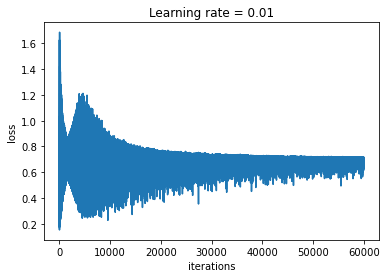

In [470]:
# Plot learning curve (with losses)

plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate = 0.01")
plt.show()

In [144]:
def sgd(x_set, W, b, V, c, y_set, lr):
    
    loss_list = []
    
    for x, y in zip(x_set, y_set):
    
        loss, grads = propagate(x, W, b, V, c, y)
            
        grad_V = grads['grad_V']
        grad_c = grads['grad_c']
        grad_W = grads['grad_W']
        grad_b = grads['grad_b']
        
        # W = W - (lr * grad_W)
        W_update = [[t * lr for t in u] for u in grad_W]
        for i in range(len(W_update)):
            for j in range(len(W[i])):
                W[i][j] -= W_update[i][j]
                
        
        # b = b - (lr * grad_b)
        b_update = [z * lr for z in grad_b]
        b = [t-u for t, u in zip(b, b_update)]
        
        # V = V - (lr * grad_V)
        V_update = [[t * lr for t in u] for u in grad_V]
        for i in range(len(V_update)):
            for j in range(len(V[i])):
                V[i][j] -= V_update[i][j]
                
        
        # c = c - (lr * grad_c)
        c_update = [z * lr for z in grad_b]
        c = [t-u for t, u in zip(c, c_update)]
        
        loss_list.append(loss)
            
        # print("Cost after iteration: ", loss)
    
        
    return loss_list

In [150]:
losses_sgd = sgd(xtrain, W1, b1, V1, c1, ytrain, 0.01)

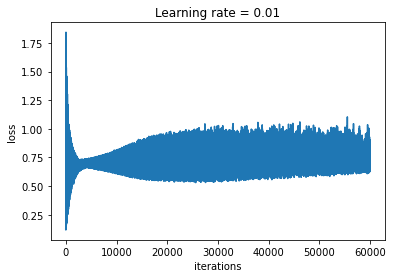

In [151]:
# Plot learning curve (with losses)

plt.plot(losses_sgd)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title("Learning rate = 0.01")
plt.show()

### Part 3: Tensor backpropagation

#### Question 5

In [168]:
# Implement a neural network for the MNIST data. Use two linear layers, with a hidden layer size of 300, 
# a sigmoid activation, and a softmax activation over the output layer, which has size 10

In [208]:
# initailize vectors
def initialize_weights(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    weights - dictionary containing weight and bias matrices and vectors:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    V1 -- weight matrix of shape (n_y, n_h)
                    c1 -- bias vector of shape (n_y, 1)
    """
    W = np.random.normal(0, 1, size=(n_h, n_x))
    b = np.zeros(shape = (n_h, 1))
    V = np.random.normal(0, 1, size=(n_y, n_h))
    c = np.zeros(shape=(n_y, 1))

    weights = {'W': W, 'b': b, 'V': V, 'c': c}
    
    return weights

In [452]:
def initialize_parameters_tensor(x_input, hidden_nodes=300, output_labels=10):
    
    attributes = x_input.shape[1]

    W = np.random.normal(0, 1, size=(attributes, hidden_nodes))
    b = np.random.normal(0, 1, hidden_nodes)
    b = np.expand_dims(b, axis=1)
    V = np.random.normal(0, 1, size=(hidden_nodes, output_labels))
    c = np.random.normal(0, 1, output_labels)
    c = np.expand_dims(c, axis=1)
    
    weights = {'W': W, 'b': b, 'V':V, 'c': c}
    
    return weights

In [419]:
def normalize_tensor(z):
    factor = np.linalg.norm(z)
    normalized = z/factor
    
    return normalized

In [420]:
# creating one-hot vector
def one_hot_vector(vector, num_classes):
    
    one_hot_labels = np.zeros((len(vector), num_classes))
    
    for i in range(len(vector)):
        one_hot_labels[i, vector[i]] = 1
        
    return one_hot_labels

In [421]:
def one_hot_array(vector):
    arr = np.zeros((vector.size, vector.max() + 1))
    arr[np.arange(vector.size), vector] = 1
    
    return arr

In [422]:
def sigmoid_array(z): 
    sigmoid = 1.0/(1.0 + np.exp(-z))
    return sigmoid 

In [423]:
def softmax_array(z):
    output = (np.exp(z)/np.exp(z).sum())
    return output

In [466]:
# forward_propagate(xtrain, weights_2, ytrain)

def forward_prop_vector(x, W, b, V, c):
    """
    forward propagation for a two layer neural network
    
    Arguments:
    x - input
    weights -- 
        W - weights, layer 1
        b - bias, layer 1
        V - weights, layer 2
        c - bias, layer 2
    Return: parameters
    """
    x = np.expand_dims(x, axis=1)
    k = np.dot(W.T, x) + b
    print('k: ', k.shape)
    h = sigmoid_array(k)
    print('h: ', h.shape)
    o = np.dot(V.T, h) + c
    print('o: ', o.shape)
    yhat = softmax_array(o)
    print('yhat: ', yhat.shape)
    
            
    parameters = {'k': k, 'h': h, 'o': o, 'yhat': yhat}
    
    return parameters
    

In [453]:
weight_param = initialize_parameters_tensor(normal_xtrain, 300, 10)

W2 = weight_param['W']
b2 = weight_param['b']
V2 = weight_param['V']
c2 = weight_param['c']

In [455]:
c2.shape

(10, 1)

In [370]:
W2.shape

(784, 300)

In [467]:
fp_params = forward_prop_vector(normal_xtrain[0], W2, b2, V2, c2)

k:  (300, 1)
h:  (300, 1)
o:  (10, 1)
yhat:  (10, 1)


In [465]:
normal_xtrain[0].shape

(784,)

In [460]:
pred = fp_params['yhat']

In [462]:
pred.shape

(10, 300)

In [184]:
len(pred)

10

In [435]:
def compute_loss(ypred, y):
    
    loss = -(np.log(ypred[y]))
    
    return loss/float(ypred.shape[0])

In [427]:
compute_loss(pred, 5)

16.26057995930239

In [375]:
def sigmoid_derivative(x):
    sig_d = np.dot(sigmoid_array(x), (1-sigmoid_array(x)))
    return(sig_d)

In [376]:
#compute_loss(pred, normal_ytrain)

In [377]:
y=2
# one-hot vector
one_hot_vector = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
one_hot_vector[y] = 1

one_hot_vector

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [456]:
def back_prop_vector(x, W, b, V, c, y, parameters):
    """
    """
    o = parameters['o']
    h = parameters['h']
    k = parameters['k']
    yhat = parameters['yhat']
    
    # one-hot vector
    one_hot_vector = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    
    one_hot_vector[y] = 1

    # dl/do
    grad_o = yhat - one_hot_vector # check
    grad_o = np.expand_dims(grad_o, axis=1)
    #print(grad_o.shape)
    
    do_dV = h
    do_dV = np.expand_dims(do_dV, axis=1)
    #print(do_dV.shape)

    grad_V = np.dot(do_dV, grad_o.T)

    grad_c = grad_o

    do_dh = V
    #print(do_dh.shape)
    grad_h = np.dot(do_dh, grad_o)
    #print(grad_h.shape)
    dh_dk = sigmoid_derivative(k)
    
    dh_dW = x
    dh_dW = np.expand_dims(dh_dW, axis=1)
    grad_W = np.dot(dh_dW, (dh_dk * grad_h).T)

    grad_b = grad_h * dh_dk

    gradients = {'grad_o': grad_o,
                 'grad_V': grad_V,
                 'grad_c': grad_c,
                 'grad_h': grad_h,
                 'grad_W': grad_W,
                 'grad_b': grad_b,
                }
    
    return gradients

In [429]:
def vector_propagation(x, W, b, V, c, y):
    
    parameters = forward_prop_vector(x, W, b, V, c)
    prediction = parameters['yhat']
    #print(prediction)
    cost = compute_loss(prediction, int(y))
    #print('loss: ', cost)
    gradients = back_prop_vector(x, W, b, V, c, y, parameters)
    
    return cost, gradients

In [379]:
grads = back_prop_vector(normal_xtrain[0], W2, b2, V2, c2, 5, fp_params)

In [380]:
grads

{'grad_o': array([[ 9.98172833e-01],
        [ 1.56375207e-07],
        [ 1.65377897e-03],
        [ 3.31600523e-08],
        [ 5.28443040e-06],
        [-9.99999913e-01],
        [ 5.32221240e-09],
        [ 1.67316576e-04],
        [ 5.04030845e-07],
        [ 1.57210723e-09]]),
 'grad_V': array([[8.11944302e-01, 1.27200375e-07, 1.34523438e-03, ...,
         1.36100419e-04, 4.09994101e-07, 1.27880009e-09],
        [2.90049234e-01, 4.54395347e-08, 4.80555378e-04, ...,
         4.86188797e-05, 1.46461370e-07, 4.56823191e-10],
        [3.81801440e-01, 5.98135686e-08, 6.32571003e-04, ...,
         6.39986460e-05, 1.92791966e-07, 6.01331538e-10],
        ...,
        [2.05608386e-01, 3.22109087e-08, 3.40653255e-04, ...,
         3.44646640e-05, 1.03822670e-07, 3.23830123e-10],
        [4.88654957e-01, 7.65533959e-08, 8.09606576e-04, ...,
         8.19097372e-05, 2.46748021e-07, 7.69624224e-10],
        [6.09576145e-01, 9.54970850e-08, 1.00994955e-03, ...,
         1.02178892e-04, 3.078075

In [468]:
def gradient_descent(x_set, W, b, V, c, y_set, lr, epochs):
    
    loss_record = []
    for num in range(epochs):
        for x, y in zip(x_set, y_set):

            loss, grads = vector_propagation(x, W, b, V, c, y)

            grad_W = grads['grad_W']
            print('grad_W: ', grad_W.shape)
            print('W: ', W.shape)
            grad_b = grads['grad_b']
            print('grad_b: ', grad_b.shape)
            print('b: ', b.shape)
            grad_V = grads['grad_V']
            print('grad_V: ', grad_V.shape)
            print('V: ', V.shape)
            grad_c = grads['grad_c']
            print('grad_c: ', grad_c.shape)
            print('c: ', c.shape)

            # Updating weights:

            W -= lr * grad_W
            
            b -= lr * grad_b
            
            V -= lr * grad_V
            
            c -= lr * grad_c
            
            
            #if num % 100 == 0:
            loss_record.append(loss)
    
    return grads, loss_record


In [307]:
(x1train, y1train), (xtest, ytest), num_cls = load_mnist()

In [247]:
x1train[54999].shape

(784,)

In [158]:
np.unique(y1train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [308]:
normal_xtrain = normalize_tensor(x1train)

In [441]:
y1train[:2000]

array([5, 0, 4, ..., 5, 2, 0], dtype=uint8)

In [235]:
y_label_arr = one_hot_array(y1train)
y_label_arr.shape

(55000, 10)

In [383]:
weights_2 = initialize_parameters_tensor(normal_xtrain, 300, num_cls)

In [384]:
W2 = weights_2['W']
b2 = weights_2['b']
V2 = weights_2['V']
c2 = weights_2['c']

In [469]:
gradients, loss_record_list = gradient_descent(normal_xtrain[:2000], W2, b2, V2, c2, y1train[:2000], 0.01, 1)

k:  (300, 1)
h:  (300, 1)
o:  (10, 1)
yhat:  (10, 1)


ValueError: shapes (300,10) and (10,1,10) not aligned: 10 (dim 1) != 1 (dim 1)

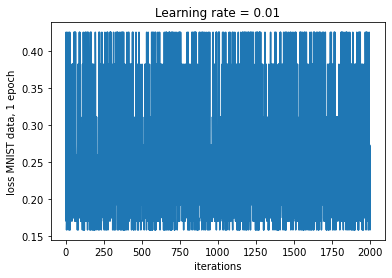

In [444]:
plt.plot(loss_record_list)
plt.ylabel('loss MNIST data, 1 epoch')
plt.xlabel('iterations')
plt.title("Learning rate = 0.01")
plt.show()

#### Question 6

### Part 4: Analysis

#### Question 7